## Domain Based Case Study

### Business problem overview


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.



For many incumbent operators, retaining high profitable customers is the number one business goal.



To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.



In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.



### Business objective
Is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Understanding customer behaviour during churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of the customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than in the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, and the fourth month is the ‘churn’ phase.



In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import necessary libraries
import numpy as np , pandas as pd
import matplotlib.pyplot as plt , seaborn as sns

In [3]:
# set max rows and columns to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# read the csv file
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head().T # transposing the table as there are lot of columns

0           1           2           3  \
mobile_number             7000842753  7001865778  7001625959  7001204172   
circle_id                        109         109         109         109   
loc_og_t2o_mou                   0.0         0.0         0.0         0.0   
std_og_t2o_mou                   0.0         0.0         0.0         0.0   
loc_ic_t2o_mou                   0.0         0.0         0.0         0.0   
last_date_of_month_6       6/30/2014   6/30/2014   6/30/2014   6/30/2014   
last_date_of_month_7       7/31/2014   7/31/2014   7/31/2014   7/31/2014   
last_date_of_month_8       8/31/2014   8/31/2014   8/31/2014   8/31/2014   
last_date_of_month_9       9/30/2014   9/30/2014   9/30/2014   9/30/2014   
arpu_6                       197.385      34.047      167.69     221.338   
arpu_7                       214.816     355.074     189.058     251.102   
arpu_8                       213.803     268.321     210.226     508.054   
arpu_9                          21.1      86.285     290.714       389.5   
onnet_mou_6                      NaN       24.11       11.54       99.91   
onnet_mou_7                      NaN       78.68       55.24       54.39   
onnet_mou_8                      0.0        7.68       37.26      310.98   
onnet_mou_9                      NaN       18.34       74.81      241.71   
offnet_mou_6                     NaN       15.74      143.33      123.31   
offnet_mou_7                     NaN       99.84      220.59      109.01   
offnet_mou_8                     0.0      304.76      208.36       71.68   
offnet_mou_9                     NaN       53.76      118.91      113.54   
roam_ic_mou_6                    NaN         0.0         0.0         0.0   
roam_ic_mou_7                    NaN         0.0         0.0       54.86   
roam_ic_mou_8                    0.0         0.0         0.0       44.38   
roam_ic_mou_9                    NaN         0.0       38.49         0.0   
roam_og_mou_6                    NaN         0.0         0.0         0.0   
roam_og_mou_7                    NaN         0.0         0.0       28.09   
roam_og_mou_8                    0.0         0.0         0.0       39.04   
roam_og_mou_9                    NaN         0.0       70.94         0.0   
loc_og_t2t_mou_6                 NaN       23.88        7.19       73.68   
loc_og_t2t_mou_7                 NaN       74.56       28.74       34.81   
loc_og_t2t_mou_8                 0.0        7.68       13.58       10.61   
loc_og_t2t_mou_9                 NaN       18.34       14.39       15.49   
loc_og_t2m_mou_6                 NaN       11.51       29.34      107.43   
loc_og_t2m_mou_7                 NaN       75.94       16.86       83.21   
loc_og_t2m_mou_8                 0.0      291.86       38.46       22.46   
loc_og_t2m_mou_9                 NaN       53.76       28.16       65.46   
loc_og_t2f_mou_6                 NaN         0.0       24.11        1.91   
loc_og_t2f_mou_7                 NaN         0.0       21.79        0.65   
loc_og_t2f_mou_8                 0.0         0.0       15.61        4.91   
loc_og_t2f_mou_9                 NaN         0.0       22.24        2.06   
loc_og_t2c_mou_6                 NaN         0.0         0.0         0.0   
loc_og_t2c_mou_7                 NaN        2.91      135.54         0.0   
loc_og_t2c_mou_8                 0.0         0.0       45.76         0.0   
loc_og_t2c_mou_9                 NaN         0.0        0.48         0.0   
loc_og_mou_6                     NaN       35.39       60.66      183.03   
loc_og_mou_7                     NaN      150.51       67.41      118.68   
loc_og_mou_8                     0.0      299.54       67.66       37.99   
loc_og_mou_9                     NaN       72.11       64.81       83.03   
std_og_t2t_mou_6                 NaN        0.23        4.34       26.23   
std_og_t2t_mou_7                 NaN        4.11       26.49       14.89   
std_og_t2t_mou_8                 0.0         0.0       22.58      289.58   
std_og_

In [5]:
# data inspection
telecom.shape

(99999, 226)

In [6]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
# Checking Dataset Info
print(telecom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


In [8]:
# Central tendency using describe function
telecom.describe().T

count          mean            std           min  \
mobile_number       99999.0  7.001207e+09  695669.386290  7.000000e+09   
circle_id           99999.0  1.090000e+02       0.000000  1.090000e+02   
loc_og_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
std_og_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
loc_ic_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
arpu_6              99999.0  2.829874e+02     328.439770 -2.258709e+03   
arpu_7              99999.0  2.785366e+02     338.156291 -2.014045e+03   
arpu_8              99999.0  2.791547e+02     344.474791 -9.458080e+02   
arpu_9              99999.0  2.616451e+02     341.998630 -1.899505e+03   
onnet_mou_6         96062.0  1.323959e+02     297.207406  0.000000e+00   
onnet_mou_7         96140.0  1.336708e+02     308.794148  0.000000e+00   
onnet_mou_8         94621.0  1.330181e+02     308.951589  0.000000e+00   
onnet_mou_9         92254.0  1.303023e+02     308.477668  0.000000e+00   
offnet_mou_6        96062.0  1.979356e+02     316.851613  0.000000e+00   
offnet_mou_7        96140.0  1.970451e+02     325.862803  0.000000e+00   
offnet_mou_8        94621.0  1.965748e+02     327.170662  0.000000e+00   
offnet_mou_9        92254.0  1.903372e+02     319.396092  0.000000e+00   
roam_ic_mou_6       96062.0  9.950013e+00      72.825411  0.000000e+00   
roam_ic_mou_7       96140.0  7.149898e+00      73.447948  0.000000e+00   
roam_ic_mou_8       94621.0  7.292981e+00      68.402466  0.000000e+00   
roam_ic_mou_9       92254.0  6.343841e+00      57.137537  0.000000e+00   
roam_og_mou_6       96062.0  1.391134e+01      71.443196  0.000000e+00   
roam_og_mou_7       96140.0  9.818732e+00      58.455762  0.000000e+00   
roam_og_mou_8       94621.0  9.971890e+00      64.713221  0.000000e+00   
roam_og_mou_9       92254.0  8.555519e+00      58.438186  0.000000e+00   
loc_og_t2t_mou_6    96062.0  4.710076e+01     150.856393  0.000000e+00   
loc_og_t2t_mou_7    96140.0  4.647301e+01     155.318705  0.000000e+00   
loc_og_t2t_mou_8    94621.0  4.588781e+01     151.184830  0.000000e+00   
loc_og_t2t_mou_9    92254.0  4.458445e+01     147.995390  0.000000e+00   
loc_og_t2m_mou_6    96062.0  9.334209e+01     162.780544  0.000000e+00   
loc_og_t2m_mou_7    96140.0  9.139713e+01     157.492308  0.000000e+00   
loc_og_t2m_mou_8    94621.0  9.175513e+01     156.537048  0.000000e+00   
loc_og_t2m_mou_9    92254.0  9.046319e+01     158.681454  0.000000e+00   
loc_og_t2f_mou_6    96062.0  3.751013e+00      14.230438  0.000000e+00   
loc_og_t2f_mou_7    96140.0  3.792985e+00      14.264986  0.000000e+00   
loc_og_t2f_mou_8    94621.0  3.677991e+00      13.270996  0.000000e+00   
loc_og_t2f_mou_9    92254.0  3.655123e+00      13.457549  0.000000e+00   
loc_og_t2c_mou_6    96062.0  1.123056e+00       5.448946  0.000000e+00   
loc_og_t2c_mou_7    96140.0  1.368500e+00       7.533445  0.000000e+00   
loc_og_t2c_mou_8    94621.0  1.433821e+00       6.783335  0.000000e+00   
loc_og_t2c_mou_9    92254.0  1.232726e+00       5.619021  0.000000e+00   
loc_og_mou_6        96062.0  1.442012e+02     251.751489  0.000000e+00   
loc_og_mou_7        96140.0  1.416705e+02     248.731086  0.000000e+00   
loc_og_mou_8        94621.0  1.413282e+02     245.914311  0.000000e+00   
loc_og_mou_9        92254.0  1.387100e+02     245.934517  0.000000e+00   
std_og_t2t_mou_6    96062.0  7.982987e+01     252.476533  0.000000e+00   
std_og_t2t_mou_7    96140.0  8.329960e+01     263.631042  0.000000e+00   
std_og_t2t_mou_8    94621.0  8.328267e+01     265.486090  0.000000e+00   
std_og_t2t_mou_9    92254.0  8.234292e+01     267.184991  0.000000e+00   
std_og_t2m_mou_6    96062.0  8.729962e+01     255.617850  0.000000e+00   
std_og_t2m_mou_7    96140.0  9.080414e+01     269.347911  0.000000e+00   
std_og_t2m_mou_8    94621.0  8.983839e+01     271.757783  0.000000e+00   
std_og_t2m_mou_9    92254.0  8.627662e+01     261.407396  0.000000e+00   
std_og_t2f_mou_6    96062.

In [9]:
#Summary and checking outliers
telecom.describe(percentiles=[0.25,0.5,0.75,0.99]).T

count          mean            std           min  \
mobile_number       99999.0  7.001207e+09  695669.386290  7.000000e+09   
circle_id           99999.0  1.090000e+02       0.000000  1.090000e+02   
loc_og_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
std_og_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
loc_ic_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
arpu_6              99999.0  2.829874e+02     328.439770 -2.258709e+03   
arpu_7              99999.0  2.785366e+02     338.156291 -2.014045e+03   
arpu_8              99999.0  2.791547e+02     344.474791 -9.458080e+02   
arpu_9              99999.0  2.616451e+02     341.998630 -1.899505e+03   
onnet_mou_6         96062.0  1.323959e+02     297.207406  0.000000e+00   
onnet_mou_7         96140.0  1.336708e+02     308.794148  0.000000e+00   
onnet_mou_8         94621.0  1.330181e+02     308.951589  0.000000e+00   
onnet_mou_9         92254.0  1.303023e+02     308.477668  0.000000e+00   
offnet_mou_6        96062.0  1.979356e+02     316.851613  0.000000e+00   
offnet_mou_7        96140.0  1.970451e+02     325.862803  0.000000e+00   
offnet_mou_8        94621.0  1.965748e+02     327.170662  0.000000e+00   
offnet_mou_9        92254.0  1.903372e+02     319.396092  0.000000e+00   
roam_ic_mou_6       96062.0  9.950013e+00      72.825411  0.000000e+00   
roam_ic_mou_7       96140.0  7.149898e+00      73.447948  0.000000e+00   
roam_ic_mou_8       94621.0  7.292981e+00      68.402466  0.000000e+00   
roam_ic_mou_9       92254.0  6.343841e+00      57.137537  0.000000e+00   
roam_og_mou_6       96062.0  1.391134e+01      71.443196  0.000000e+00   
roam_og_mou_7       96140.0  9.818732e+00      58.455762  0.000000e+00   
roam_og_mou_8       94621.0  9.971890e+00      64.713221  0.000000e+00   
roam_og_mou_9       92254.0  8.555519e+00      58.438186  0.000000e+00   
loc_og_t2t_mou_6    96062.0  4.710076e+01     150.856393  0.000000e+00   
loc_og_t2t_mou_7    96140.0  4.647301e+01     155.318705  0.000000e+00   
loc_og_t2t_mou_8    94621.0  4.588781e+01     151.184830  0.000000e+00   
loc_og_t2t_mou_9    92254.0  4.458445e+01     147.995390  0.000000e+00   
loc_og_t2m_mou_6    96062.0  9.334209e+01     162.780544  0.000000e+00   
loc_og_t2m_mou_7    96140.0  9.139713e+01     157.492308  0.000000e+00   
loc_og_t2m_mou_8    94621.0  9.175513e+01     156.537048  0.000000e+00   
loc_og_t2m_mou_9    92254.0  9.046319e+01     158.681454  0.000000e+00   
loc_og_t2f_mou_6    96062.0  3.751013e+00      14.230438  0.000000e+00   
loc_og_t2f_mou_7    96140.0  3.792985e+00      14.264986  0.000000e+00   
loc_og_t2f_mou_8    94621.0  3.677991e+00      13.270996  0.000000e+00   
loc_og_t2f_mou_9    92254.0  3.655123e+00      13.457549  0.000000e+00   
loc_og_t2c_mou_6    96062.0  1.123056e+00       5.448946  0.000000e+00   
loc_og_t2c_mou_7    96140.0  1.368500e+00       7.533445  0.000000e+00   
loc_og_t2c_mou_8    94621.0  1.433821e+00       6.783335  0.000000e+00   
loc_og_t2c_mou_9    92254.0  1.232726e+00       5.619021  0.000000e+00   
loc_og_mou_6        96062.0  1.442012e+02     251.751489  0.000000e+00   
loc_og_mou_7        96140.0  1.416705e+02     248.731086  0.000000e+00   
loc_og_mou_8        94621.0  1.413282e+02     245.914311  0.000000e+00   
loc_og_mou_9        92254.0  1.387100e+02     245.934517  0.000000e+00   
std_og_t2t_mou_6    96062.0  7.982987e+01     252.476533  0.000000e+00   
std_og_t2t_mou_7    96140.0  8.329960e+01     263.631042  0.000000e+00   
std_og_t2t_mou_8    94621.0  8.328267e+01     265.486090  0.000000e+00   
std_og_t2t_mou_9    92254.0  8.234292e+01     267.184991  0.000000e+00   
std_og_t2m_mou_6    96062.0  8.729962e+01     255.617850  0.000000e+00   
std_og_t2m_mou_7    96140.0  9.080414e+01     269.347911  0.000000e+00   
std_og_t2m_mou_8    94621.0  8.983839e+01     271.757783  0.000000e+00   
std_og_t2m_mou_9    92254.0  8.627662e+01     261.407396  0.000000e+00   
std_og_t2f_mou_6    96062.

In [10]:
# check for null values in each column
percentage_of_missing_rows = round(100*(telecom.isnull().sum()/len(telecom)),2).sort_values(ascending=False)

In [11]:
len_of_missing_rows = telecom[telecom.columns].isna().sum().sort_values(ascending=False)

In [12]:
missing_rows = pd.concat([len_of_missing_rows,percentage_of_missing_rows],keys=['Total','Percentage'],axis=1)
print(missing_rows)

                          Total  Percentage
arpu_3g_6                 74846       74.85
night_pck_user_6          74846       74.85
total_rech_data_6         74846       74.85
arpu_2g_6                 74846       74.85
max_rech_data_6           74846       74.85
fb_user_6                 74846       74.85
av_rech_amt_data_6        74846       74.85
date_of_last_rech_data_6  74846       74.85
count_rech_2g_6           74846       74.85
count_rech_3g_6           74846       74.85
date_of_last_rech_data_7  74428       74.43
total_rech_data_7         74428       74.43
fb_user_7                 74428       74.43
max_rech_data_7           74428       74.43
night_pck_user_7          74428       74.43
count_rech_2g_7           74428       74.43
av_rech_amt_data_7        74428       74.43
arpu_2g_7                 74428       74.43
count_rech_3g_7           74428       74.43
arpu_3g_7                 74428       74.43
total_rech_data_9         74077       74.08
count_rech_3g_9           74077 

In [13]:
# Number of columns having null values
num_columns_with_null = telecom.isnull().sum()[telecom.isnull().sum() > 0].count()
print(num_columns_with_null)

166


#### Hence out of 226 columns 166 have null values, only 60 columns do not have null values.

In [14]:
# To see all categorical columns
telecom.select_dtypes(include='object').head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   
2            9/30/2014           6/17/2014           7/24/2014   
3            9/30/2014           6/28/2014           7/31/2014   
4            9/30/2014           6/26/2014           7/28/2014   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0            8/8/2014           9/28/2014                6/21/2014   
1           8/28/2014           9/30/2014                      NaN   
2           8/14/2014           9/29/2014                      NaN   
3           8/31/2014           9/30/2014                      NaN   
4            8/9/2014           9/28/2014                 6/4/2014   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0                7/16/2014                 8/8/2014                      NaN  
1                7/25/2014                8/10/2014                      NaN  
2                      NaN                      NaN                9/17/2014  
3                      NaN                      NaN                      NaN  
4                      NaN                      NaN                      NaN

## Checking for high value customers
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [15]:
# creating new columns out of average and total
telecom['total_rech_data_amt_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_rech_data_amt_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']
telecom['total_rech_data_amt_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']
telecom['total_rech_data_amt_9'] = telecom['av_rech_amt_data_9'] * telecom['total_rech_data_9']

# Dropping original columns
telecom.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

# checking the average recharge done in the first two months(june & july) - the good phase
# total amount spend would be the sum of total data recharge done & total call/sms recharges
telecom_av_rech_6n7 = (telecom['total_rech_amt_6'].fillna(0) + telecom['total_rech_amt_7'].fillna(0) + telecom['total_rech_data_amt_6'].fillna(0) + telecom['total_rech_data_amt_7'].fillna(0))/2

# taking the 70 percentile of the calculated average amount
percentile_70_6n7 = np.percentile(telecom_av_rech_6n7, 70.0)
print("70 percentile is : ", percentile_70_6n7)

# filter the given data set based on 70th percentile
telecom_1 = telecom[telecom_av_rech_6n7 >= percentile_70_6n7]

print("Shape of the filtered dataset:",telecom_1.shape)

70 percentile is :  478.0
Shape of the filtered dataset: (30001, 222)


#### Hence there are 30,001 rows where the average recharge amount is > 70th percentile for the 6th and 7th month

### Checking for Churn customers

Tagging the churned customers (churn=1, else 0) based on the fourth month:
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The columns we need to use to tag churners are:

total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [16]:
telecom_1['churn'] = np.where(telecom_1[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
telecom_1.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   
23            9/30/2014    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00    

#### Churn Percentage

In [17]:
pd.DataFrame(round(telecom_1['churn'].value_counts(normalize=True)*100,2))

proportion
churn            
0           91.86
1            8.14

#### There are 92% customers who have not churned and 8% customers who have churned.

In [18]:
telecom_1.shape

(30001, 223)

In [19]:
# check for duplicates row
duplicate_rows = telecom_1.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [20]:
# Check for duplicate column names
duplicate_columns = telecom_1.columns[telecom_1.columns.duplicated()]
num_duplicate_columns = duplicate_columns.size

print(f"Number of duplicate columns: {num_duplicate_columns}")
print(f"Duplicate columns: {duplicate_columns.tolist()}")

Number of duplicate columns: 0
Duplicate columns: []


This is a clear case of class imbalance as most of the data sits in "Not Churn" and only 8% of the population have moved to different telecom services.
Also we are not using the PCA here because,

1. PCA transforms your features into principal components, which are linear combinations of the original features. This makes it difficult to interpret the model results, as the coefficients will not directly correspond to the original variables.

2. While PCA reduces dimensionality, it introduces new features (the principal components), which can complicate your model development and interpretation.

3. In a classification context, PCA can sometimes lead to overfitting, especially if we keep too many components that capture noise rather than signal. Hence we are moving with the classifical approach of identifying a good feature set through RFE, p-value and VIF check.


#### As checking for each distinct values in each column separately, notebook was crashing used a different method . There were 16 columns that had only one value so dropped them.

#### Checking for variance in columns and dropping them

In [21]:
# lets check the columns with no variance in their values and drop such columns
for i in telecom_1.columns:
    if telecom_1[i].nunique() == 1:
        print("\nColumn",i,"has no variance and contains only", telecom_1[i].nunique(),"unique value")
        print("Dropping the column",i)
        telecom_1.drop(i,axis=1,inplace = True)

print("\nShape of the updated dataset:",telecom_1.shape)


Column circle_id has no variance and contains only 1 unique value
Dropping the column circle_id

Column loc_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_ic_t2o_mou

Column last_date_of_month_6 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_6

Column last_date_of_month_7 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_7

Column last_date_of_month_8 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_8

Column last_date_of_month_9 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_9

Column std_og_t2c_mou_6 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_m

In [22]:
# Rechecking the null values present in the dataset
(telecom_1.isnull().sum() * 100 / len(telecom_1)).sort_values(ascending = False)

arpu_3g_9                   49.268358
fb_user_9                   49.268358
date_of_last_rech_data_9    49.268358
max_rech_data_9             49.268358
count_rech_2g_9             49.268358
count_rech_3g_9             49.268358
arpu_2g_9                   49.268358
night_pck_user_9            49.268358
total_rech_data_amt_9       49.268358
date_of_last_rech_data_8    46.825106
fb_user_8                   46.825106
night_pck_user_8            46.825106
arpu_3g_8                   46.825106
count_rech_3g_8             46.825106
max_rech_data_8             46.825106
arpu_2g_8                   46.825106
total_rech_data_amt_8       46.825106
count_rech_2g_8             46.825106
count_rech_2g_6             44.148528
max_rech_data_6             44.148528
date_of_last_rech_data_6    44.148528
arpu_3g_6                   44.148528
fb_user_6                   44.148528
total_rech_data_amt_6       44.148528
night_pck_user_6            44.148528
arpu_2g_6                   44.148528
count_rech_3g_6             44.148528
fb_user_7                   43.145228
date_of_last_rech_data_7    43.145228
max_rech_data_7             43.145228
arpu_3g_7                   43.145228
count_rech_3g_7             43.145228
night_pck_user_7            43.145228
arpu_2g_7                   43.145228
total_rech_data_amt_7       43.145228
count_rech_2g_7             43.145228
std_og_t2f_mou_9             6.336455
isd_og_mou_9                 6.336455
spl_og_mou_9                 6.336455
og_others_9                  6.336455
loc_ic_t2t_mou_9             6.336455
loc_ic_t2m_mou_9             6.336455
std_ic_t2m_mou_9             6.336455
loc_ic_mou_9                 6.336455
std_ic_t2t_mou_9             6.336455
std_ic_t2f_mou_9             6.336455
std_ic_mou_9                 6.336455
spl_ic_mou_9                 6.336455
isd_ic_mou_9                 6.336455
ic_others_9                  6.336455
std_og_mou_9                 6.336455
loc_ic_t2f_mou_9             6.336455
roam_og_mou_9                6.336455
std_og_t2t_mou_9             6.336455
onnet_mou_9                  6.336455
loc_og_t2c_mou_9             6.336455
offnet_mou_9                 6.336455
loc_og_t2f_mou_9             6.336455
roam_ic_mou_9                6.336455
loc_og_t2m_mou_9             6.336455
loc_og_mou_9                 6.336455
loc_og_t2t_mou_9             6.336455
std_og_t2m_mou_9             6.336455
std_ic_t2f_mou_8             3.913203
loc_og_mou_8                 3.913203
std_og_t2f_mou_8             3.913203
spl_ic_mou_8                 3.913203
std_ic_t2m_mou_8             3.913203
std_ic_t2t_mou_8             3.913203
loc_ic_mou_8                 3.913203
loc_og_t2c_mou_8             3.913203
loc_og_t2f_mou_8             3.913203
isd_ic_mou_8                 3.913203
ic_others_8                  3.913203
loc_ic_t2f_mou_8             3.913203
loc_og_t2m_mou_8             3.913203
loc_og_t2t_mou_8             3.913203
roam_og_mou_8                3.913203
roam_ic_mou_8                3.913203
offnet_mou_8                 3.913203
onnet_mou_8                  3.913203
std_og_t2t_mou_8             3.913203
std_ic_mou_8                 3.913203
std_og_mou_8                 3.913203
isd_og_mou_8                 3.913203
loc_ic_t2t_mou_8             3.913203
loc_ic_t2m_mou_8             3.913203
std_og_t2m_mou_8             3.913203
og_others_8                  3.913203
spl_og_mou_8                 3.913203
date_of_last_rech_9          2.716576
date_of_last_rech_8          1.943269
loc_og_t2m_mou_6             1.816606
loc_ic_t2f_mou_6             1.816606
loc_og_mou_6                 1.816606
ic_others_6                  1.816606
loc_og_t2c_mou_6             1.816606
spl_og_mou_6                 1.816606
std_og_t2f_mou_6             1.816606
og_others_6                  1.816606
isd_ic_mou_6                 1.816606
roam_og_mou_6                1.816606
std_og_mou_6                 1.816606
spl_ic_mou_6                 1.816606
loc_og_t2f_mou_6             1.816606
loc_og_t2t

In [23]:
# Drop Columns with > 30% of missing values except 9th Month's columns
cols = telecom_1.columns
telecom_null_percentage = telecom_1.isnull().sum() * 100 / len(telecom_1)
telecom_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': telecom_null_percentage})

drop_cols = telecom_null_df.loc[(telecom_null_df["col_name"].str.contains('_9')==False) & (telecom_null_df["perc_null"] > 30.0)]["col_name"]
print("list of columns dropped:",drop_cols)

# lets drop these columns
telecom_1.drop(drop_cols, axis=1,inplace = True)
telecom_1.shape

list of columns dropped: date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6     

(30001, 180)

In [24]:
# lets check for columns that can be changed to integers, floats or date types
object_col_data = telecom_1.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

# observation : all the columns below can be converted to date type

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


In [25]:
# dropping columns that have date values

date_columns = [
    'date_of_last_rech_6',
    'date_of_last_rech_7',
    'date_of_last_rech_8',
    'date_of_last_rech_9',
    'date_of_last_rech_data_9'
]

# Dropping these columns from the dataset
telecom_1 = telecom_1.drop(columns=date_columns)


In [26]:
# Deleting the 9th month columns because we would predict churn/non-churn later based on data from June, July and August months
cols_to_drop = [col for col in telecom_1.columns if '_9' in col]
print(cols_to_drop)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9']


In [27]:
telecom_1.drop(cols_to_drop, axis=1, inplace=True)
telecom_1.shape

(30001, 127)

In [28]:
# Checking the dataset again
(telecom_1.isnull().sum() * 100 / len(telecom_1)).sort_values(ascending = False)

# Now left with few columns with around 4% of null values

loc_ic_t2f_mou_8      3.913203
loc_ic_t2t_mou_8      3.913203
loc_og_t2c_mou_8      3.913203
loc_og_mou_8          3.913203
std_og_t2t_mou_8      3.913203
std_og_t2m_mou_8      3.913203
std_og_t2f_mou_8      3.913203
std_og_mou_8          3.913203
isd_og_mou_8          3.913203
spl_og_mou_8          3.913203
loc_ic_t2m_mou_8      3.913203
loc_og_t2m_mou_8      3.913203
loc_ic_mou_8          3.913203
std_ic_t2t_mou_8      3.913203
std_ic_t2m_mou_8      3.913203
std_ic_t2f_mou_8      3.913203
std_ic_mou_8          3.913203
spl_ic_mou_8          3.913203
isd_ic_mou_8          3.913203
ic_others_8           3.913203
loc_og_t2f_mou_8      3.913203
og_others_8           3.913203
offnet_mou_8          3.913203
roam_og_mou_8         3.913203
onnet_mou_8           3.913203
roam_ic_mou_8         3.913203
loc_og_t2t_mou_8      3.913203
loc_og_t2f_mou_6      1.816606
std_ic_t2f_mou_6      1.816606
roam_og_mou_6         1.816606
spl_og_mou_6          1.816606
og_others_6           1.816606
std_ic_t2m_mou_6      1.816606
offnet_mou_6          1.816606
loc_ic_mou_6          1.816606
loc_ic_t2t_mou_6      1.816606
loc_ic_t2m_mou_6      1.816606
std_ic_t2t_mou_6      1.816606
roam_ic_mou_6         1.816606
loc_ic_t2f_mou_6      1.816606
std_ic_mou_6          1.816606
isd_og_mou_6          1.816606
std_og_mou_6          1.816606
spl_ic_mou_6          1.816606
std_og_t2f_mou_6      1.816606
loc_og_t2t_mou_6      1.816606
std_og_t2m_mou_6      1.816606
loc_og_t2c_mou_6      1.816606
onnet_mou_6           1.816606
isd_ic_mou_6          1.816606
ic_others_6           1.816606
std_og_t2t_mou_6      1.816606
loc_og_t2m_mou_6      1.816606
loc_og_mou_6          1.816606
std_ic_mou_7          1.789940
std_ic_t2t_mou_7      1.789940
ic_others_7           1.789940
std_ic_t2m_mou_7      1.789940
offnet_mou_7          1.789940
isd_ic_mou_7          1.789940
onnet_mou_7           1.789940
std_ic_t2f_mou_7      1.789940
spl_ic_mou_7          1.789940
loc_ic_mou_7          1.789940
loc_ic_t2f_mou_7      1.789940
loc_og_t2t_mou_7      1.789940
isd_og_mou_7          1.789940
loc_og_t2m_mou_7      1.789940
loc_og_t2c_mou_7      1.789940
loc_og_mou_7          1.789940
std_og_t2t_mou_7      1.789940
loc_og_t2f_mou_7      1.789940
std_og_t2m_mou_7      1.789940
std_og_t2f_mou_7      1.789940
roam_og_mou_7         1.789940
std_og_mou_7          1.789940
spl_og_mou_7          1.789940
og_others_7           1.789940
loc_ic_t2t_mou_7      1.789940
roam_ic_mou_7         1.789940
loc_ic_t2m_mou_7      1.789940
monthly_3g_6          0.000000
monthly_2g_7          0.000000
monthly_2g_8          0.000000
sachet_2g_6           0.000000
monthly_2g_6          0.000000
vol_3g_mb_8           0.000000
vol_3g_mb_7           0.000000
vol_3g_mb_6           0.000000
sachet_2g_7           0.000000
sachet_2g_8           0.000000
sachet_3g_8           0.000000
monthly_3g_7          0.000000
sep_vbc_3g            0.000000
jun_vbc_3g            0.000000
monthly_3g_8          0.000000
sachet_3g_6           0.000000
sachet_3g_7           0.000000
vol_2g_mb_7           0.000000
jul_vbc_3g            0.000000
aug_vbc_3g            0.000000
aon                   0.000000
vol_2g_mb_8           0.000000
mobile_number         0.000000
vol_2g_mb_6           0.000000
total_rech_num_6      0.000000
arpu_7                0.000000
arpu_8                0.000000
total_og_mou_6        0.000000
total_og_mou_7        0.000000
total_og_mou_8        0.000000
arpu_6                0.000000
total_ic_mou_6        0.000000
total_ic_mou_7        0.000000
total_ic_mou_8        0.000000
total_rech_num_7      0.000000
last_day_rch_amt_8    0.000000
total_rech_num_8      0.000000
total_rech_amt_6      0.000000
total_rech_amt_7      0.000000
total_rech_amt_8      0.000000
max_rech_amt_6        0.000000
max_rech_amt_7        0.000000
max_rech_amt_8        0.000000
last_day_rch_amt_6    0.000000
last_day_rch_amt_7    0.000000
churn                 0.000000
dtype: float64

In [29]:
# List of columns to check for NaN values
columns_to_check = [
    'std_ic_t2t_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8', 'std_ic_mou_8', 'isd_og_mou_8',
    'loc_og_t2f_mou_8', 'loc_ic_t2f_mou_8', 'spl_og_mou_8', 'loc_og_t2m_mou_8', 'std_og_mou_8',
    'std_og_t2f_mou_8', 'loc_og_t2t_mou_8', 'spl_ic_mou_8', 'og_others_8', 'std_ic_t2m_mou_8',
    'loc_og_mou_8', 'std_og_t2t_mou_8', 'roam_ic_mou_8', 'loc_ic_mou_8', 'offnet_mou_8',
    'isd_ic_mou_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8',
    'loc_ic_t2m_mou_8', 'ic_others_8', 'std_ic_t2f_mou_6', 'spl_og_mou_6',
    'isd_og_mou_6', 'std_ic_t2m_mou_6', 'og_others_6', 'std_ic_t2t_mou_6', 'loc_ic_t2t_mou_6',
    'loc_ic_t2m_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'std_og_t2t_mou_6', 'loc_og_t2m_mou_6',
    'std_og_t2f_mou_6', 'onnet_mou_6', 'ic_others_6', 'offnet_mou_6', 'roam_ic_mou_6',
    'roam_og_mou_6', 'isd_ic_mou_6', 'loc_og_t2t_mou_6', 'loc_ic_t2f_mou_6', 'loc_og_t2f_mou_6',
    'spl_ic_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_ic_mou_6', 'std_og_t2m_mou_6',
    'spl_ic_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2t_mou_7', 'isd_ic_mou_7', 'std_ic_mou_7',
    'ic_others_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'loc_ic_t2f_mou_7', 'std_og_t2m_mou_7',
    'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
    'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_ic_t2m_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7',
    'loc_og_t2c_mou_7', 'std_og_t2f_mou_7', 'spl_og_mou_7', 'loc_ic_t2t_mou_7', 'std_og_mou_7',
    'og_others_7', 'isd_og_mou_7'
]

# Drop rows with NaN values in any of the specified columns
telecom_1 = telecom_1.dropna(subset=columns_to_check)

In [30]:
# rechecking for null values in the dataset again
(telecom_1.isnull().sum() * 100 / len(telecom_1)).sort_values(ascending = False)

mobile_number         0.0
total_ic_mou_7        0.0
total_rech_num_8      0.0
total_rech_num_7      0.0
total_rech_num_6      0.0
ic_others_8           0.0
ic_others_7           0.0
ic_others_6           0.0
isd_ic_mou_8          0.0
isd_ic_mou_7          0.0
isd_ic_mou_6          0.0
spl_ic_mou_8          0.0
spl_ic_mou_7          0.0
spl_ic_mou_6          0.0
total_ic_mou_8        0.0
total_ic_mou_6        0.0
total_rech_amt_7      0.0
std_ic_mou_8          0.0
std_ic_mou_7          0.0
std_ic_mou_6          0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_8          0.0
total_rech_amt_6      0.0
total_rech_amt_8      0.0
loc_ic_mou_6          0.0
sachet_2g_6           0.0
sep_vbc_3g            0.0
jun_vbc_3g            0.0
jul_vbc_3g            0.0
aug_vbc_3g            0.0
aon                   0.0
sachet_3g_8           0.0
sachet_3g_7           0.0
sachet_3g_6           0.0
monthly_3g_8          0.0
monthly_3g_7          0.0
monthly_3g_6          0.0
sachet_2g_8           0.0
sachet_2g_7           0.0
monthly_2g_8          0.0
max_rech_amt_6        0.0
monthly_2g_7          0.0
monthly_2g_6          0.0
vol_3g_mb_8           0.0
vol_3g_mb_7           0.0
vol_3g_mb_6           0.0
vol_2g_mb_8           0.0
vol_2g_mb_7           0.0
vol_2g_mb_6           0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_6    0.0
max_rech_amt_8        0.0
max_rech_amt_7        0.0
loc_ic_mou_7          0.0
loc_ic_t2f_mou_8      0.0
arpu_6                0.0
loc_og_t2t_mou_6      0.0
loc_og_mou_7          0.0
loc_og_mou_6          0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_7      0.0
roam_og_mou_8         0.0
std_og_t2t_mou_6      0.0
roam_og_mou_7         0.0
roam_og_mou_6         0.0
roam_ic_mou_8         0.0
roam_ic_mou_7         0.0
roam_ic_mou_6         0.0
offnet_mou_8          0.0
offnet_mou_7          0.0
offnet_mou_6          0.0
onnet_mou_8           0.0
onnet_mou_7           0.0
onnet_mou_6           0.0
arpu_8                0.0
arpu_7                0.0
loc_og_mou_8          0.0
std_og_t2t_mou_7      0.0
loc_ic_t2f_mou_7      0.0
spl_og_mou_8          0.0
loc_ic_t2f_mou_6      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2m_mou_7      0.0
loc_ic_t2m_mou_6      0.0
loc_ic_t2t_mou_8      0.0
loc_ic_t2t_mou_7      0.0
loc_ic_t2t_mou_6      0.0
total_og_mou_8        0.0
total_og_mou_7        0.0
total_og_mou_6        0.0
og_others_8           0.0
og_others_7           0.0
og_others_6           0.0
spl_og_mou_7          0.0
std_og_t2t_mou_8      0.0
spl_og_mou_6          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2f_mou_8      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_6      0.0
std_og_t2m_mou_8      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_6      0.0
churn                 0.0
dtype: float64

In [31]:
# To check for duplicates by seeing if there are no duplicate mobile numbers
len(telecom['mobile_number'].unique())

99999

The original dataset has the same number of entries (99,999), this confirms that there are no duplicates.

In [32]:
total_rows = len(telecom)
unique_numbers = len(telecom['mobile_number'].unique())

if total_rows == unique_numbers:
    print("No duplicates found.")
else:
    print("Duplicates exist.")

No duplicates found.


In [33]:
#Dropping mobile number since it doesn't help in building model and prediction
telecom_1.drop('mobile_number',inplace=True,axis=1)

In [34]:
telecom_1.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   
33              0.00              0.00              0.00              0.00   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   
33              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   
33              0.00               0.0               0.0              0.56   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   
33          0.00          0.00          0.00              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   
33              0.00              0.00              0.00              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61              0.00              0.00              0.00   
33              0.00      

In [35]:
all_columns = telecom_1.columns.tolist()
print(all_columns)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

In [36]:
telecom_1.shape

(28504, 126)

This a pure case of class imbalance as we see

#### Data Visualisation and EDA

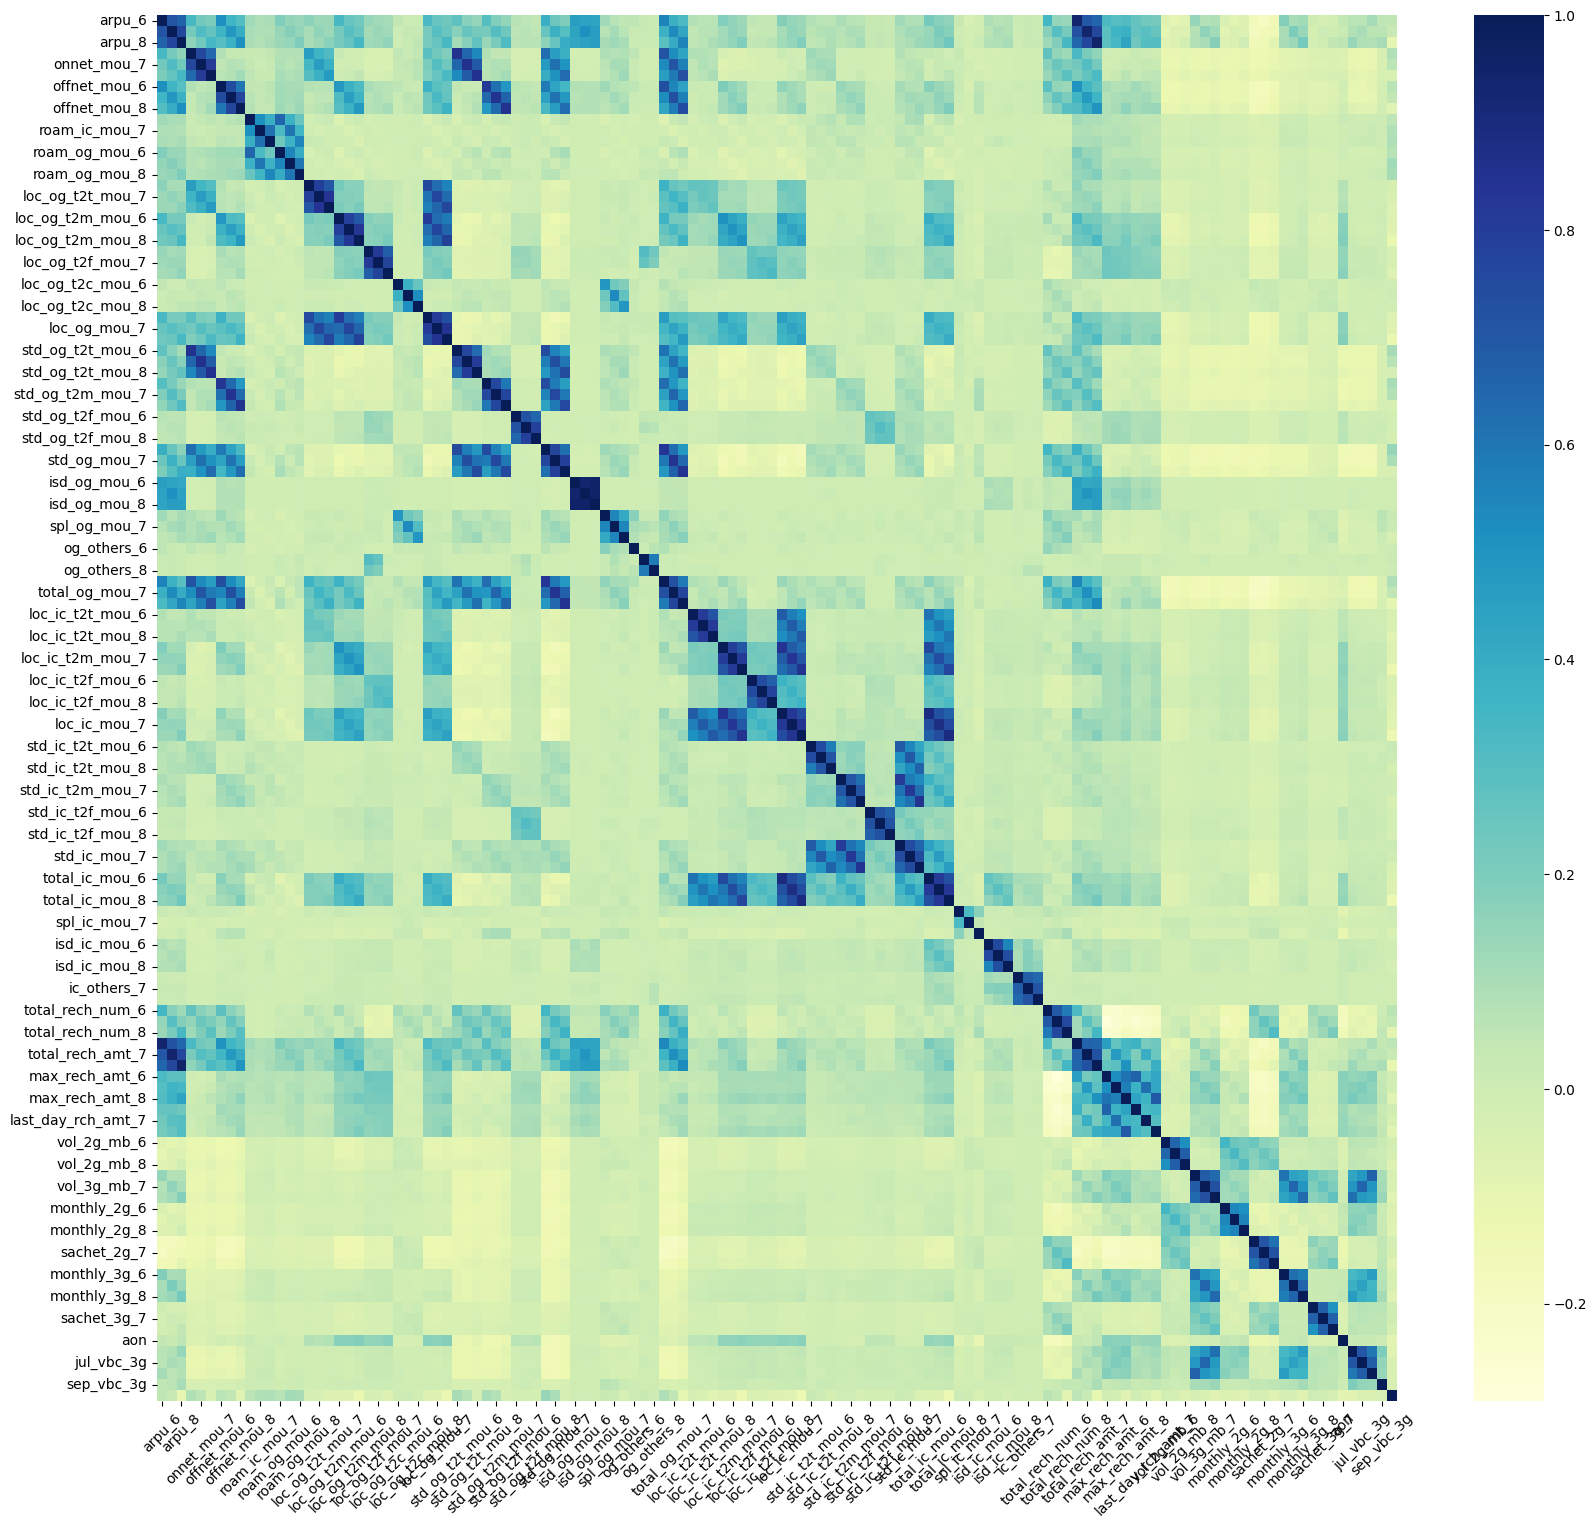

In [37]:
plt.figure(figsize=(20,18))
ax=sns.heatmap(telecom_1.corr(), annot = False, cmap = "YlGnBu")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

`As we can see from the graph, correlation is present between features. We will take care of correlated features later, or any  other suitable technique for this problem.`

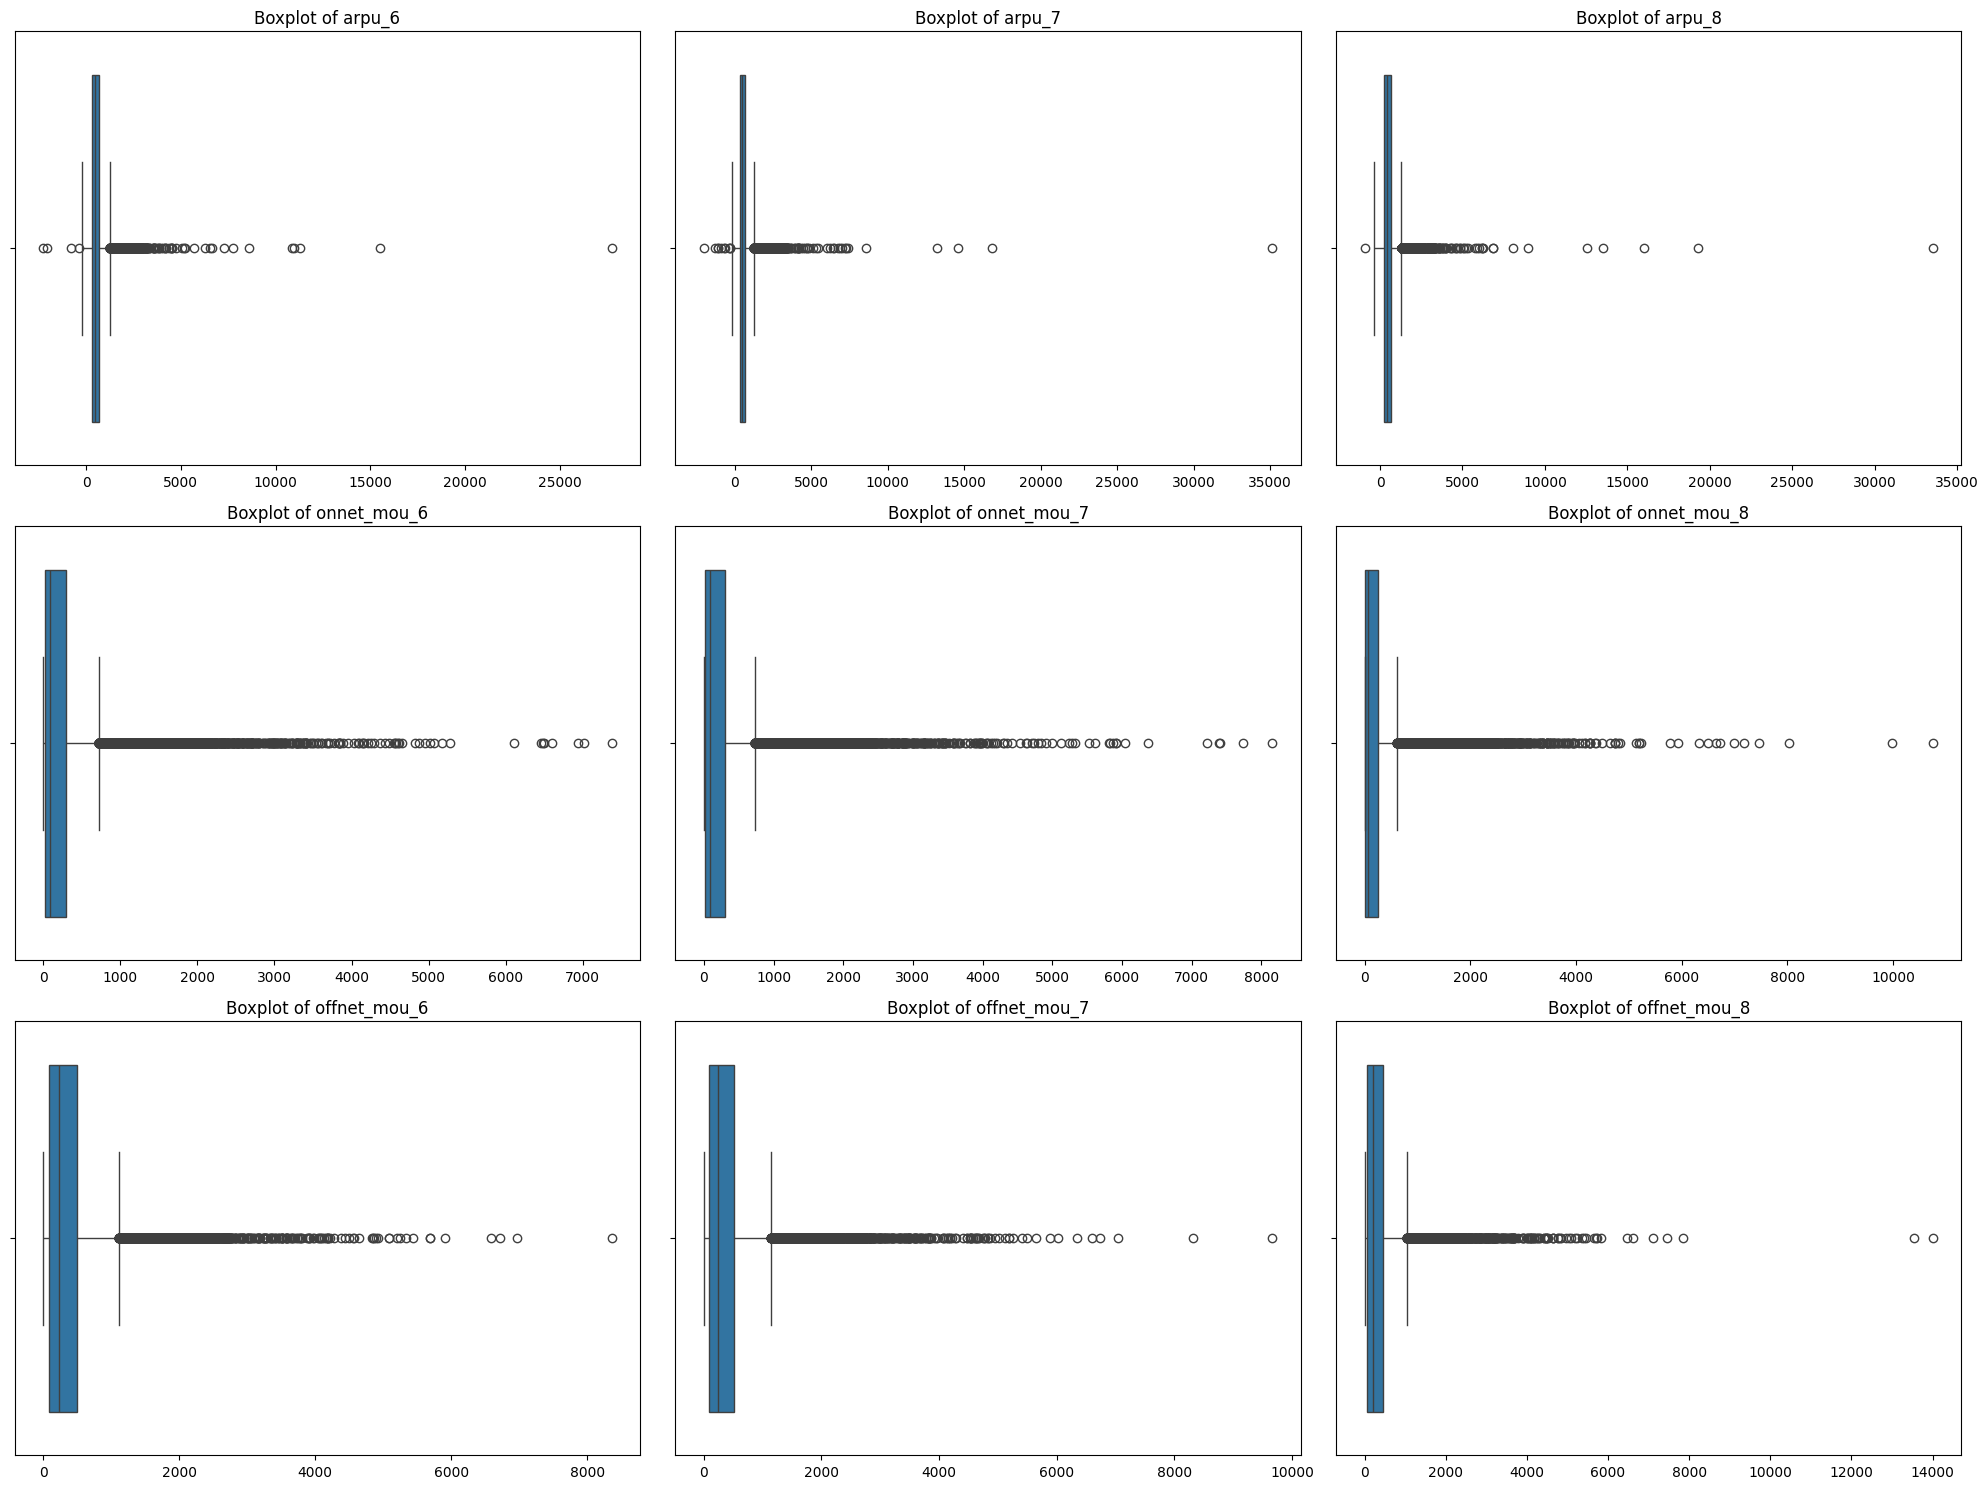

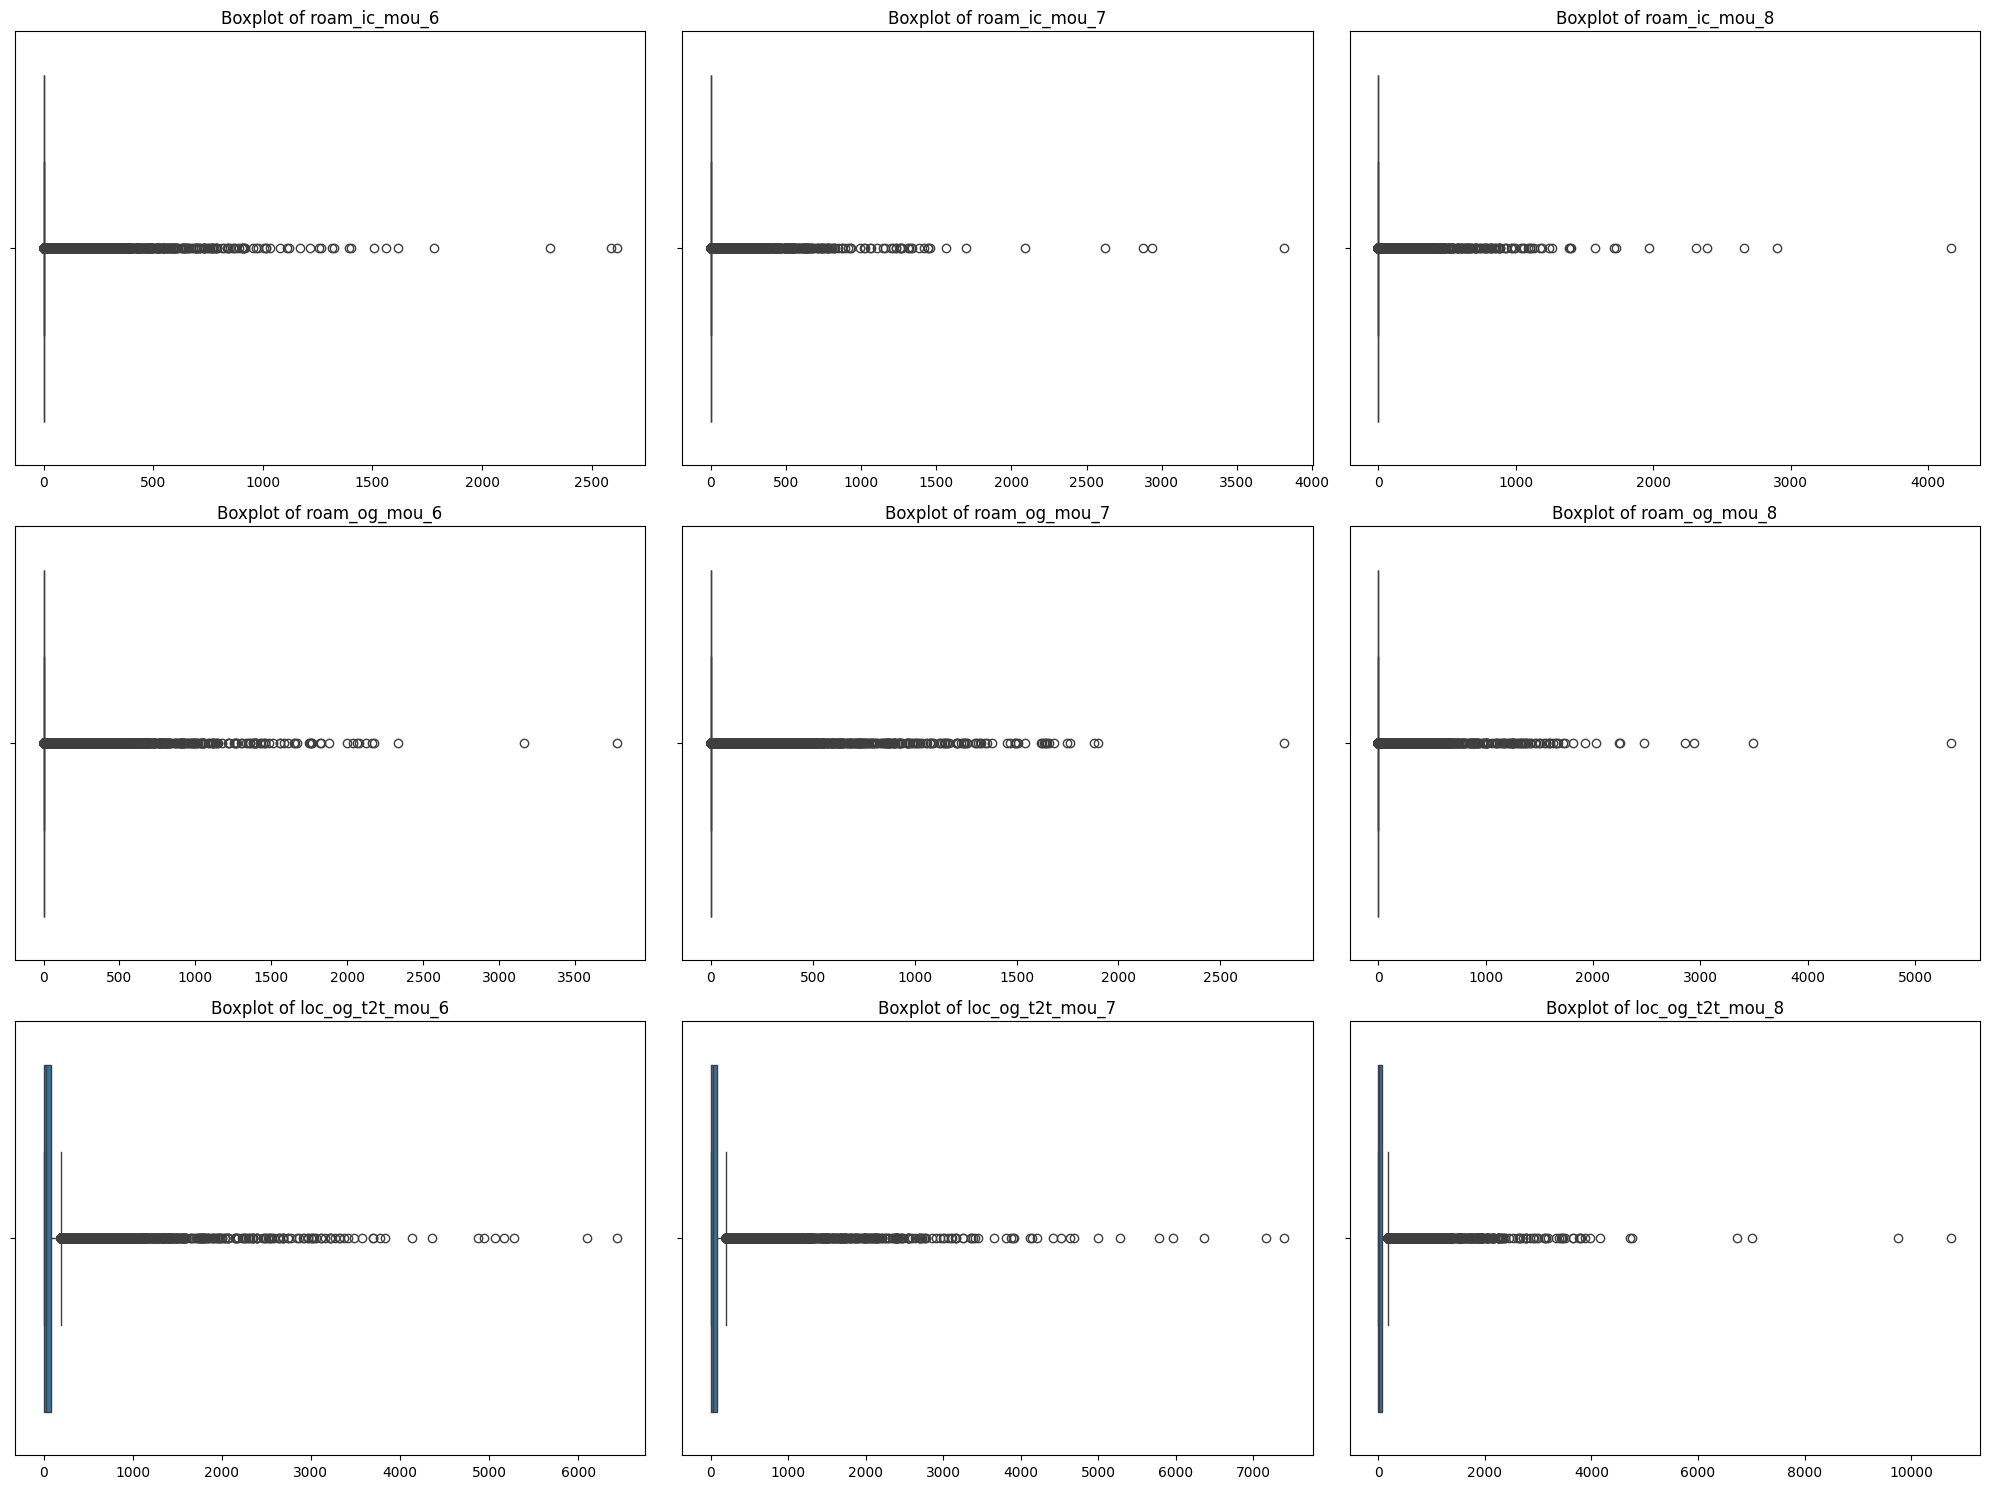

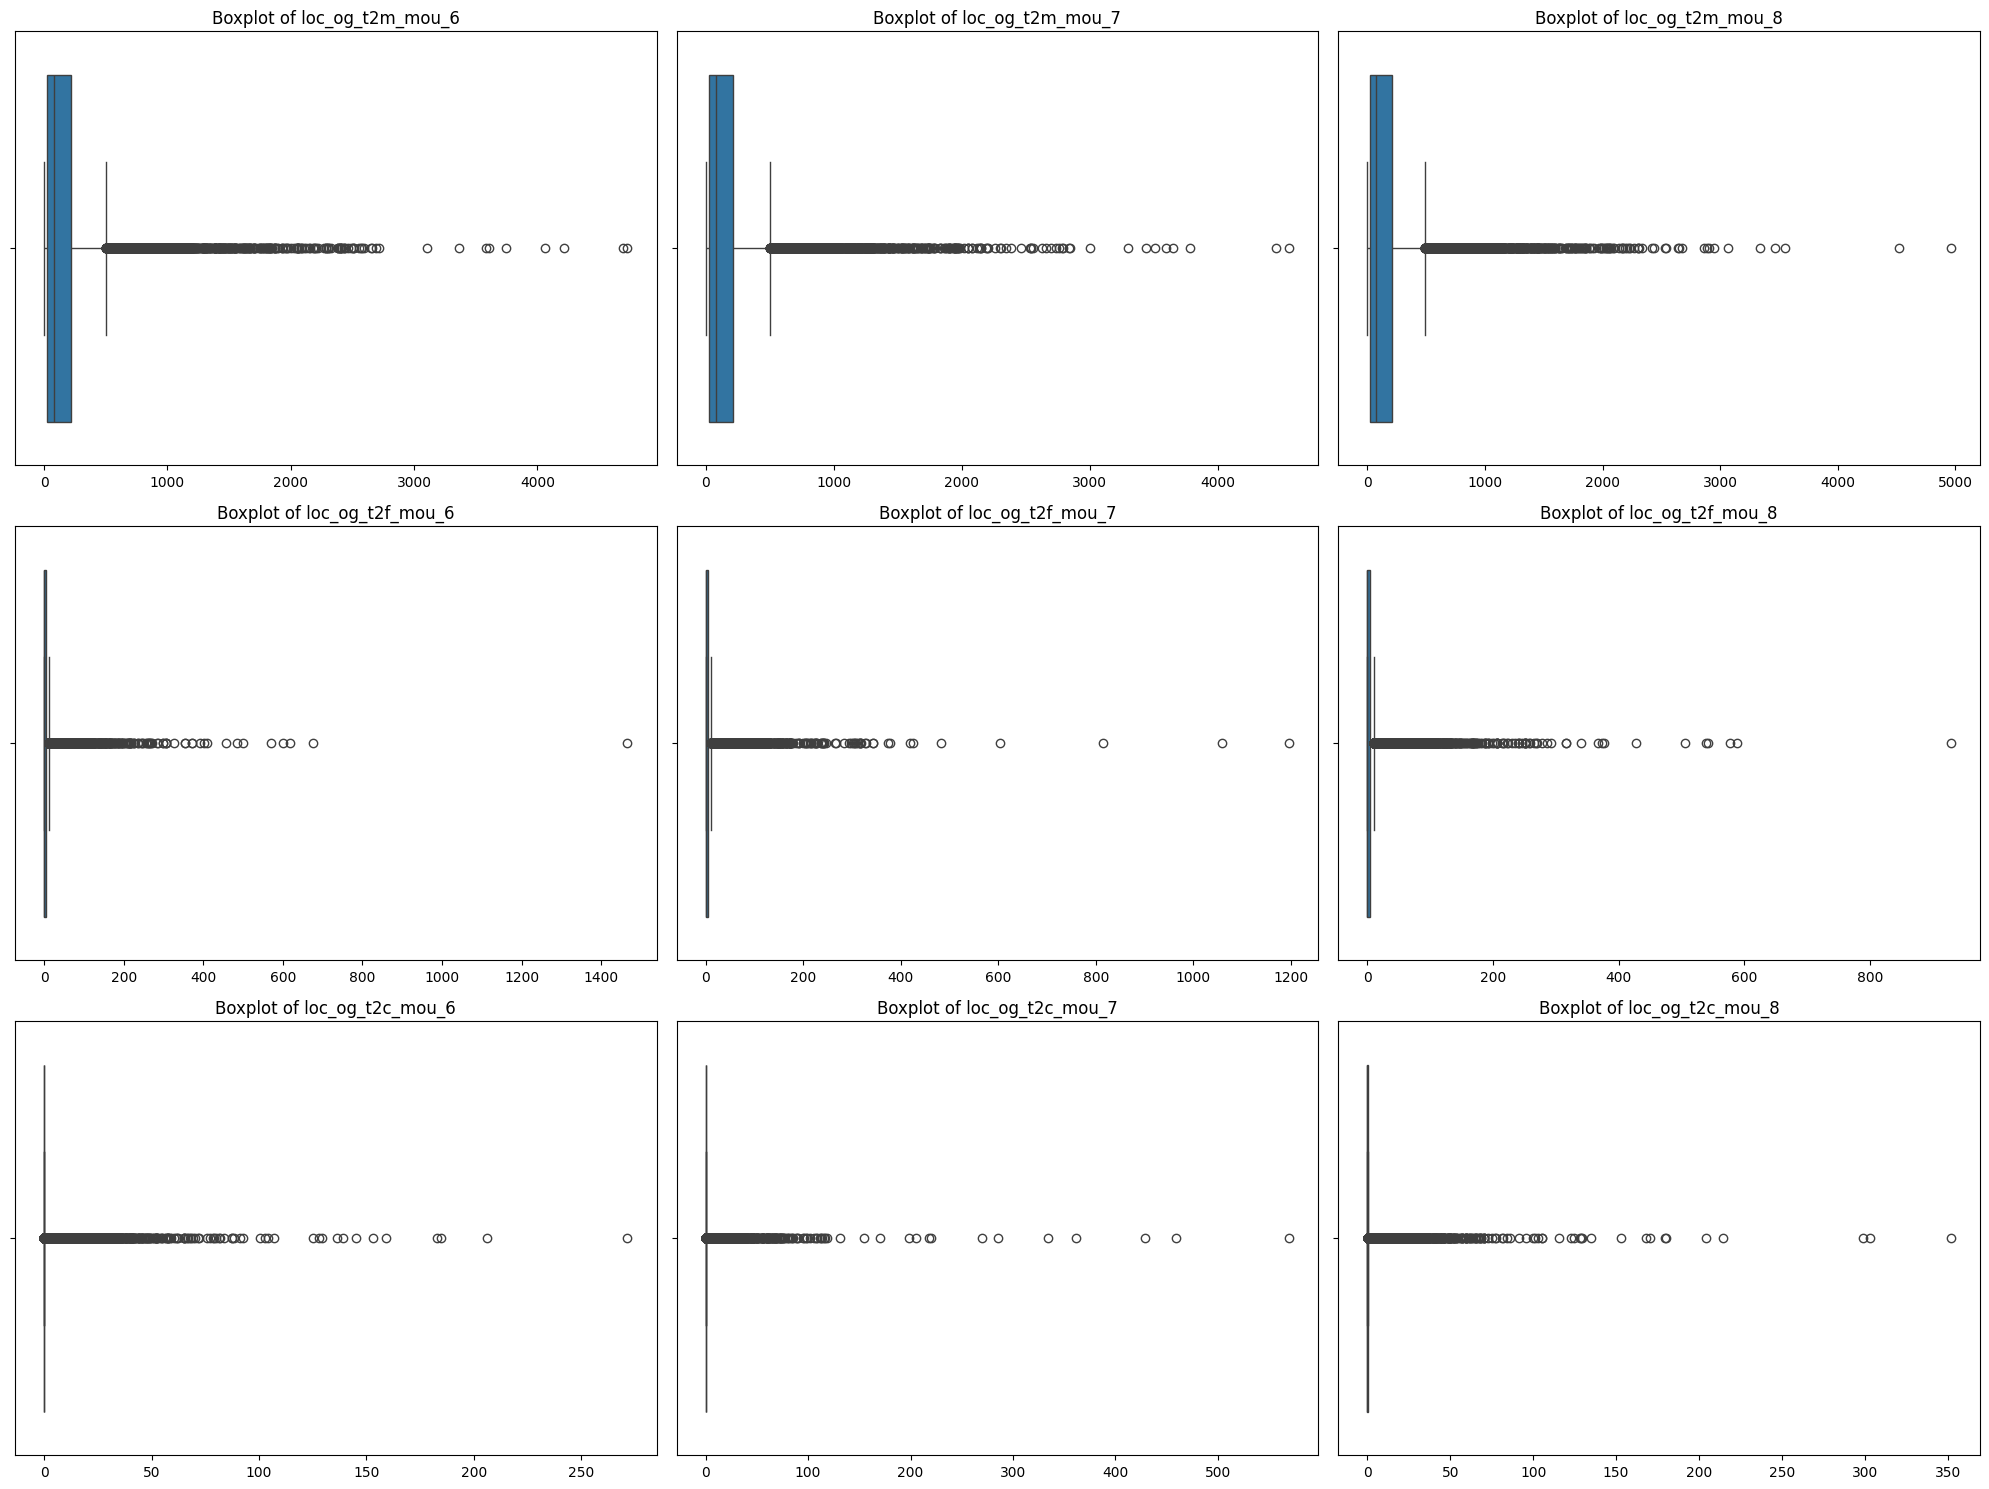

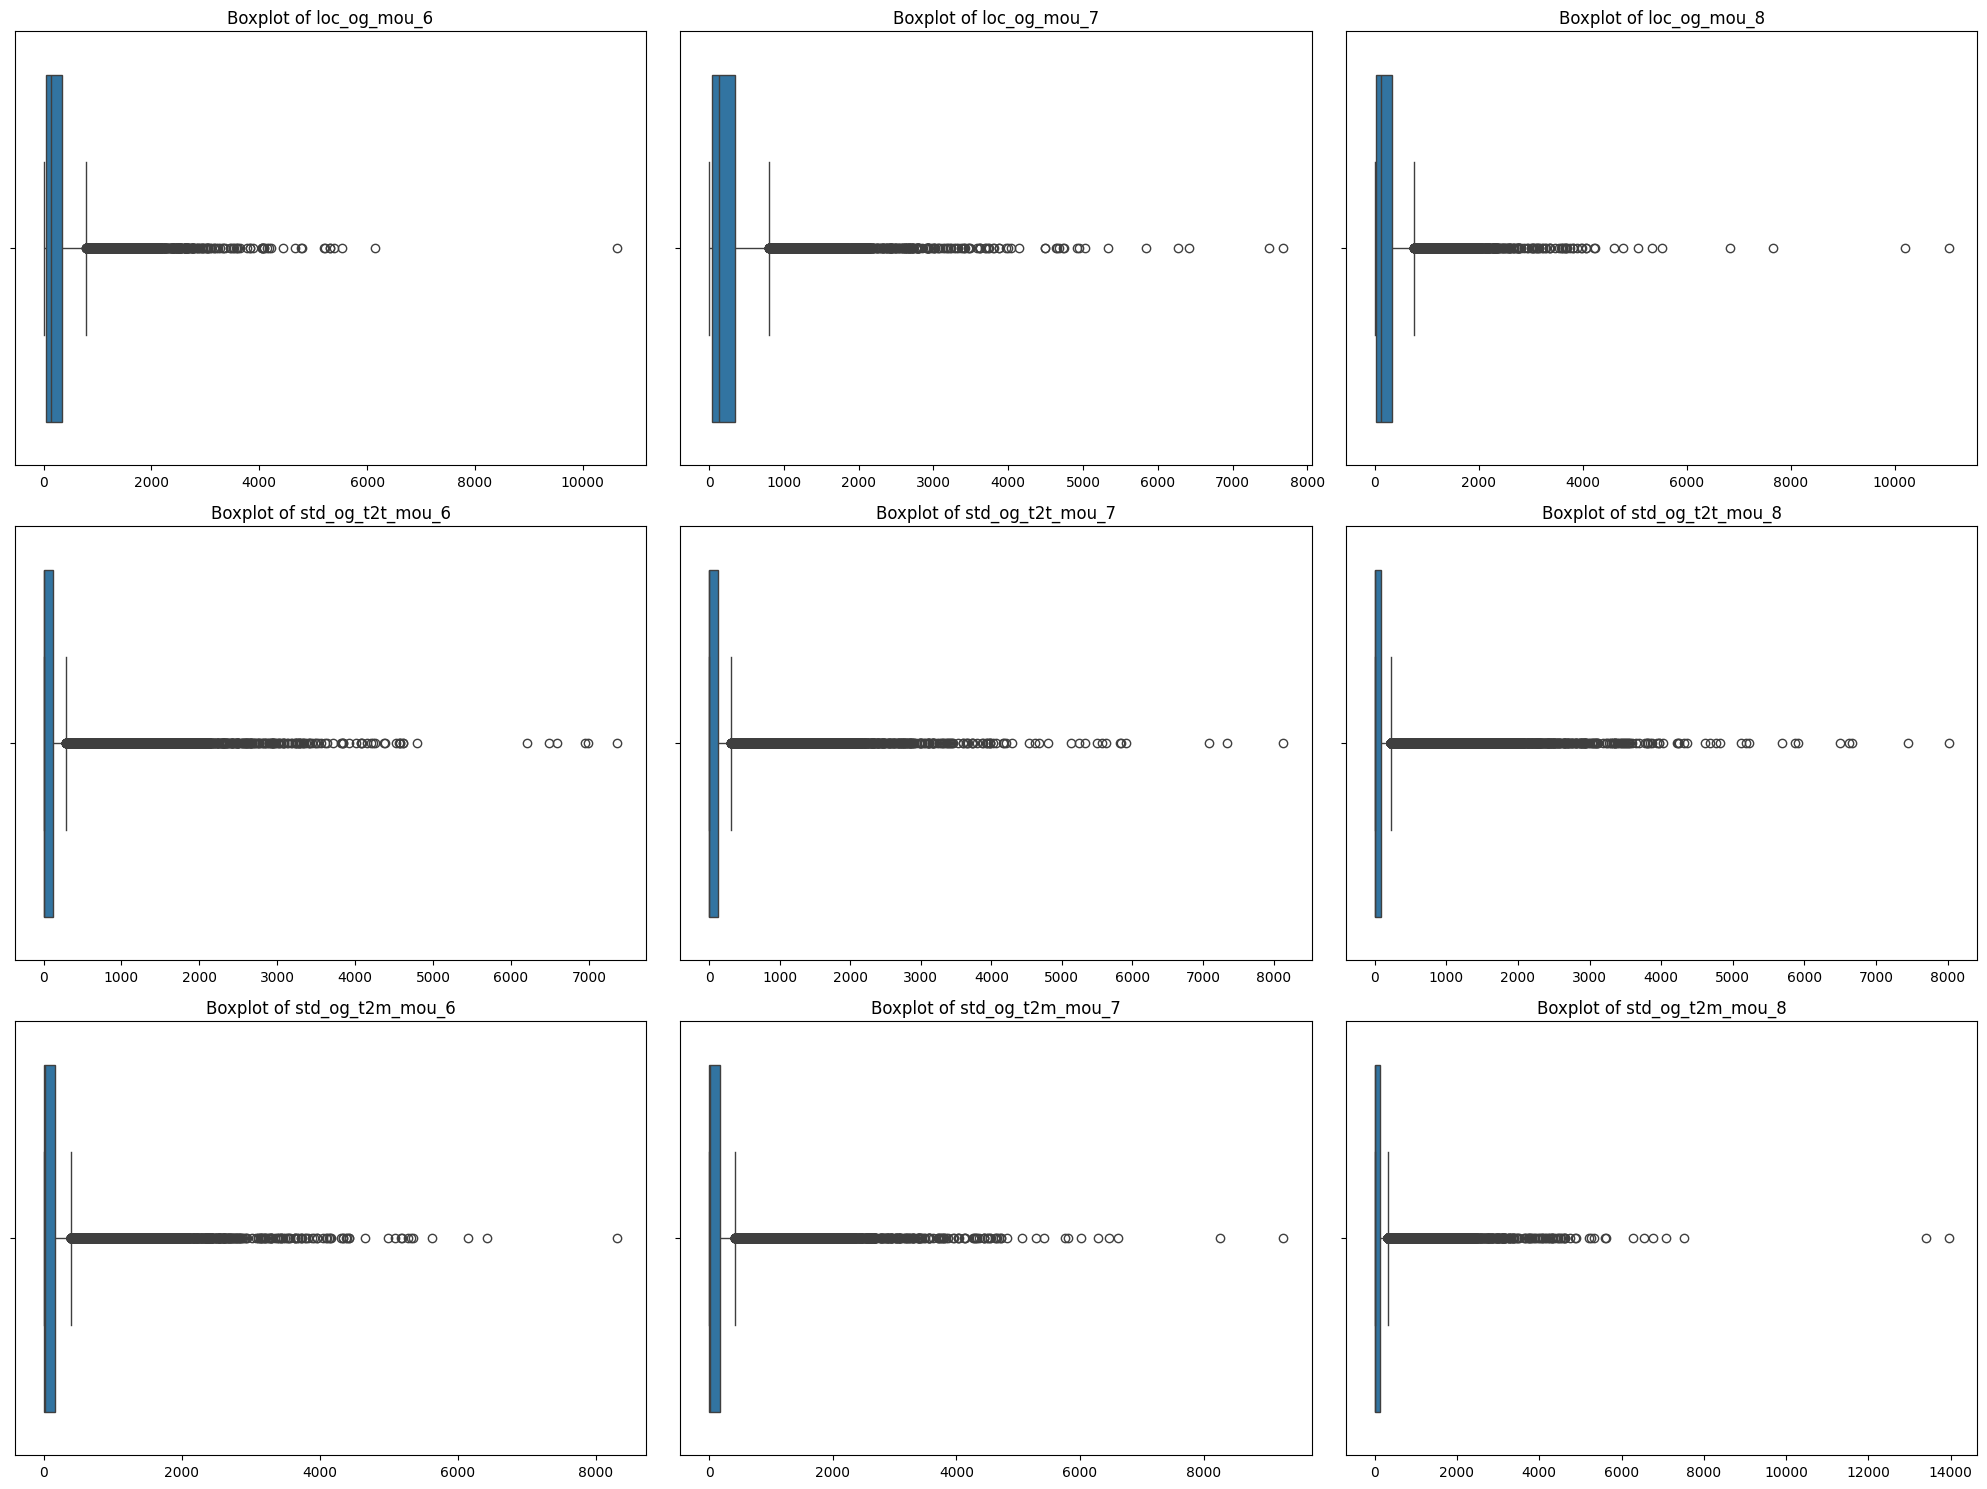

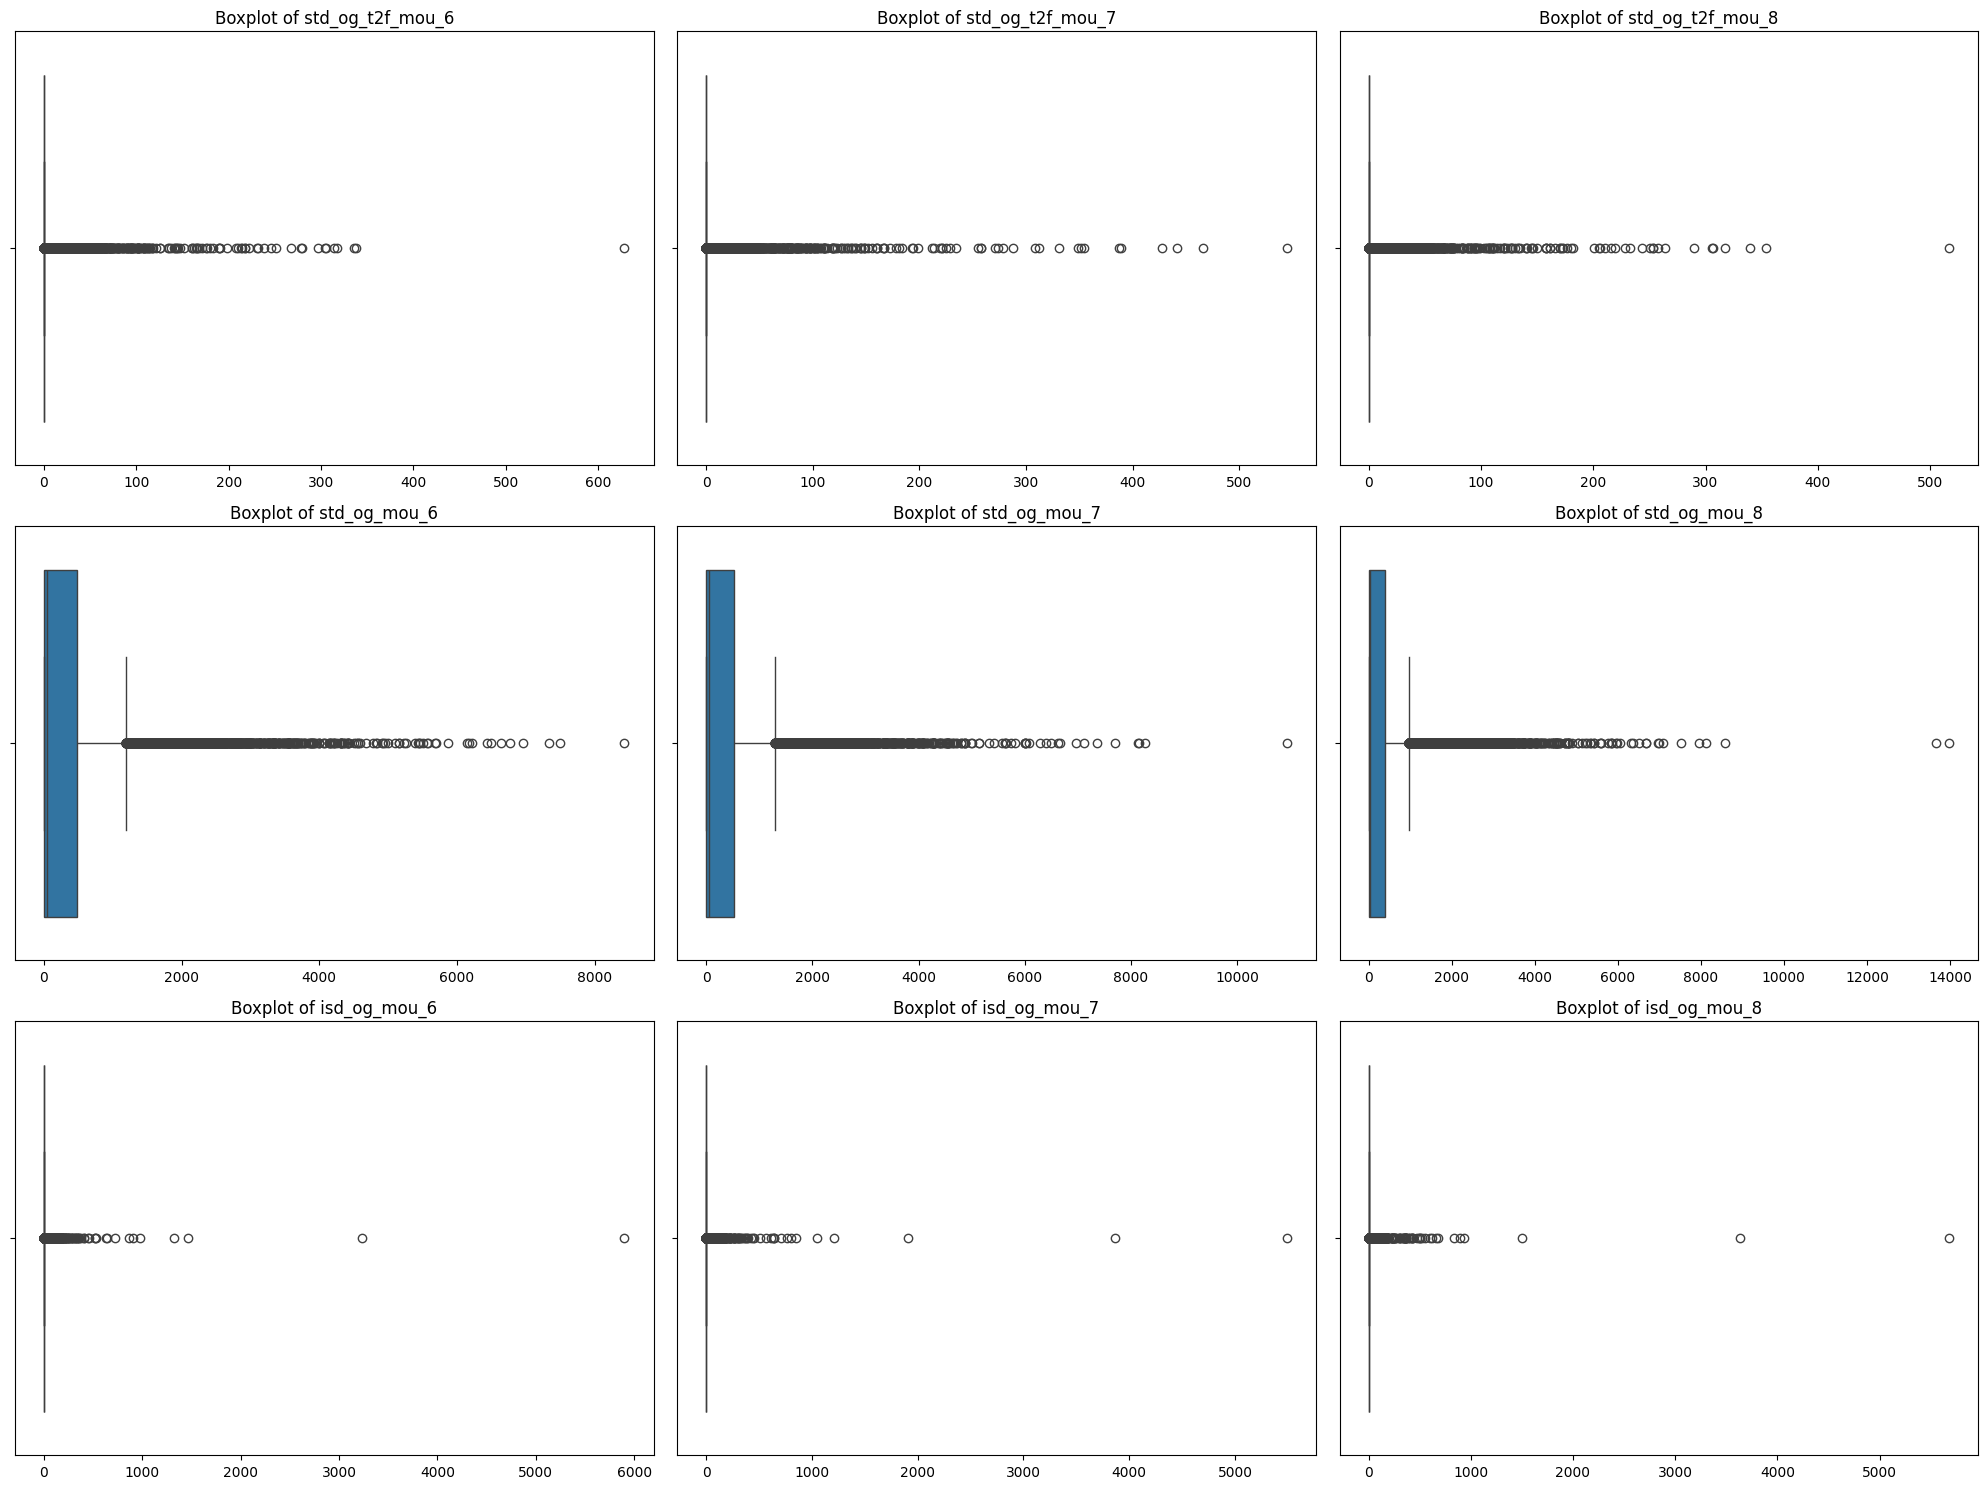

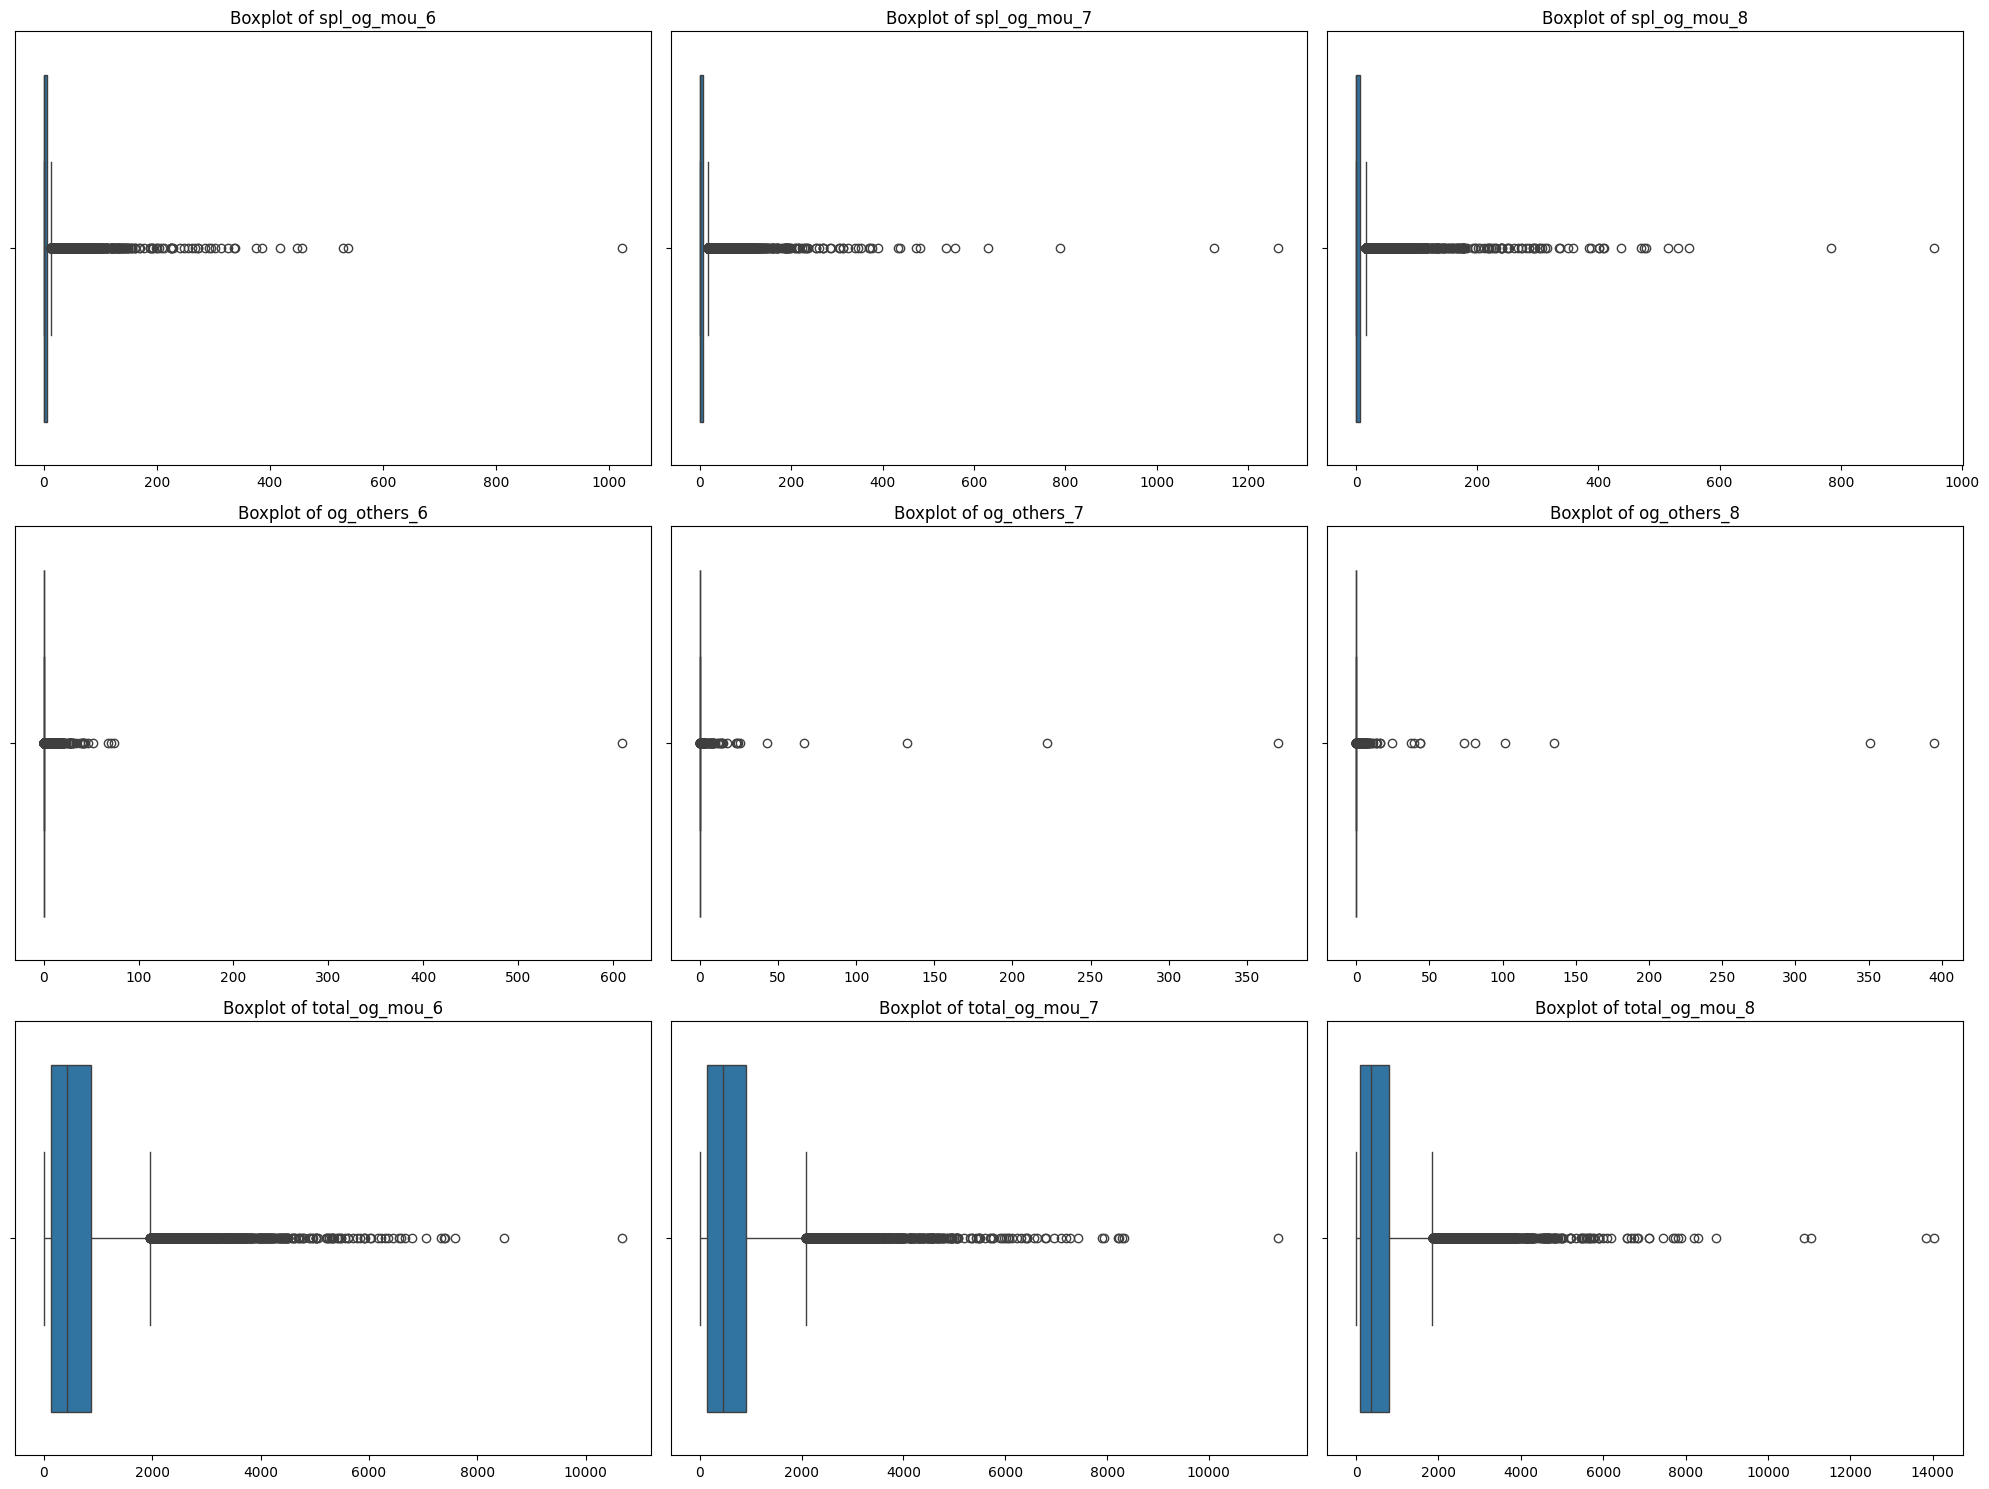

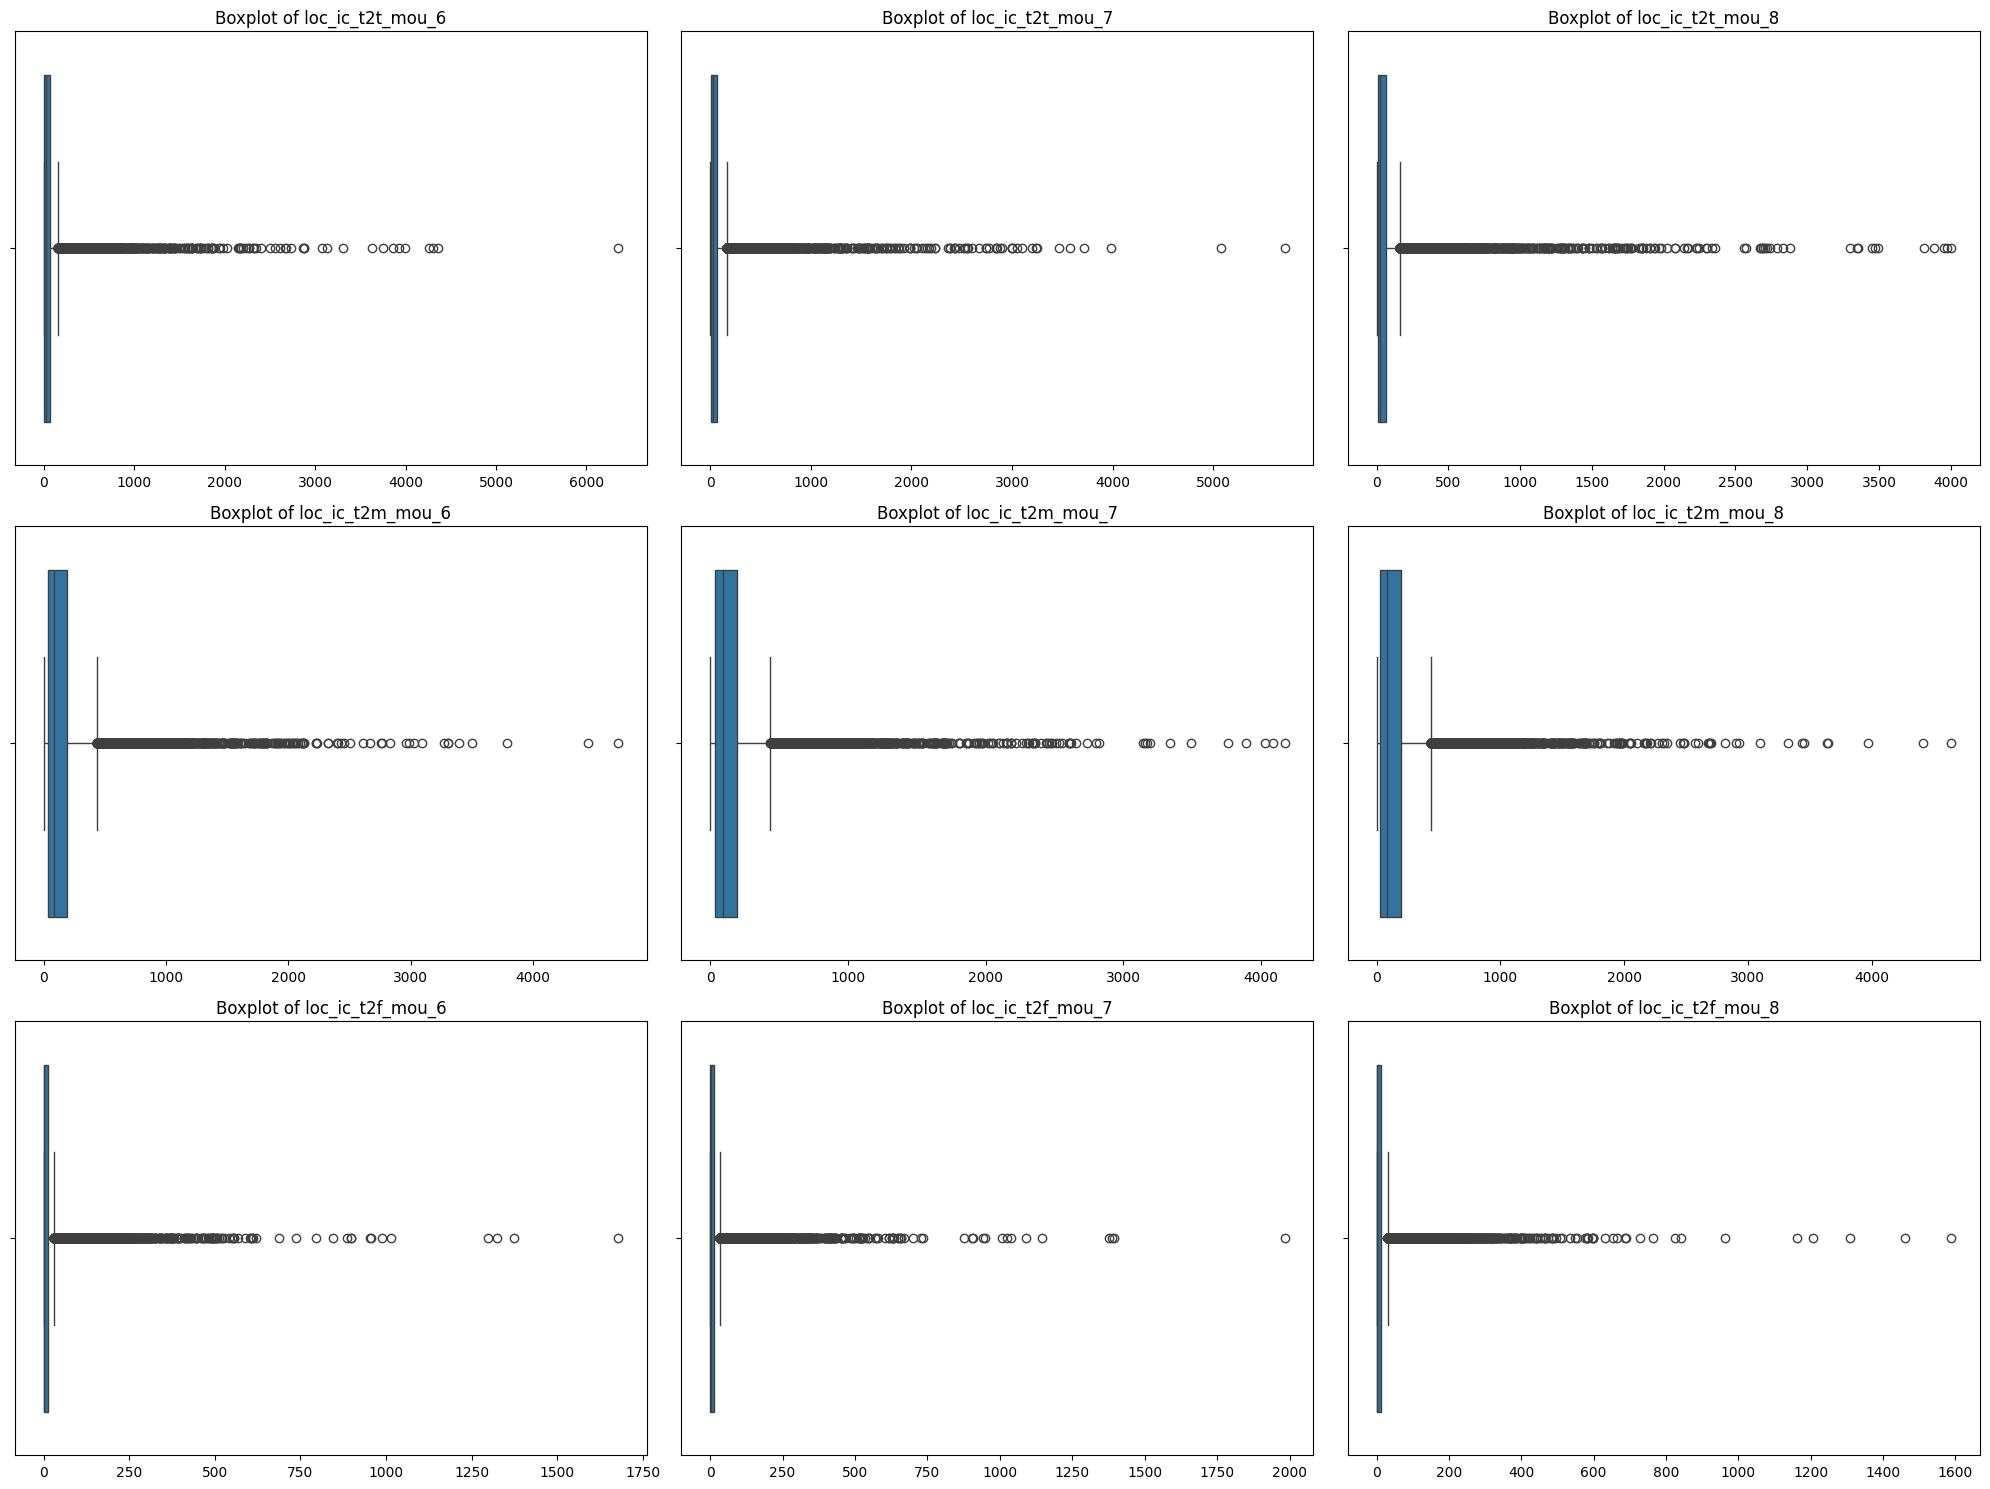

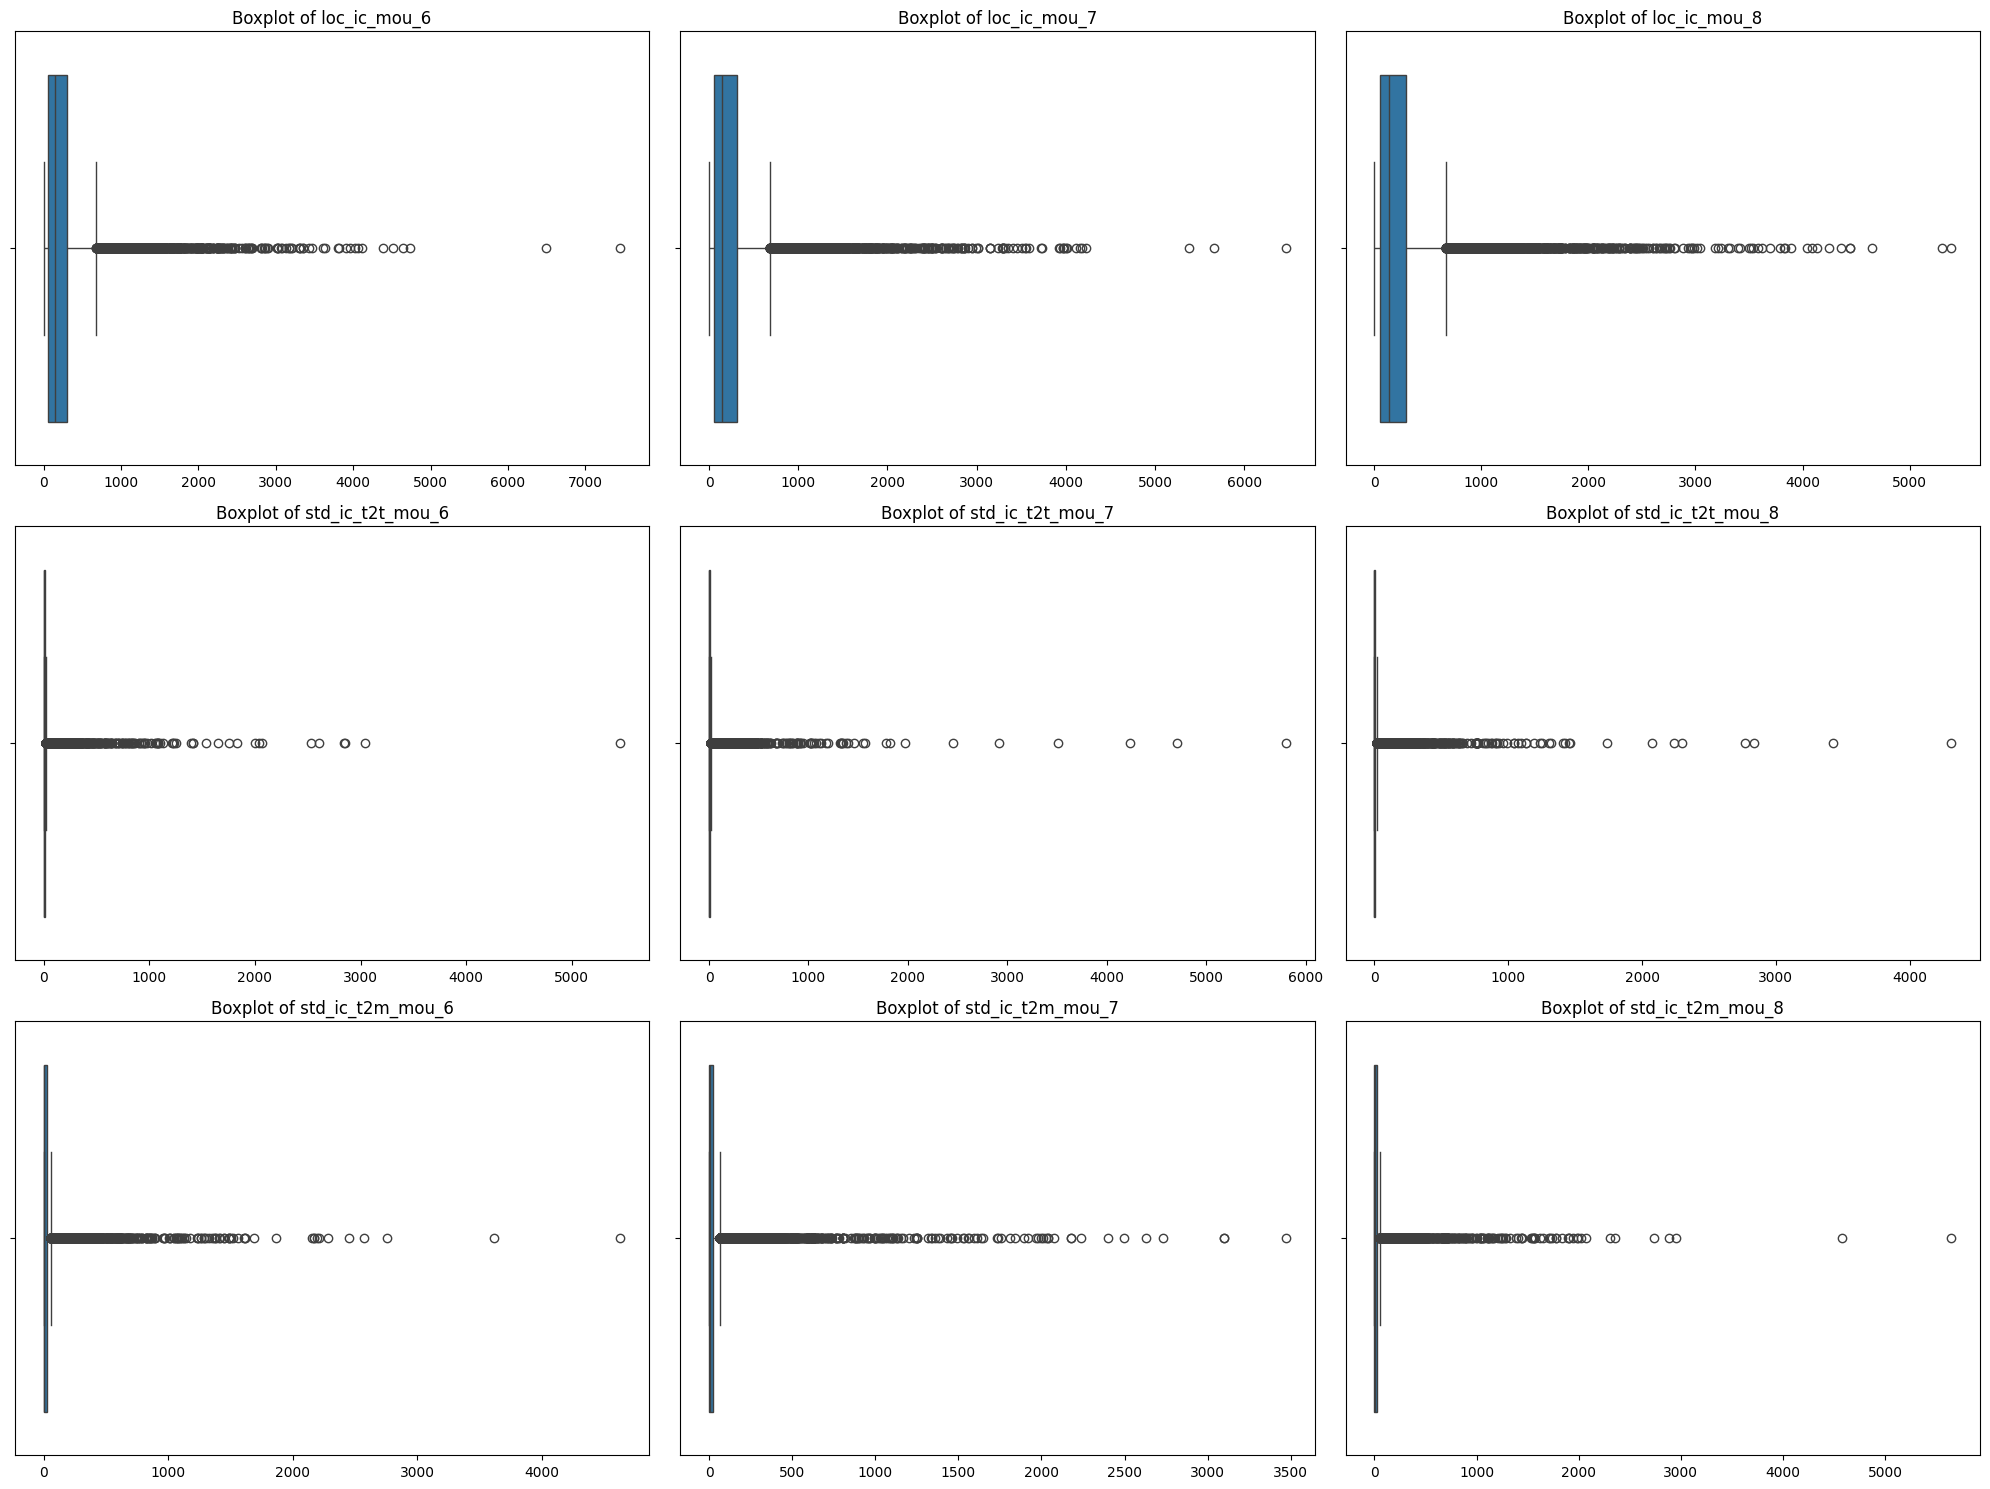

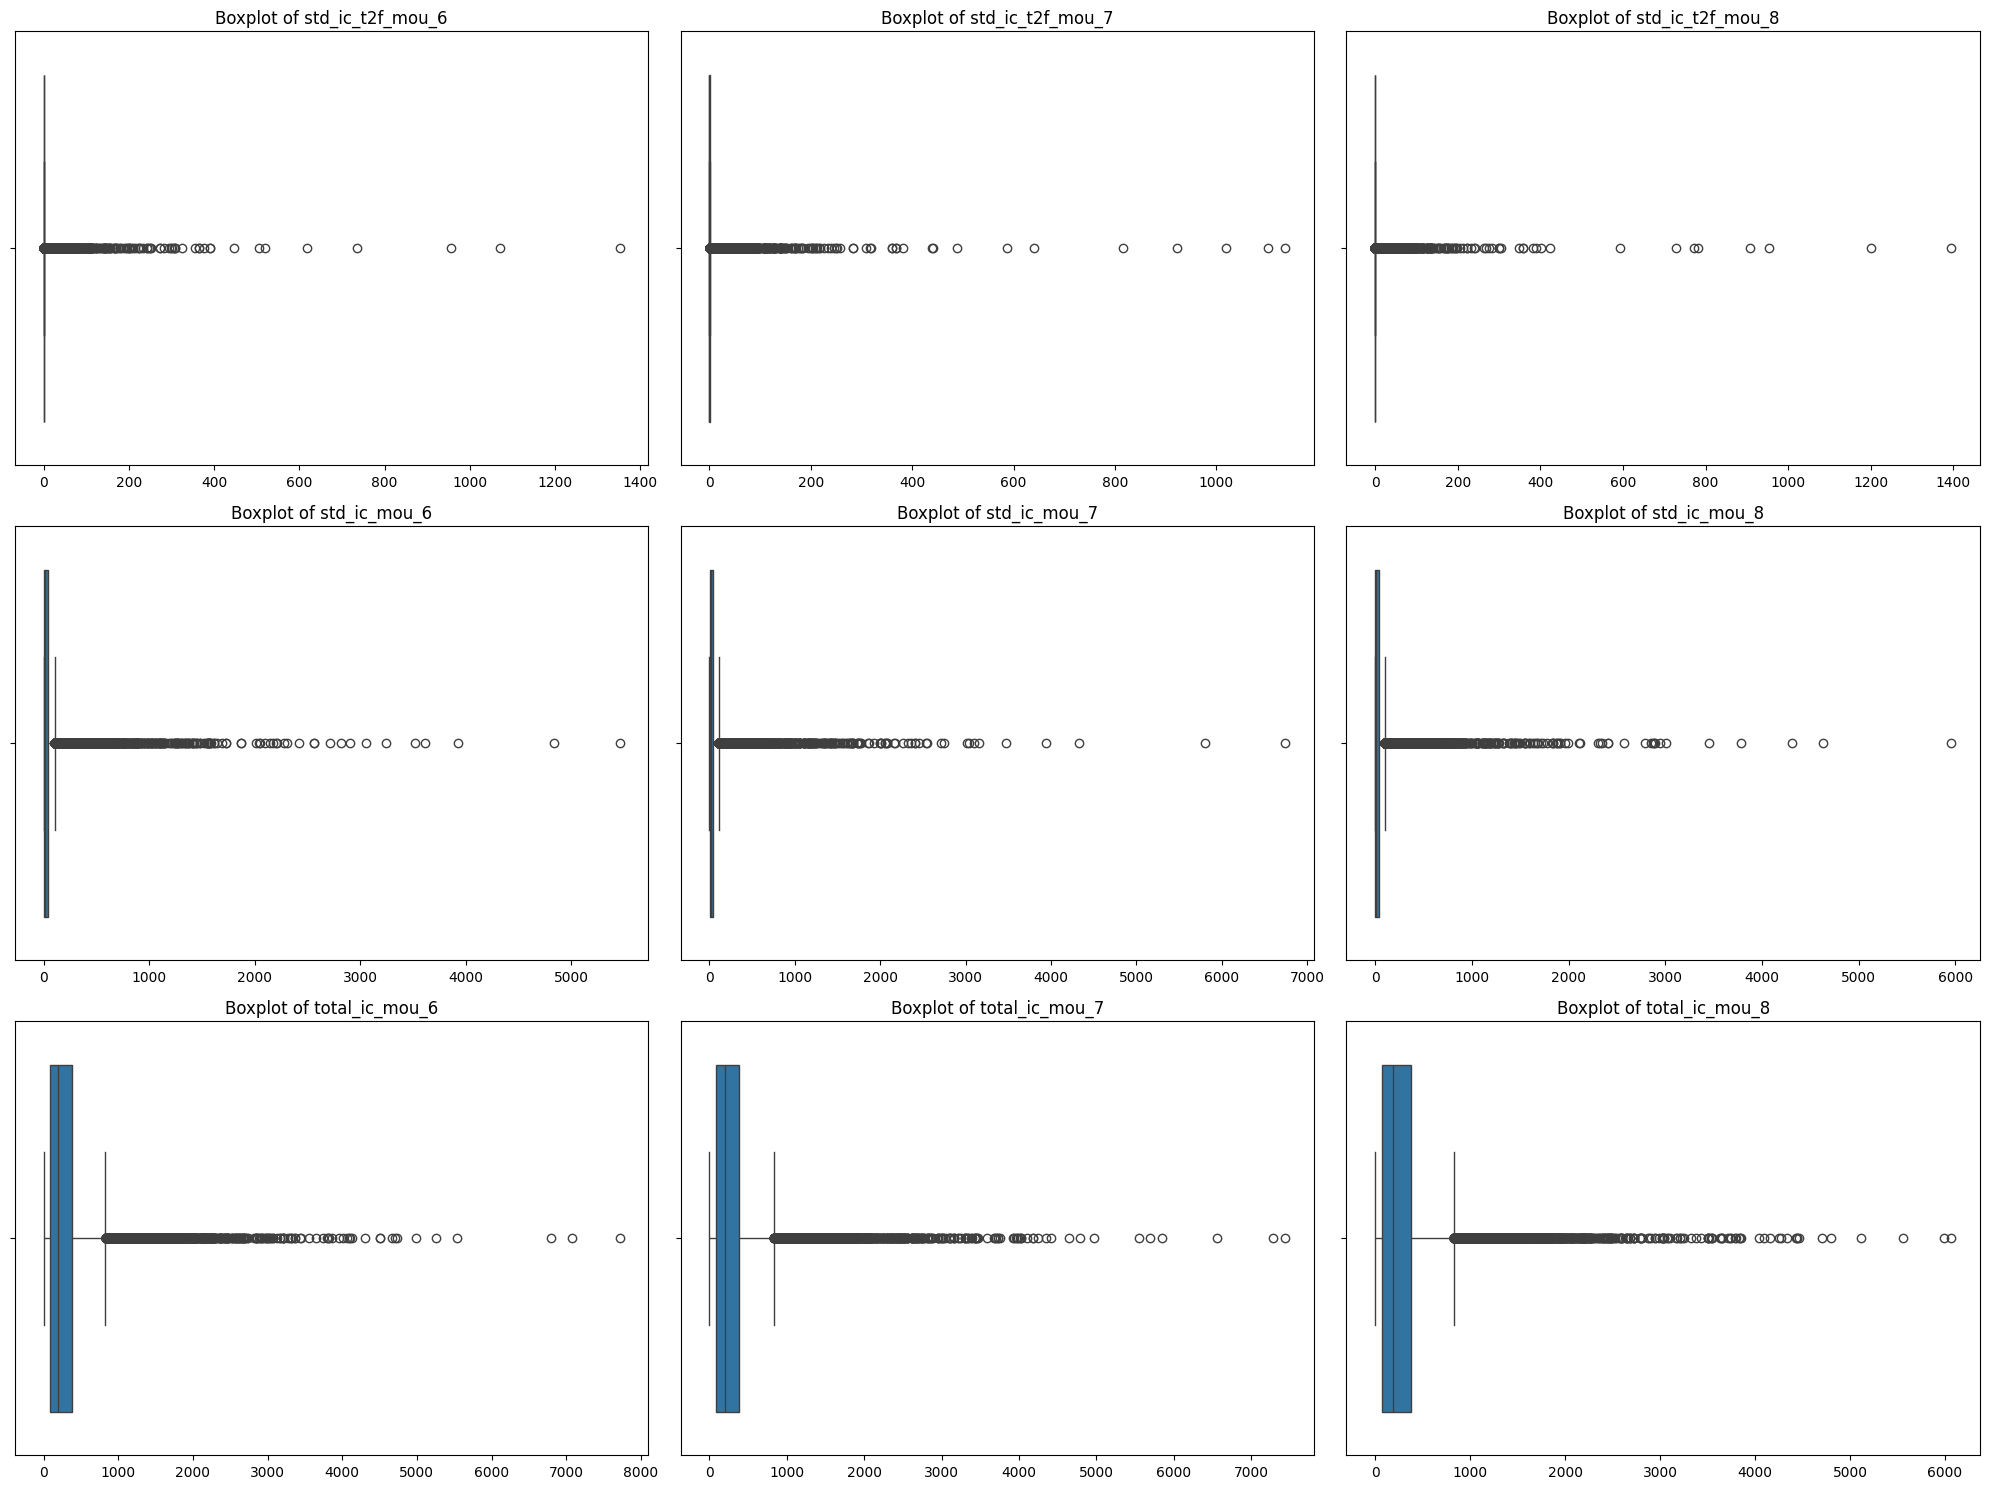

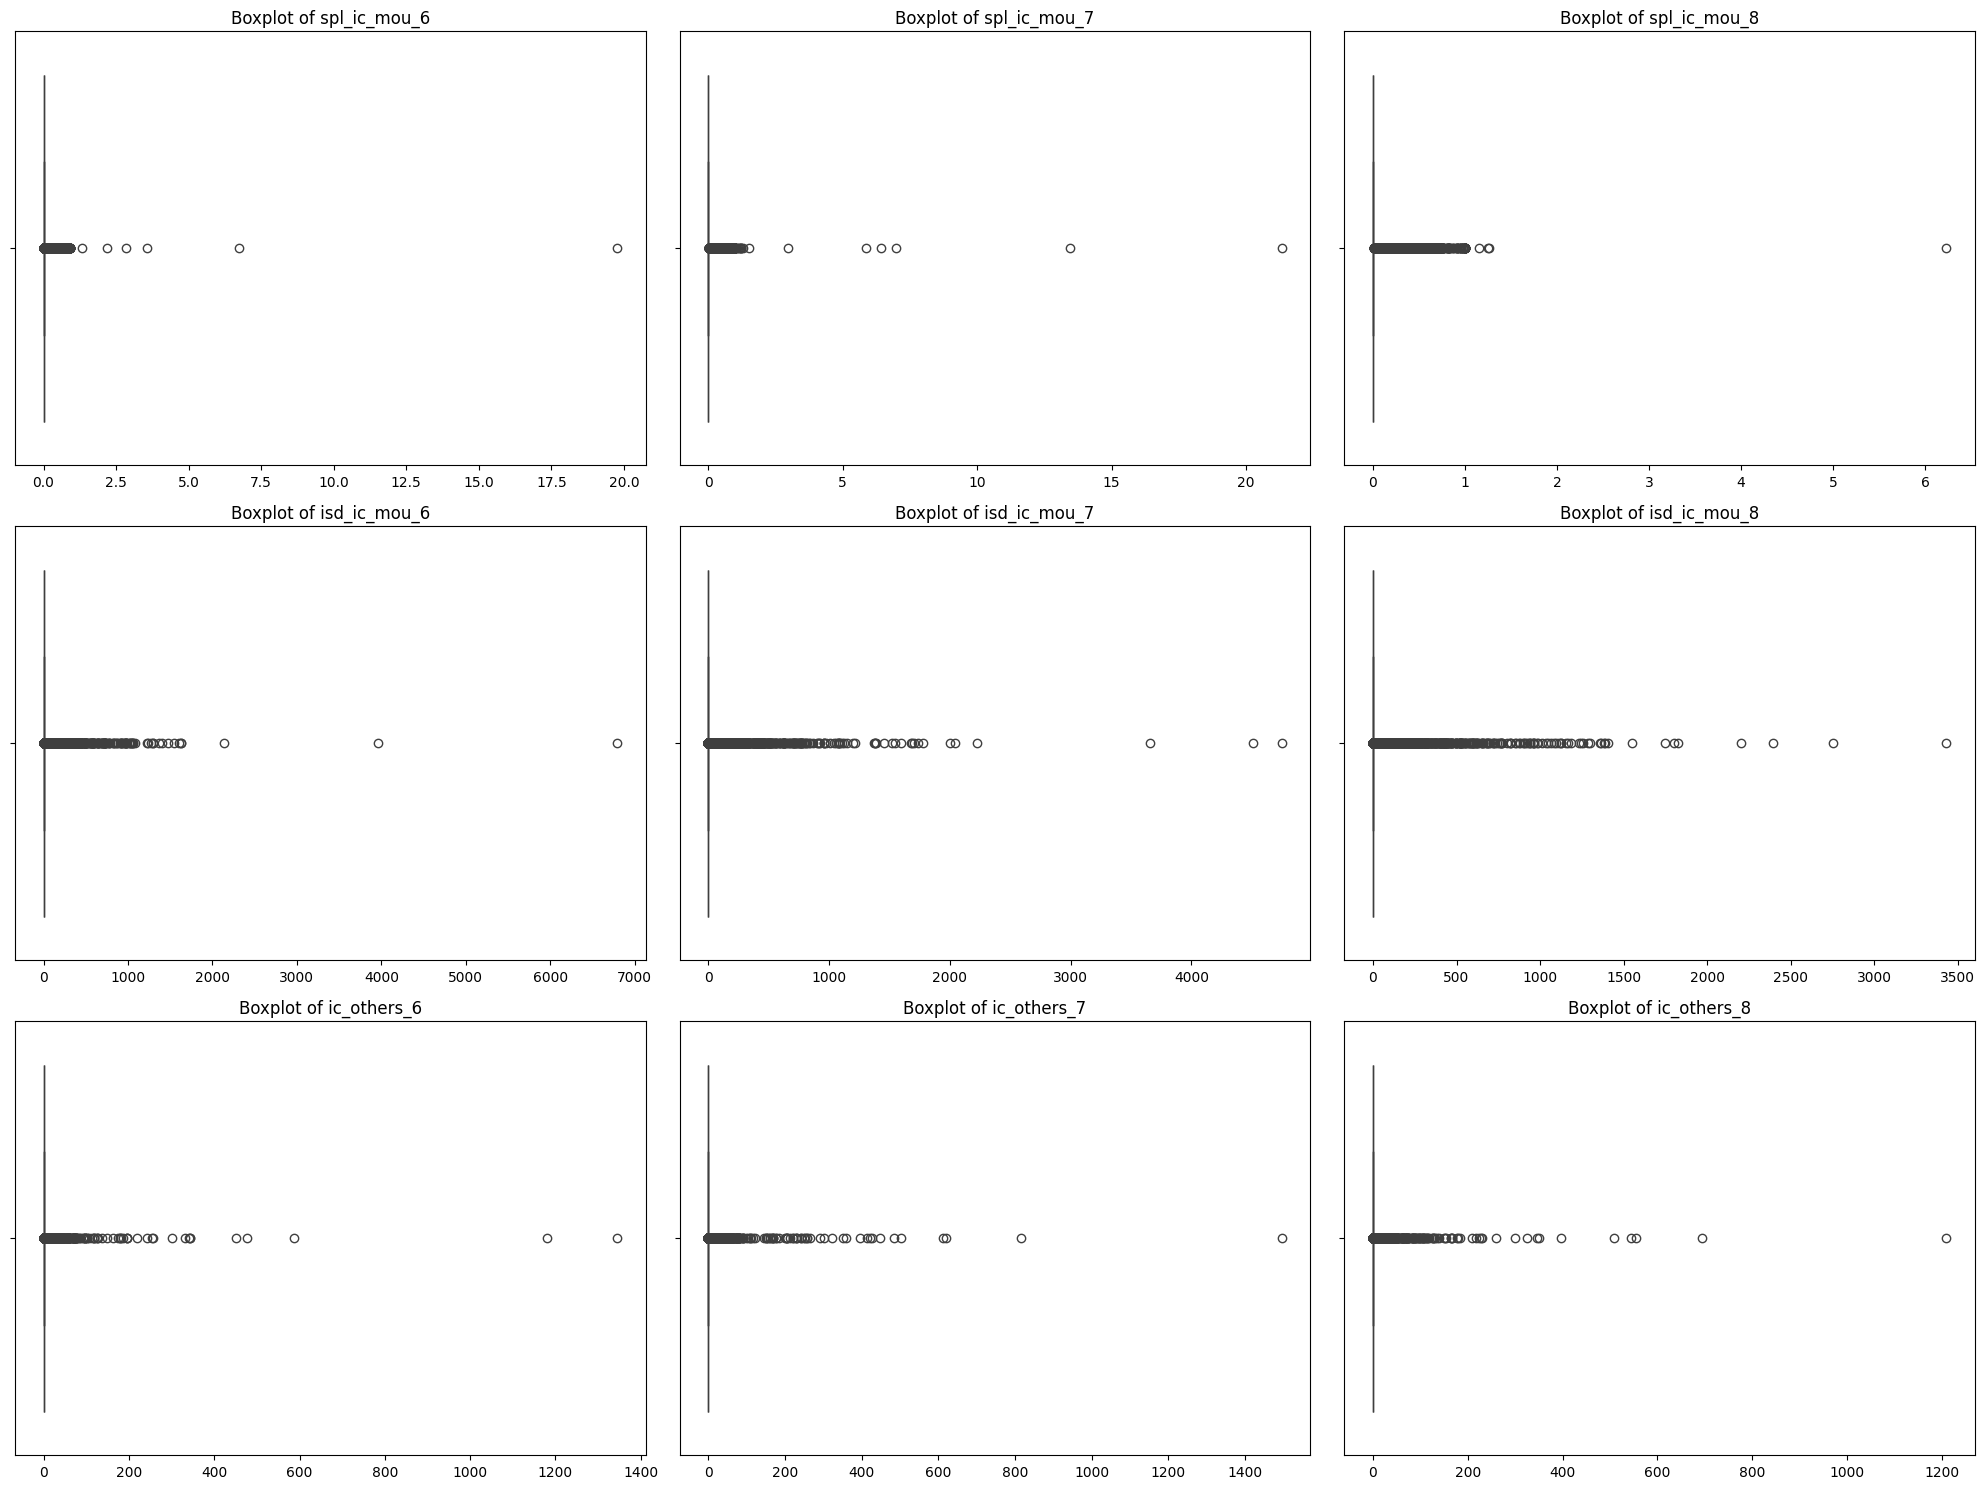

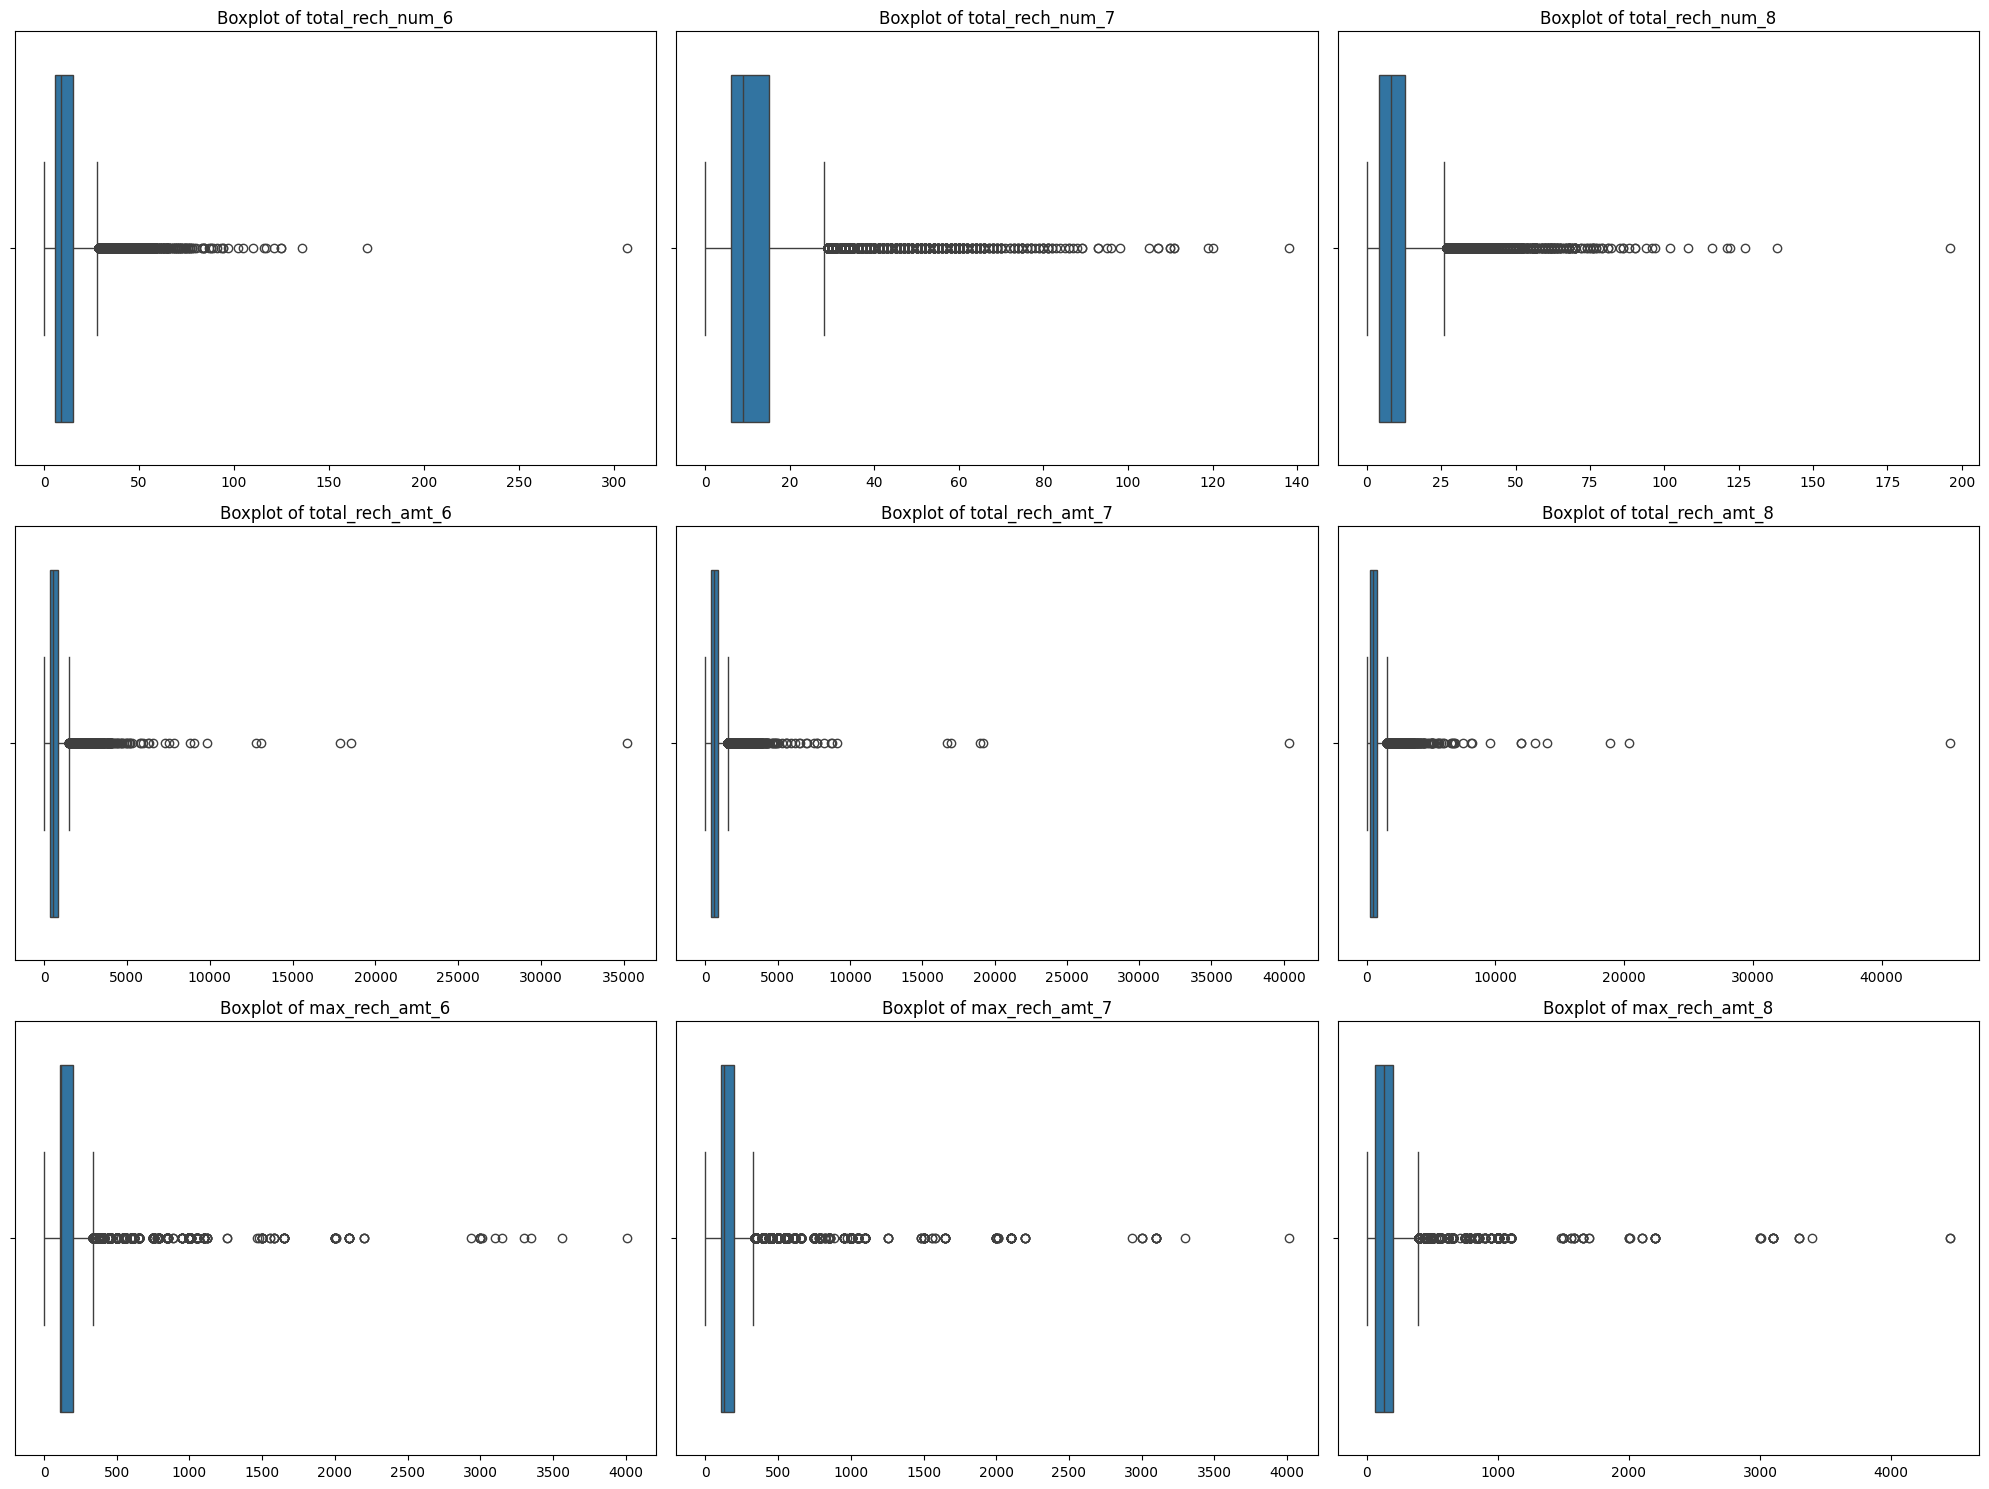

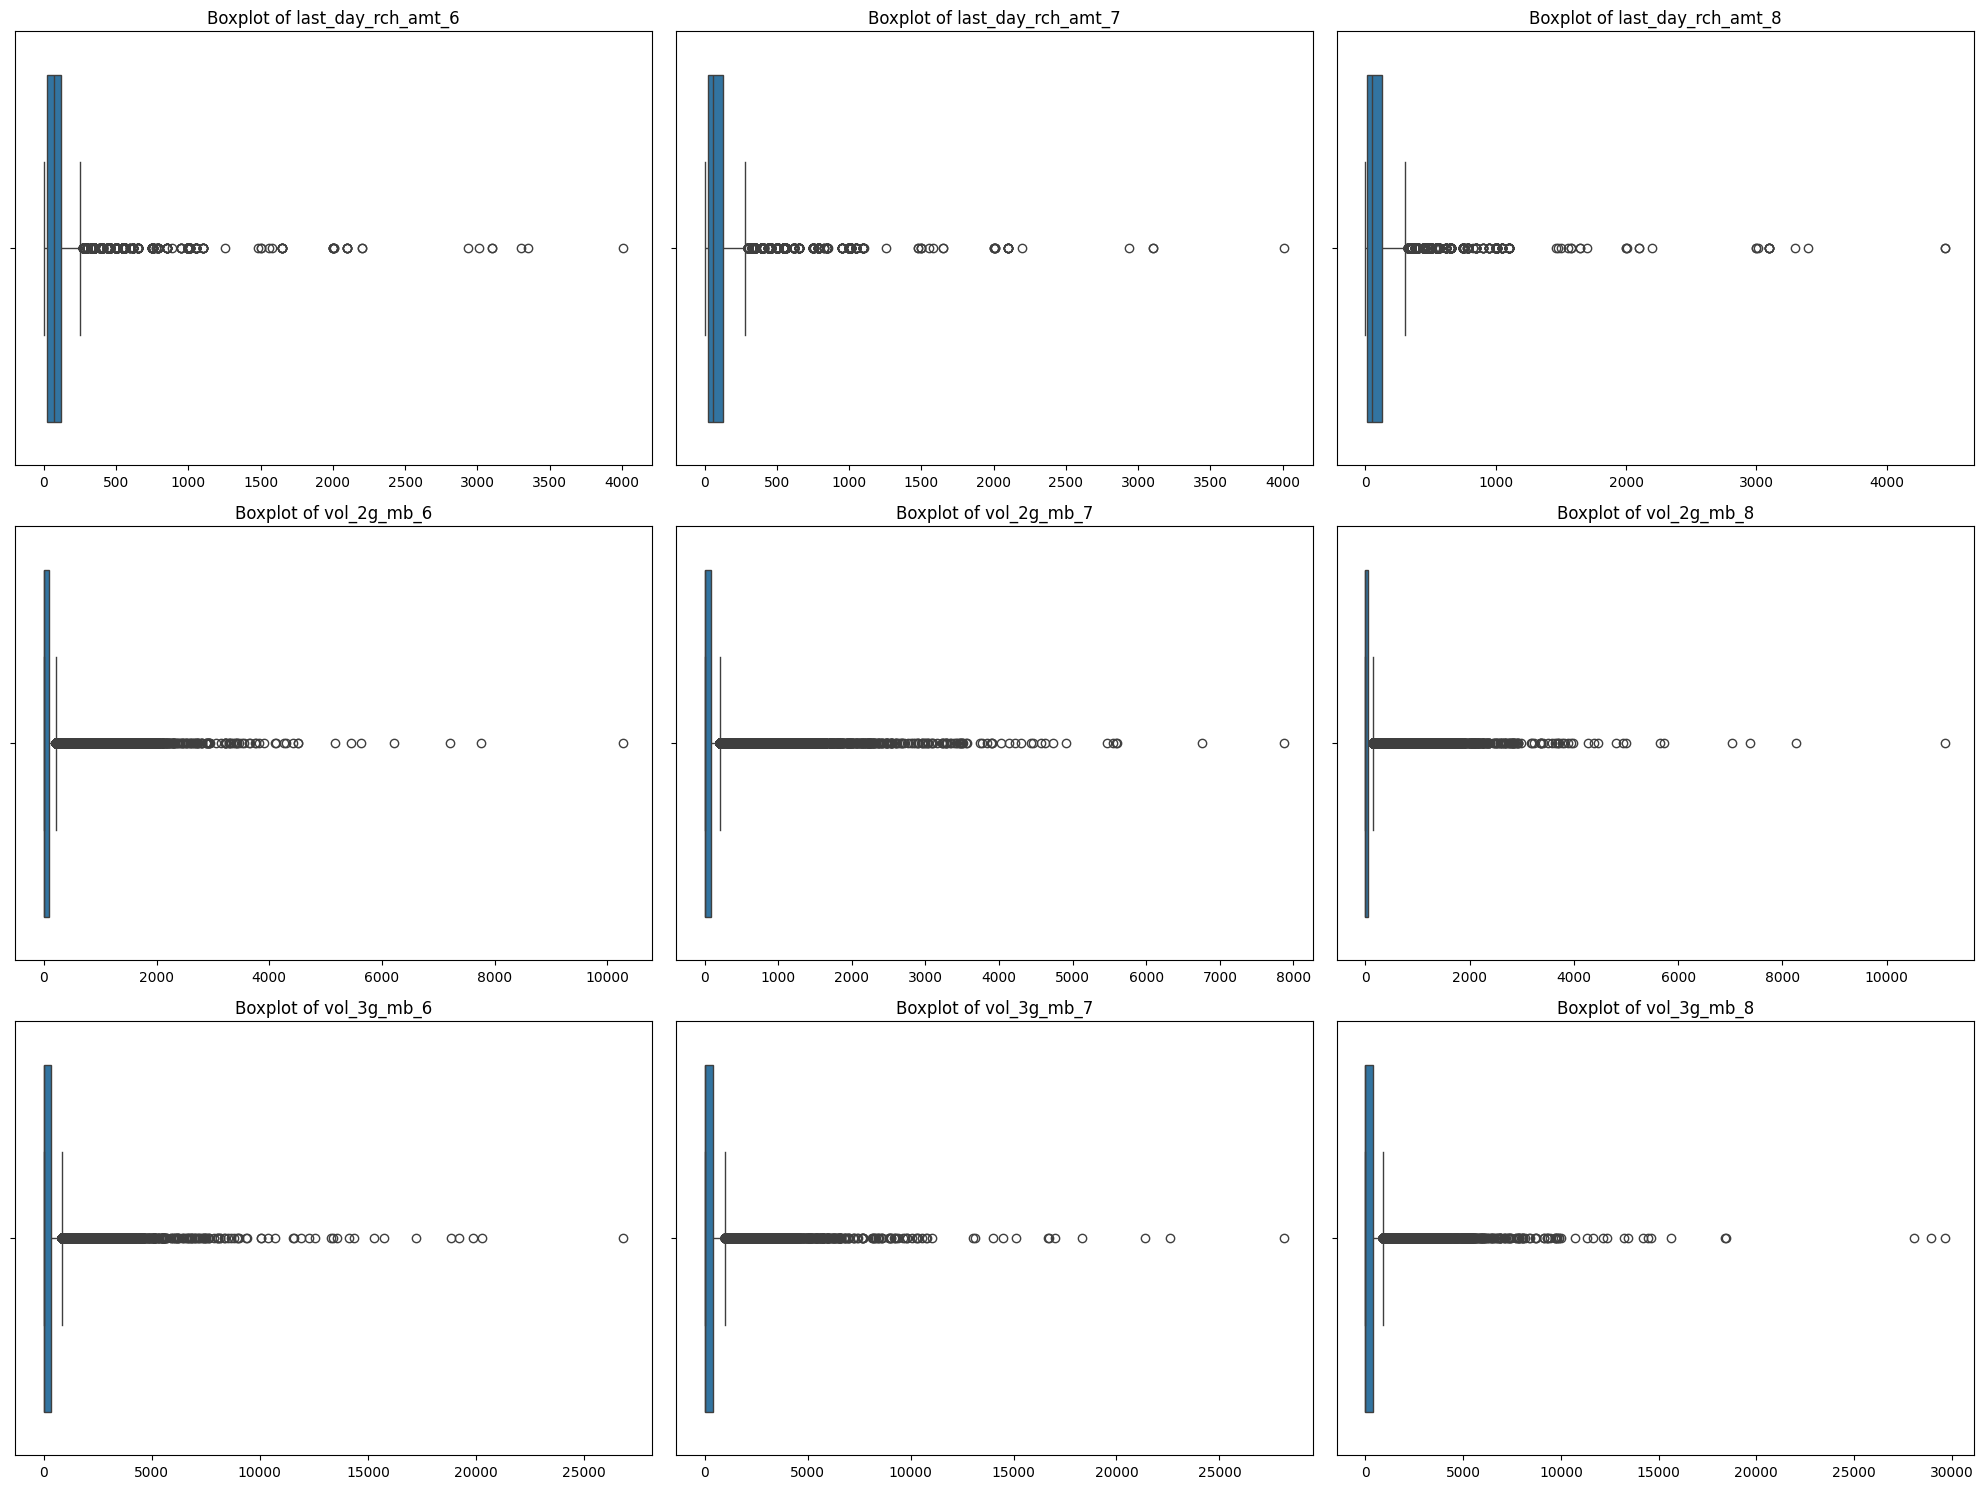

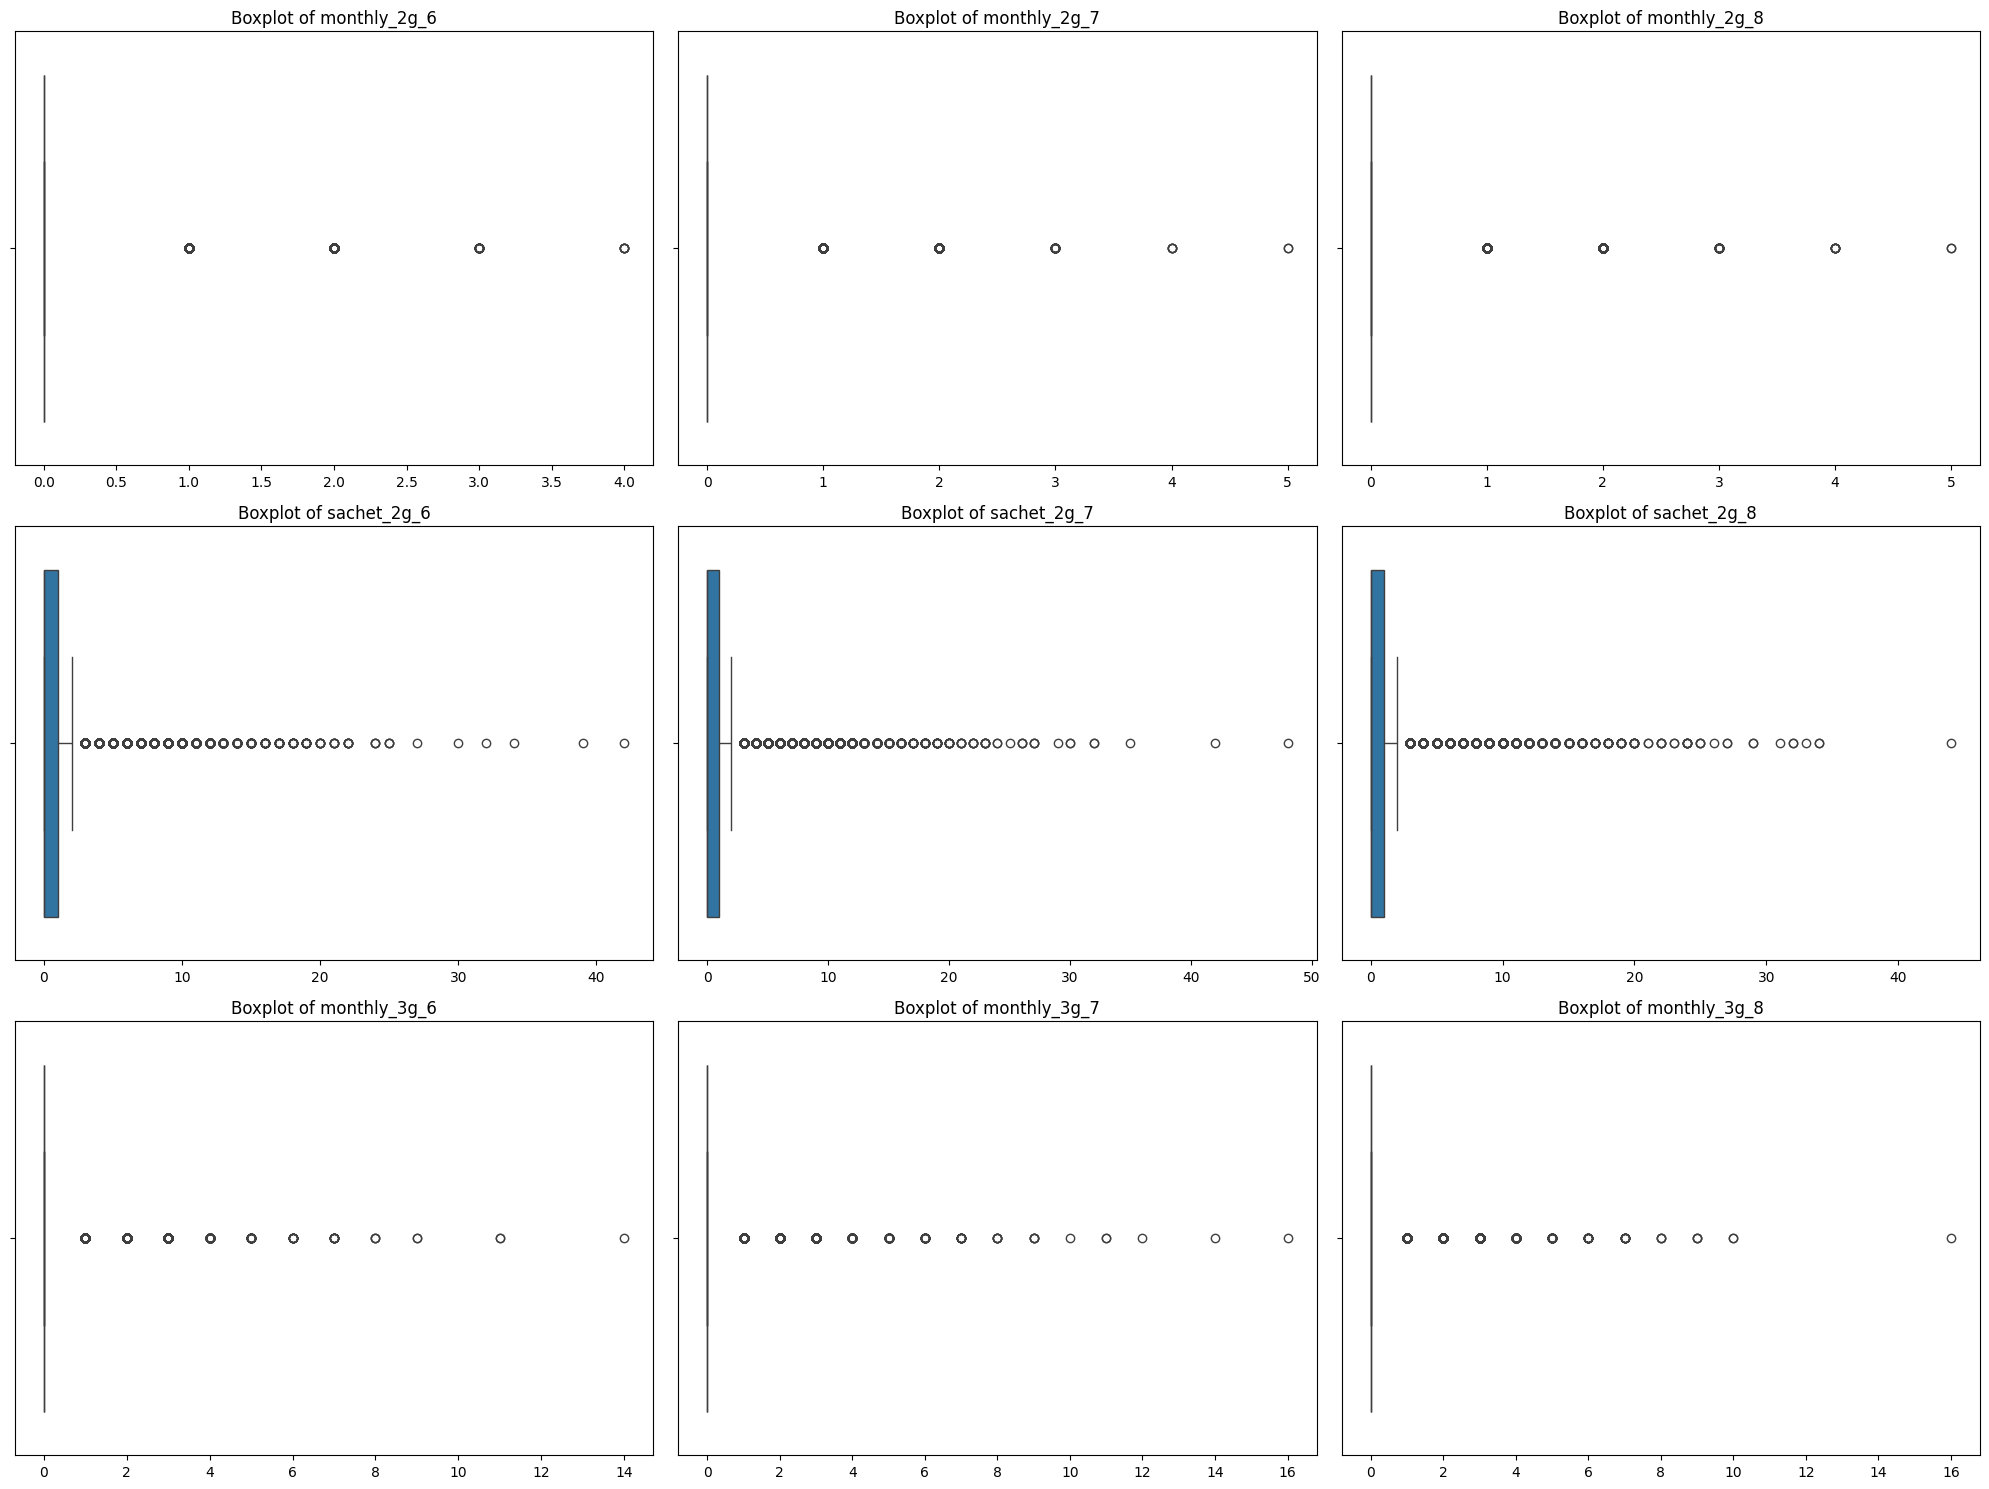

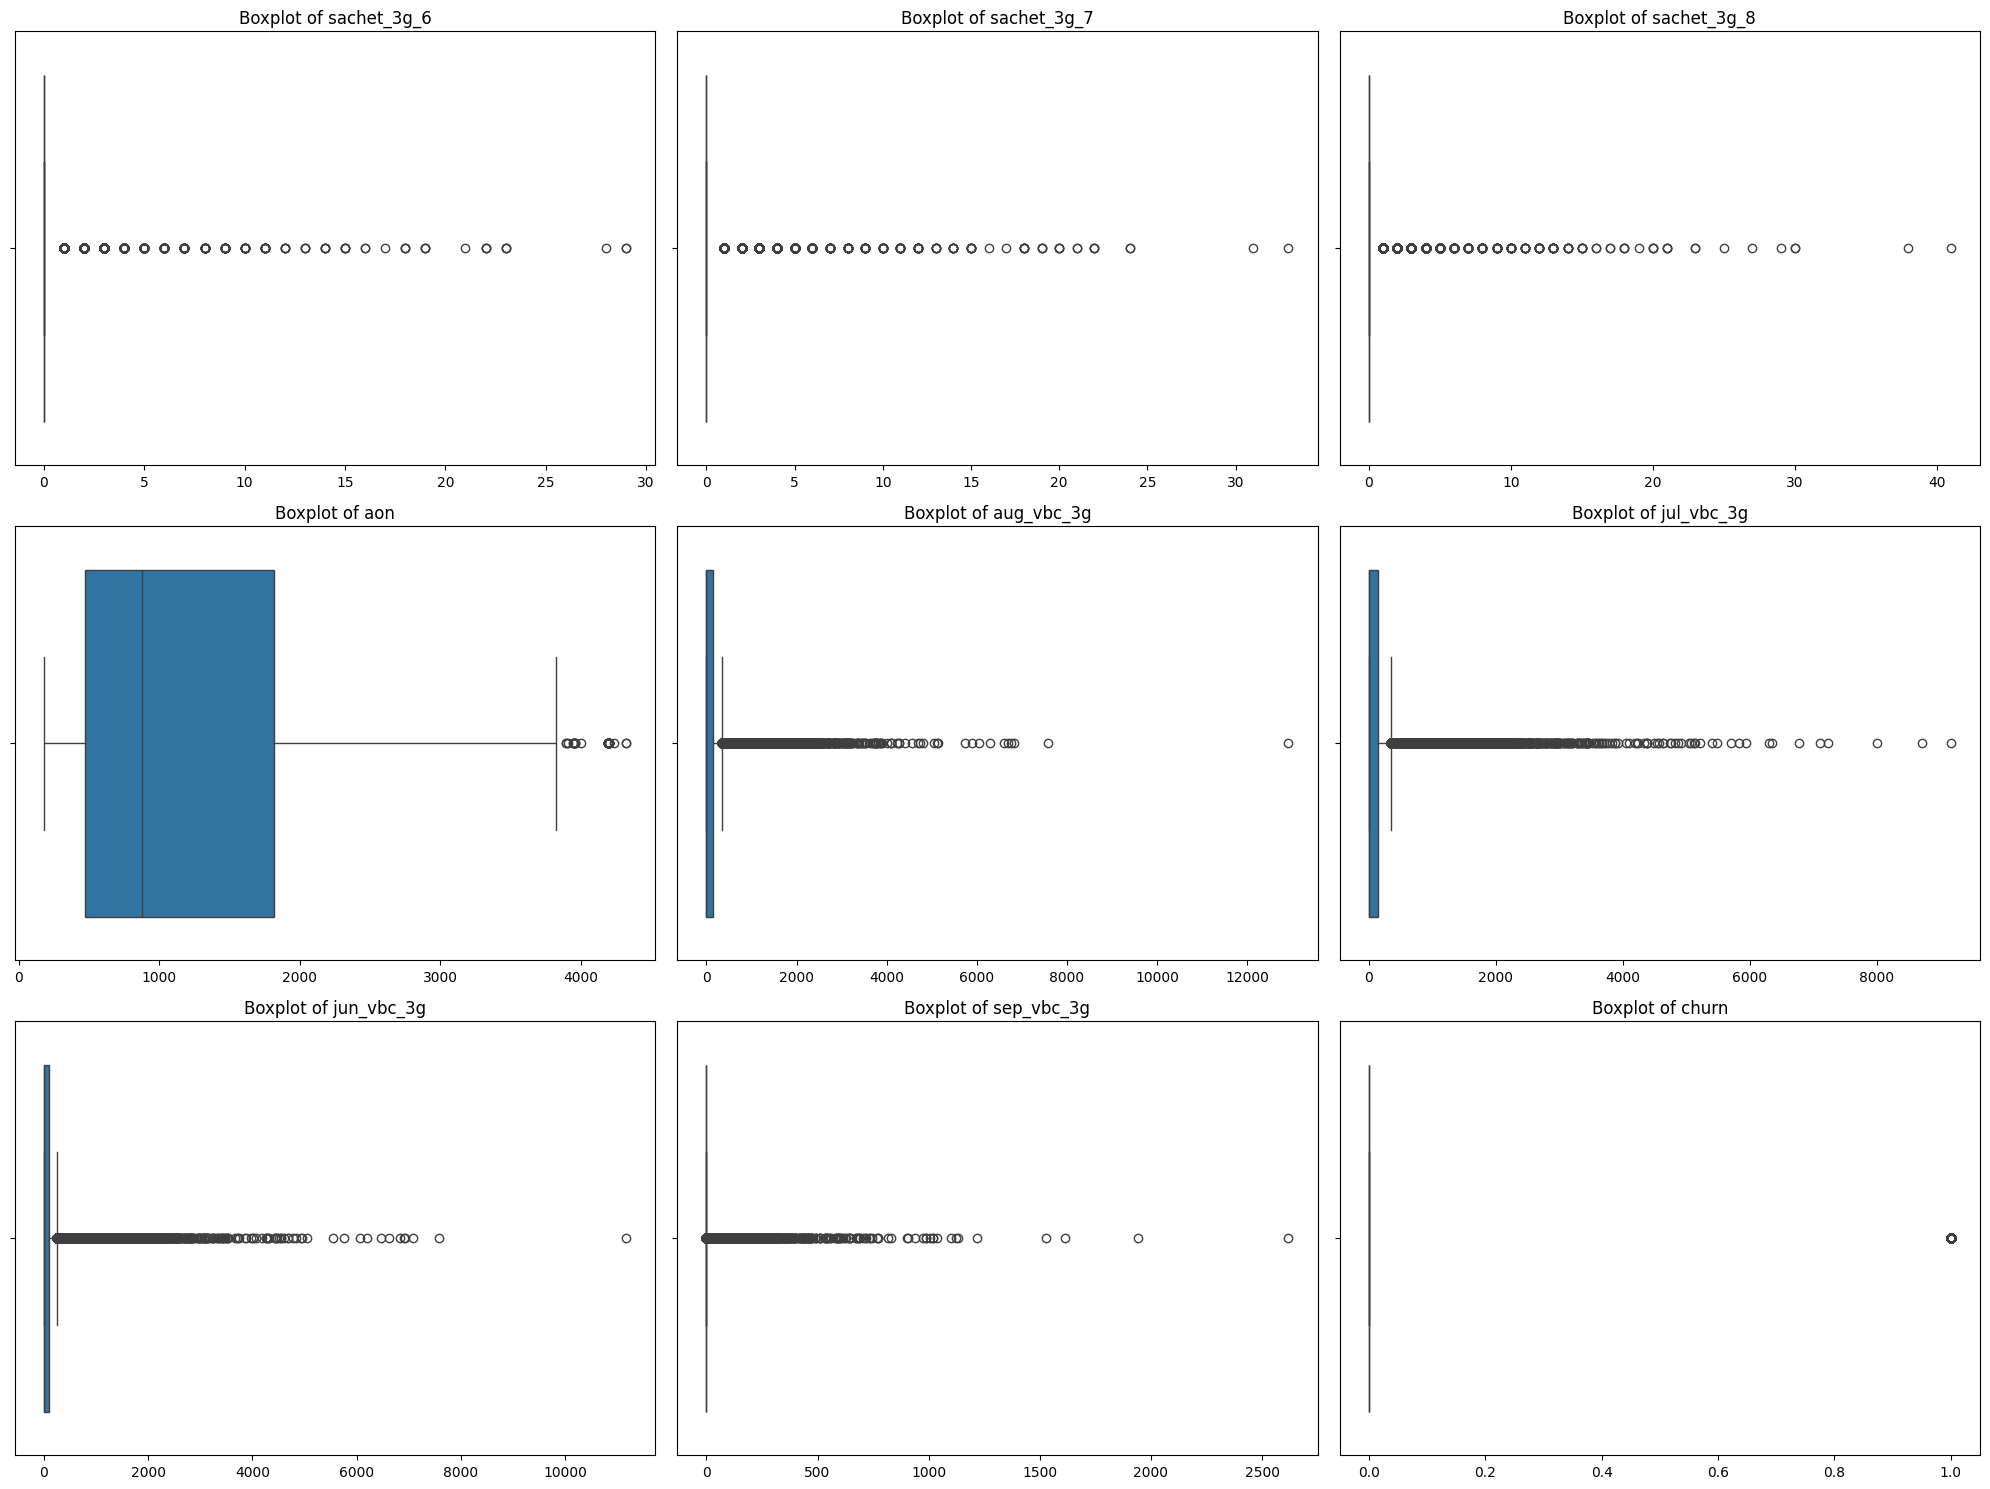

In [38]:
columns_to_analyze = ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'churn']

# Define the number of columns per plot for better readability
columns_per_plot = 9

# Loop through the columns in chunks
for i in range(0, len(columns_to_analyze), columns_per_plot):
    plt.figure(figsize=(20, 15))
    for j, col in enumerate(columns_to_analyze[i:i + columns_per_plot]):
        plt.subplot(3, 3, j + 1)  # Creates a 3x3 grid for 9 columns at a time
        sns.boxplot(data=telecom_1, x=col)
        plt.title(f'Boxplot of {col}')
        plt.xlabel('')

    plt.tight_layout()
    plt.show()


# there are outliers in every column

#### By doing outliers analysis significant rows are lost and also July and August month's data was lost. Hence did not apply the IQR check for removing the outliers . Will deal with it using other methods


In [39]:
# Function to plot distribution plot for months(6,7 and 8) for churn and non churn customers.
def dist_box_plot(df, col1, col2, col3):
    # First set of distribution plots for col1
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
    ax = sns.distplot(df[df['churn'] == 1][col1], bins=40, ax=axes[0], kde=False,
                      color='#003366', hist_kws={"alpha": 1})  # Dark blue for churn
    ax.set_title('Churn', fontweight='bold', size=20)
    ax = sns.distplot(df[df['churn'] == 0][col1], bins=40, ax=axes[1], kde=False,
                      color='#85C1E9', hist_kws={"alpha": 1})  # Light blue for non-churn
    ax.set_title('Non-Churn', fontweight='bold', size=20)

    # Second set of distribution plots for col2
    ax = sns.distplot(df[df['churn'] == 1][col2], bins=40, ax=axes[2], kde=False,
                      color='#003366', hist_kws={"alpha": 1})  # Dark blue for churn
    ax.set_title('Churn', fontweight='bold', size=20)
    ax = sns.distplot(df[df['churn'] == 0][col2], bins=40, ax=axes[3], kde=False,
                      color='#85C1E9', hist_kws={"alpha": 1})  # Light blue for non-churn
    ax.set_title('Non-Churn', fontweight='bold', size=20)

    # Box plots for col1 and col2
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
    ax = sns.boxplot(x='churn', y=col1, data=df, ax=axes[0])
    ax = sns.stripplot(x='churn', y=col1, data=df, jitter=True, edgecolor="gray", ax=axes[0])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col1, fontweight='bold', size=20)

    ax = sns.boxplot(x='churn', y=col2, data=df, ax=axes[1])
    ax = sns.stripplot(x='churn', y=col2, data=df, jitter=True, edgecolor="gray", ax=axes[1])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col2, fontweight='bold', size=20)

    # Third set of distribution plots for col3
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
    ax = sns.distplot(df[df['churn'] == 1][col3], bins=40, ax=axes[0], kde=False,
                      color='#003366', hist_kws={"alpha": 1})  # Dark blue for churn
    ax.set_title('Churn', fontweight='bold', size=20)
    ax = sns.distplot(df[df['churn'] == 0][col3], bins=40, ax=axes[1], kde=False,
                      color='#85C1E9', hist_kws={"alpha": 1})  # Light blue for non-churn
    ax.set_title('Non-Churn', fontweight='bold', size=20)

    ax = sns.boxplot(x='churn', y=col3, data=df, ax=axes[2])
    ax = sns.stripplot(x='churn', y=col3, data=df, jitter=True, edgecolor="gray", ax=axes[2])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col3, fontweight='bold', size=20)

    plt.show()


## arpu (Average Revenue per user)

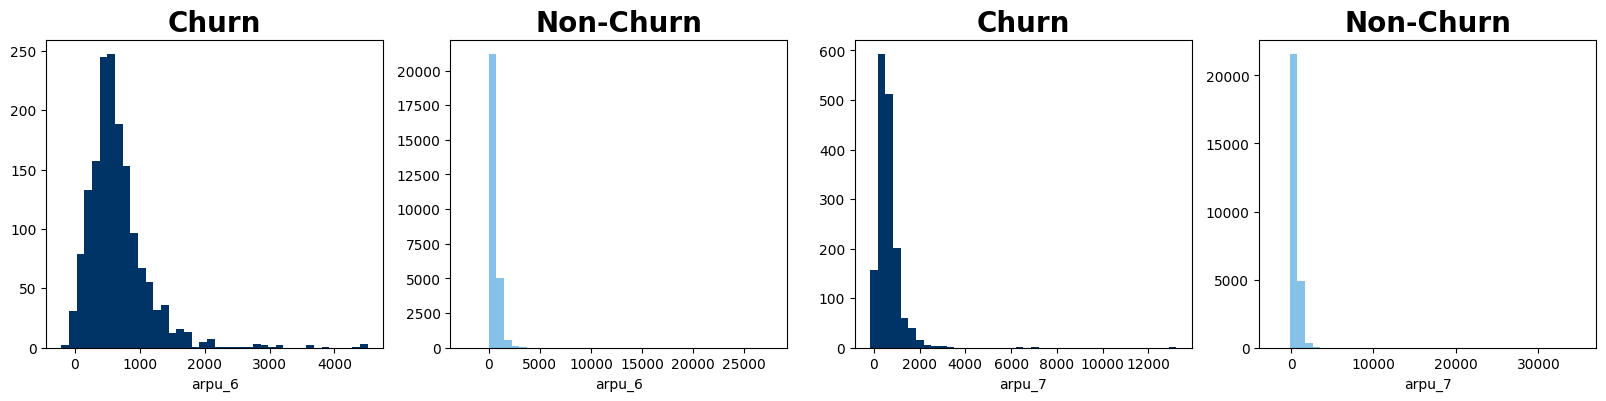

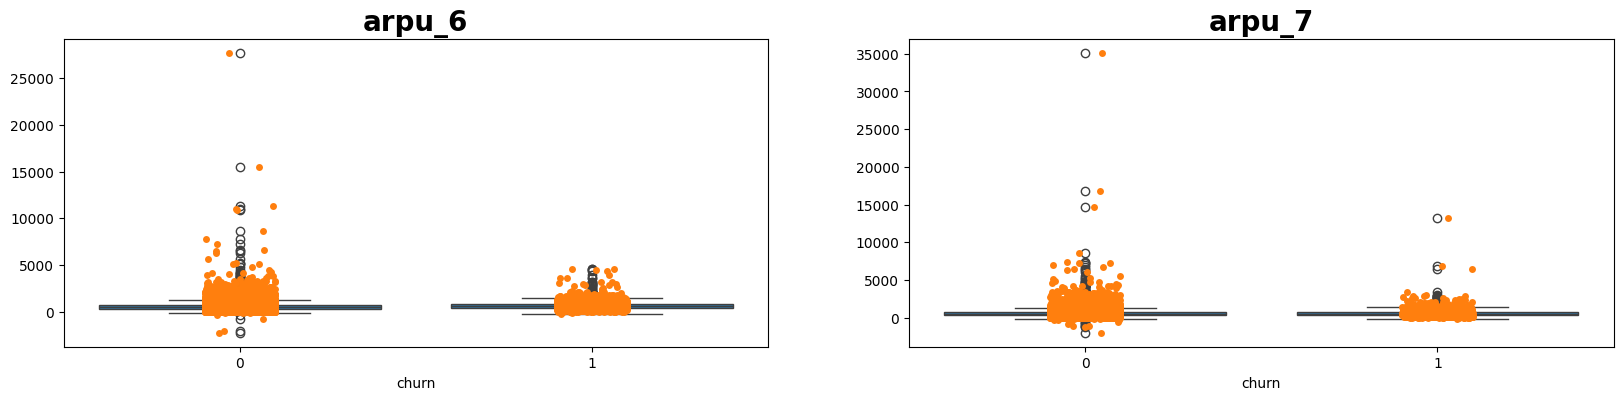

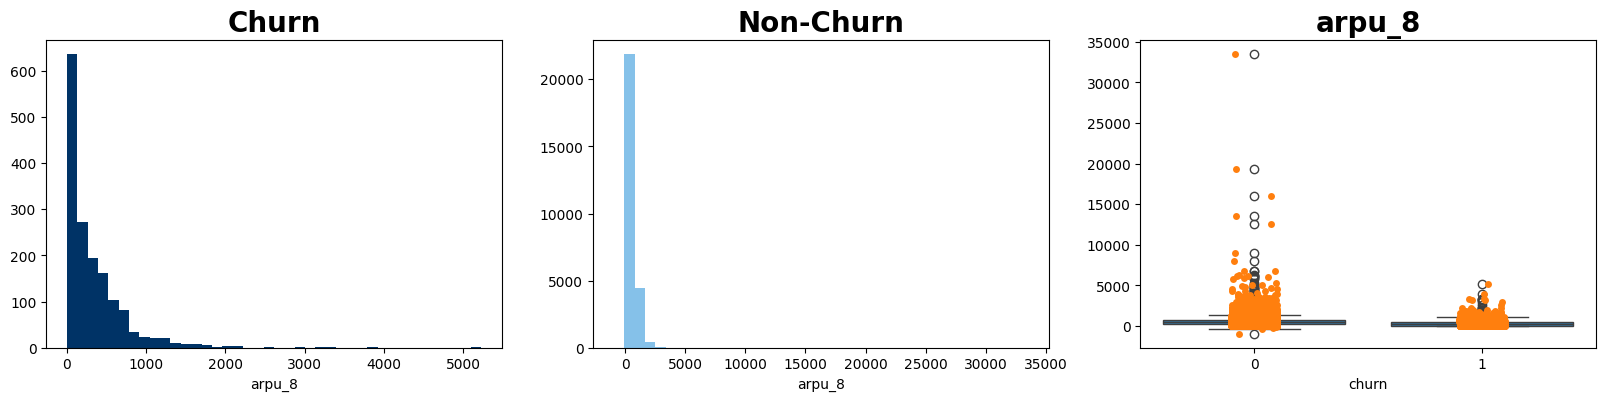

In [40]:
dist_box_plot(telecom_1,'arpu_6','arpu_7','arpu_8')

` As we can see average revenue per user is decreasing for churn customers in 8th month.Also there are lots of outlier exists in revenue as some customers might using higher data and recharging frequently.`

### onnnet_mou (Minutes of usage for all kind of calls within the same operator network)

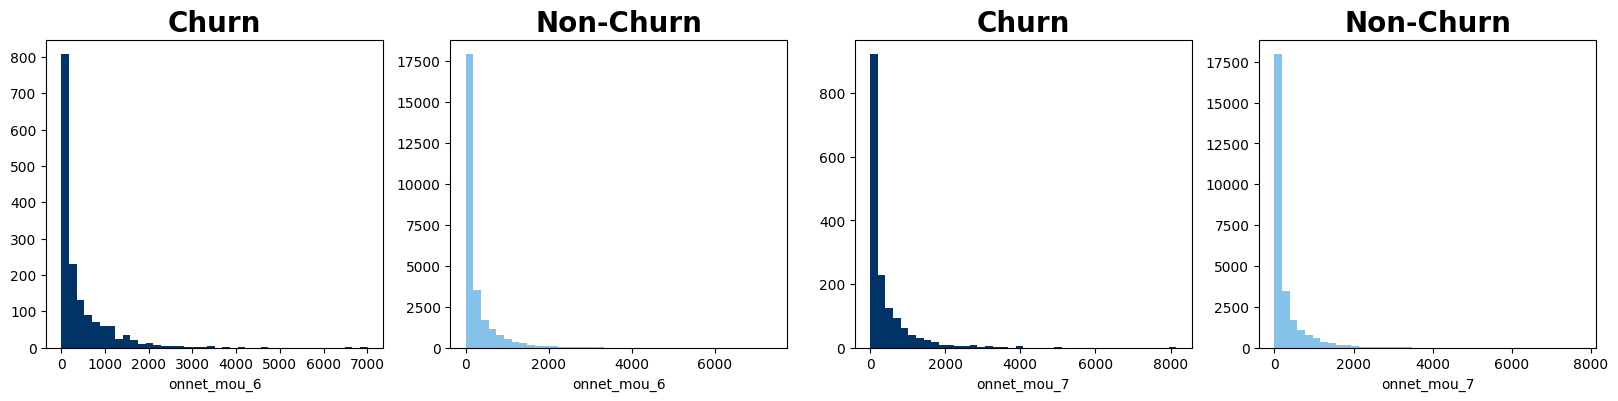

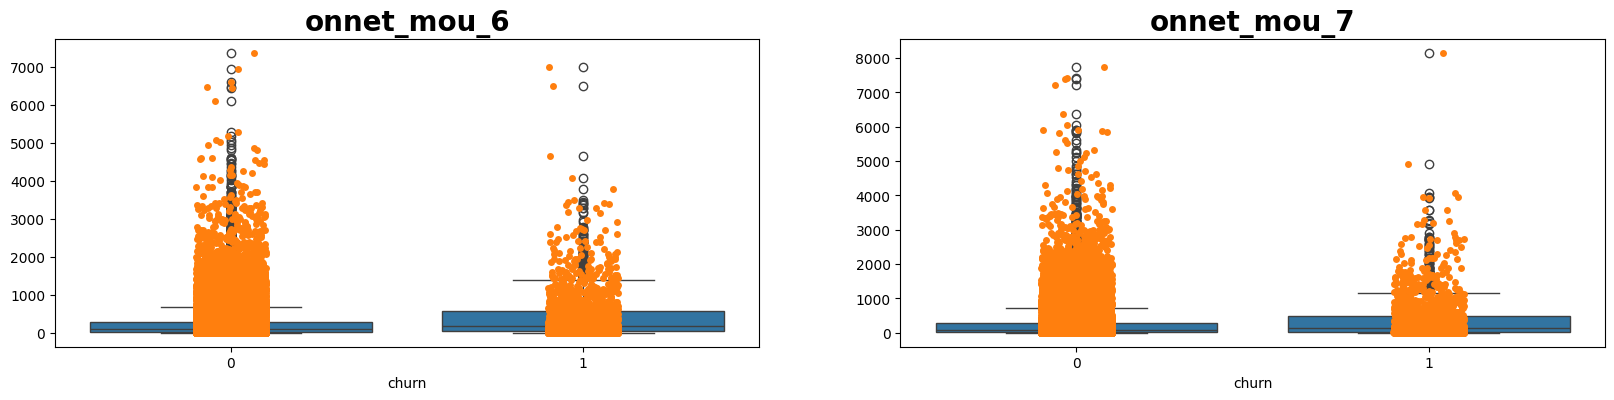

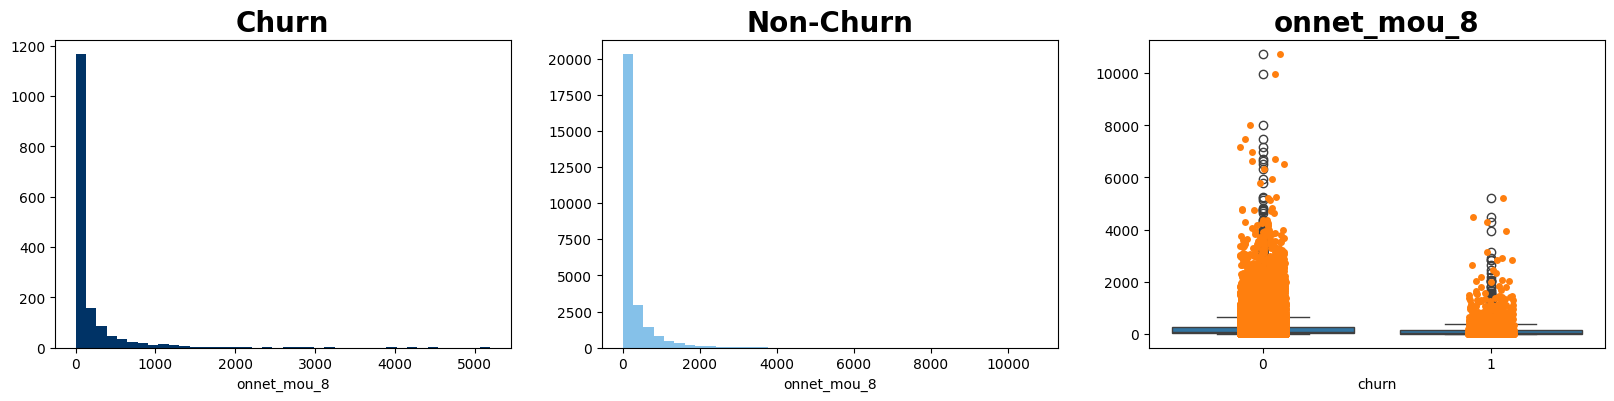

In [41]:
dist_box_plot(telecom_1,'onnet_mou_6','onnet_mou_7','onnet_mou_8')

`we can clearly see that Minutes of usage for all kind of calls within the same operator network is decreasing for churn customers.Also it looks like some of the customers are having high minutes of usage( outlier present)`

### offnet_mou (Minutes of usage for All kind of calls outside the operator T network)

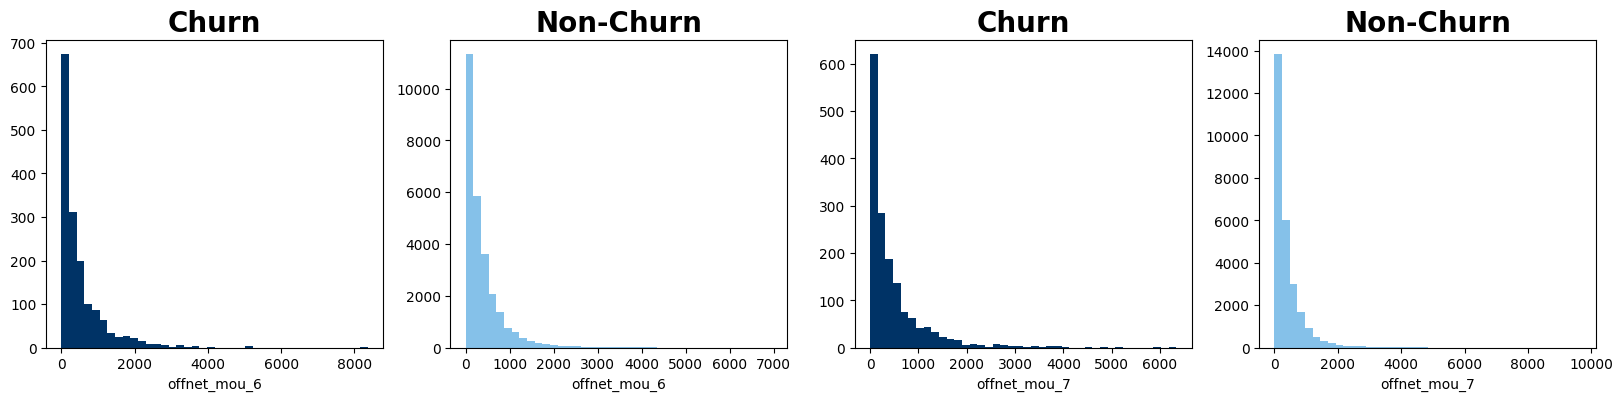

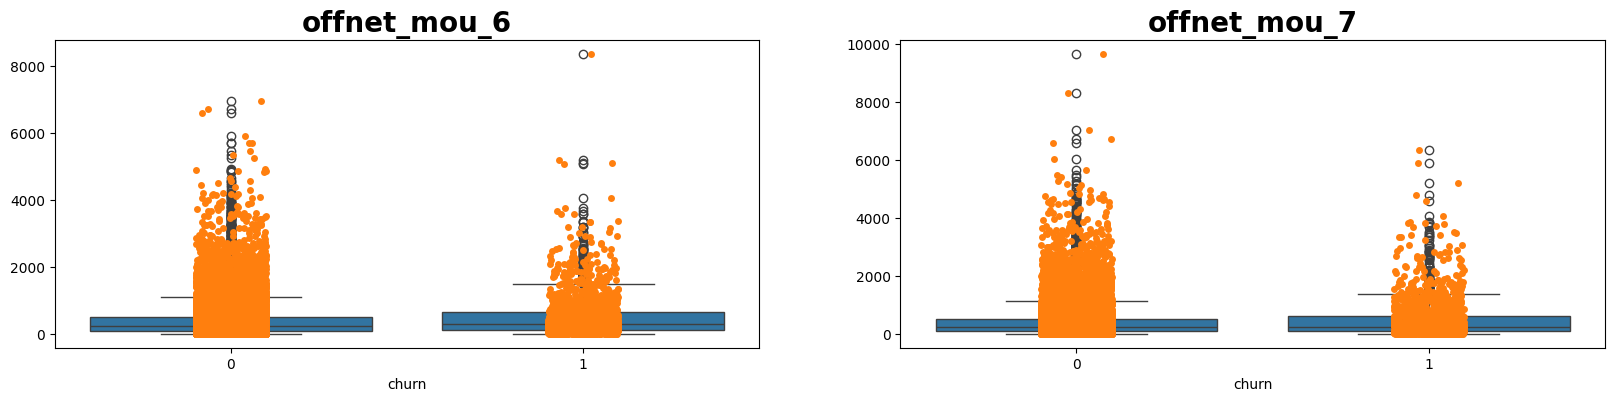

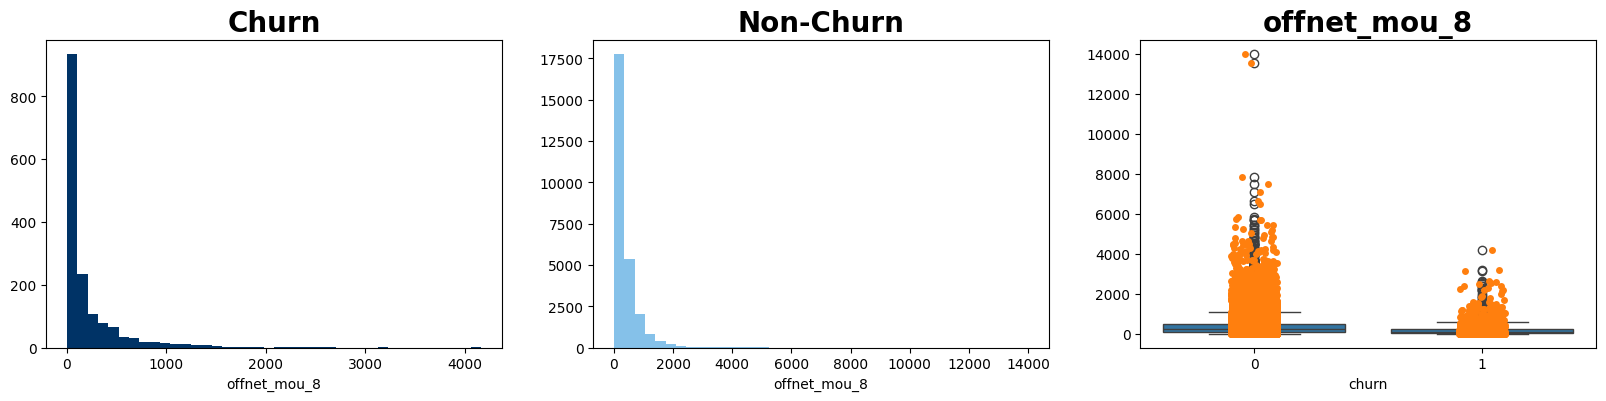

In [42]:
dist_box_plot(telecom_1,'offnet_mou_6','offnet_mou_7','offnet_mou_8')

`Similalry Offnet minutes of usage is also decreasing for churn customers in 8th month.As compared to 6th and 7th month , in 8th month there is no high minutes of usage as the graph is condensed.`

### roam_ic_mou (Minutes of usage on roaming incoming calls)

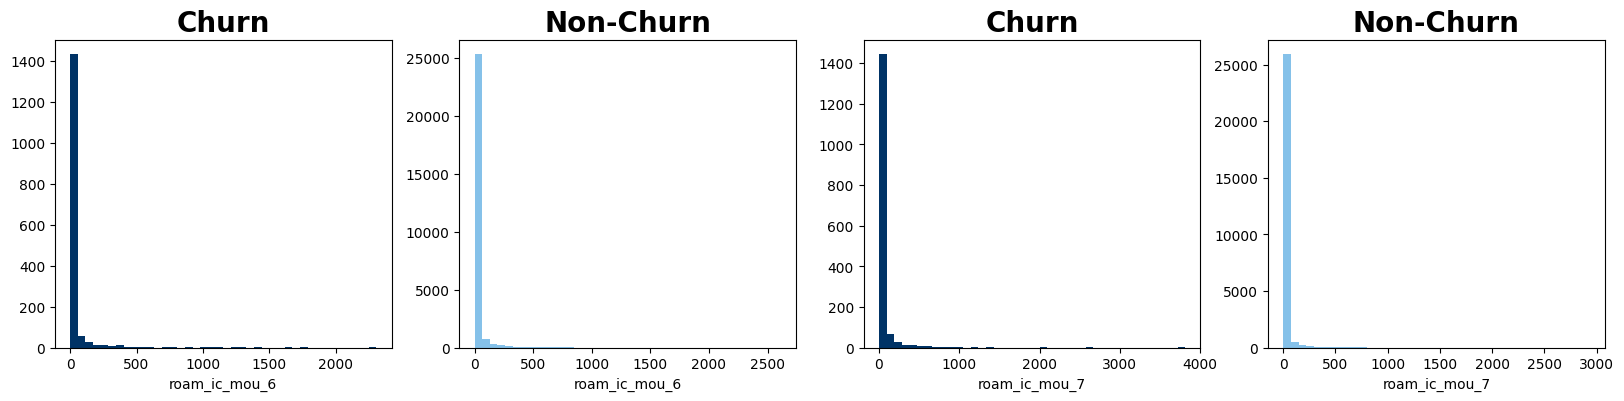

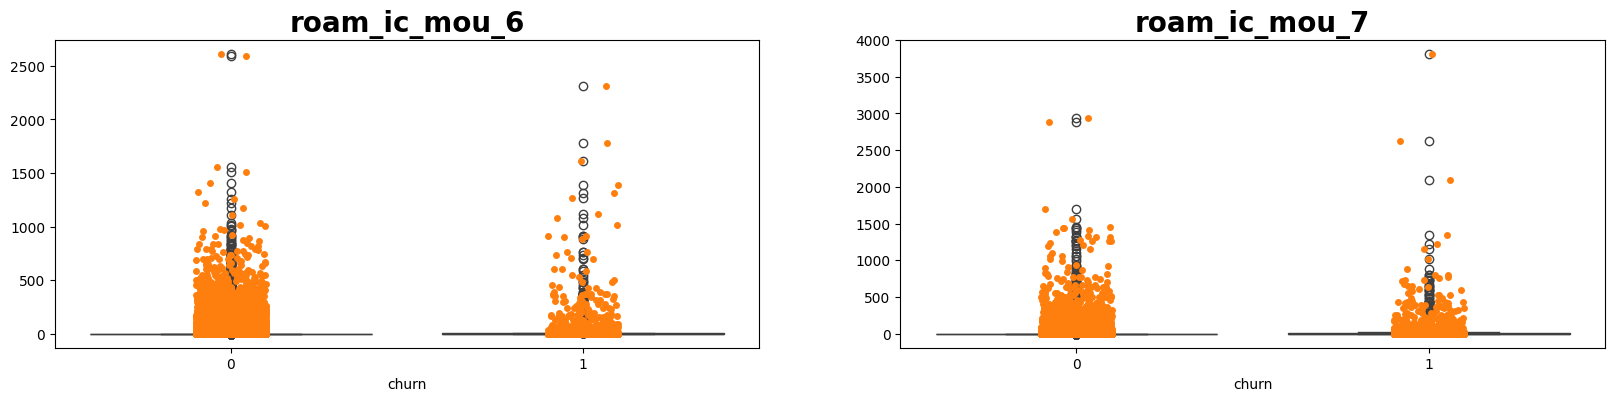

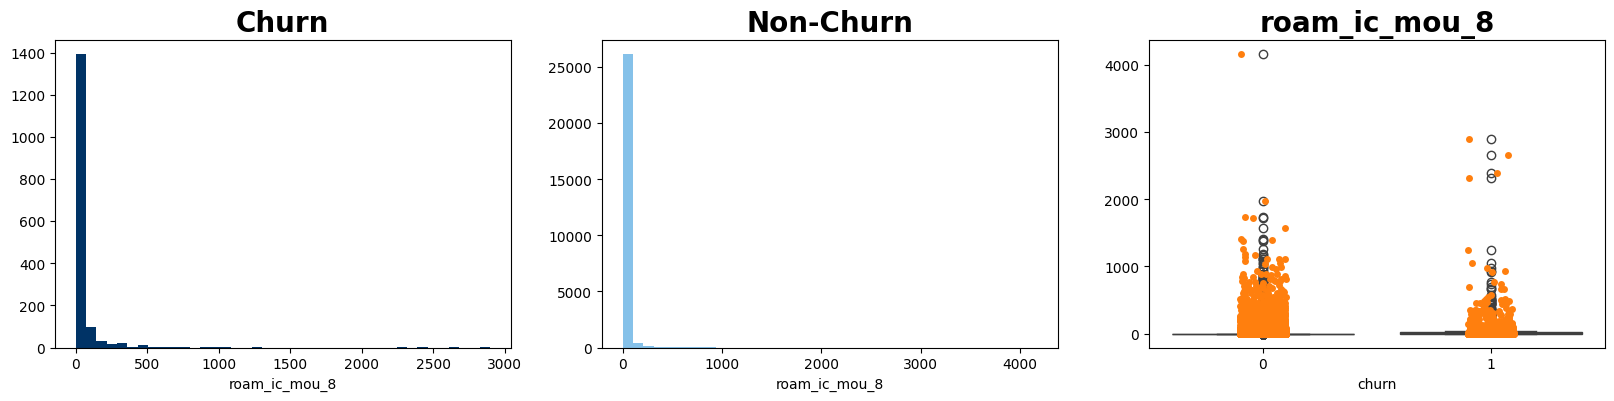

In [43]:
dist_box_plot(telecom_1,'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8')

`As compard to other parameters it looks like customers uses less services during roaming. Also graph for 8th month (churn customers) shows slight decrease in mou.`

### roam_og_mou (Minutes of usage within same operator on roaming outgoing calls)

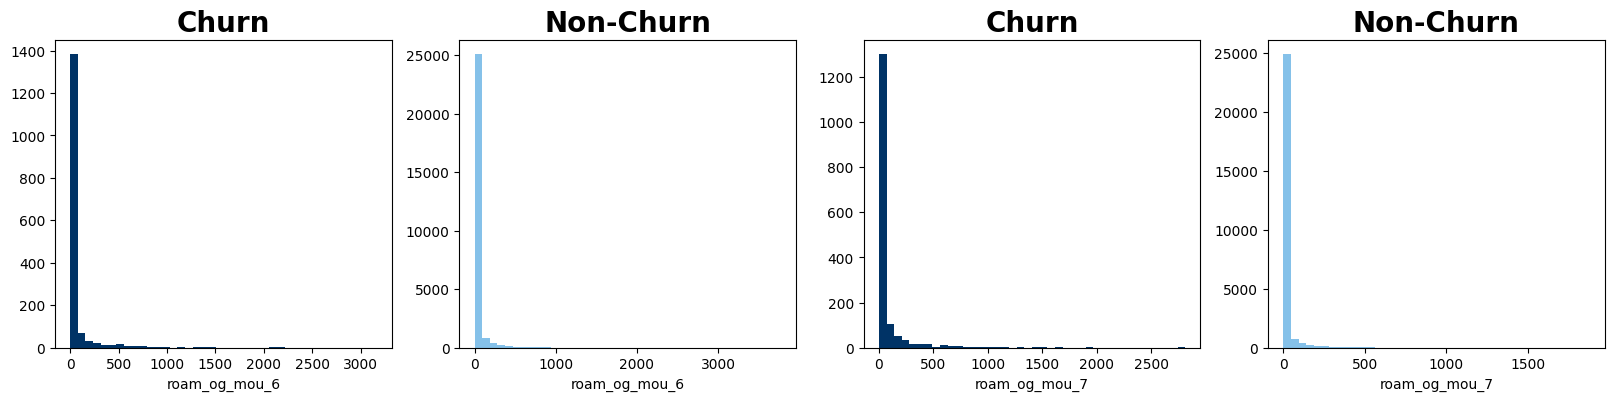

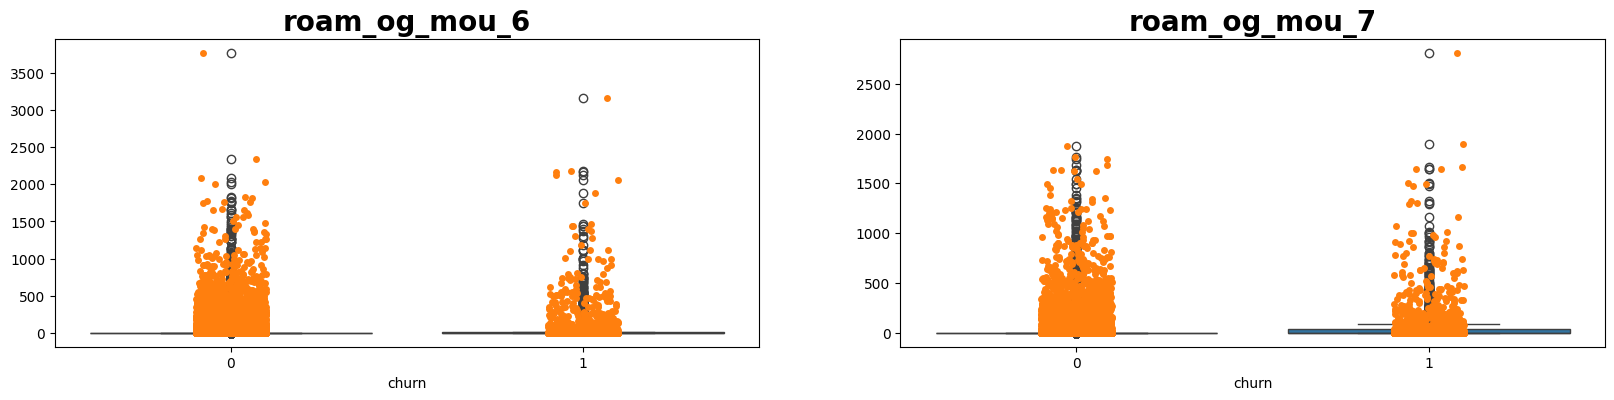

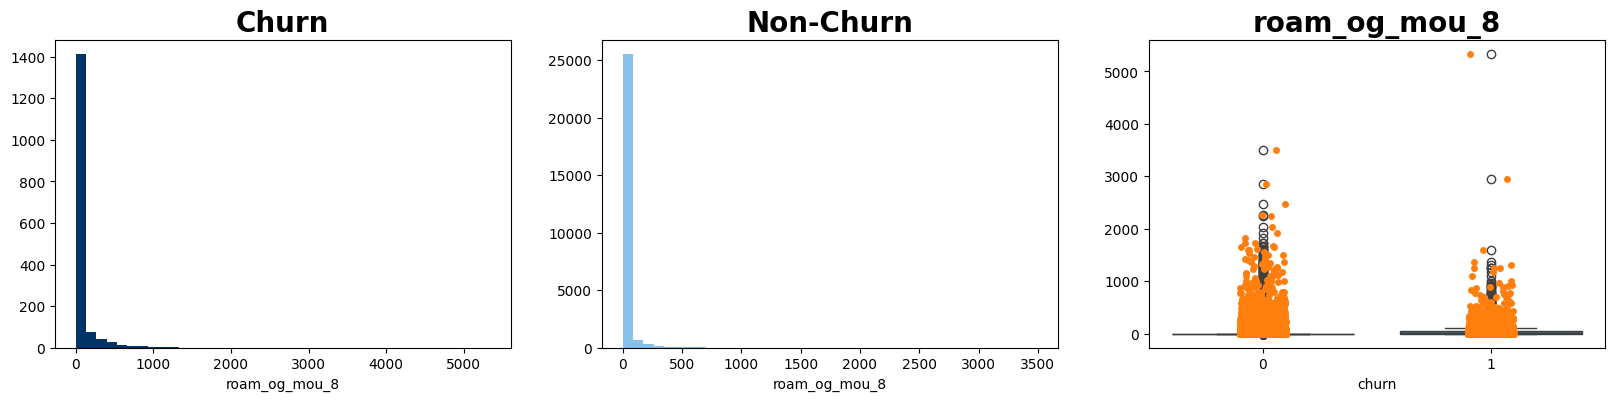

In [44]:
dist_box_plot(telecom_1, 'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8')

`As compard to other parameters it looks like customers uses less services during roaming. Also graph for 8th month (churn customers) shows slight decrease in mou.`

### loc_og_t2c_mou_ (Minutes of usage within same operator on local outgoing calls Operator T to it’s own call center)

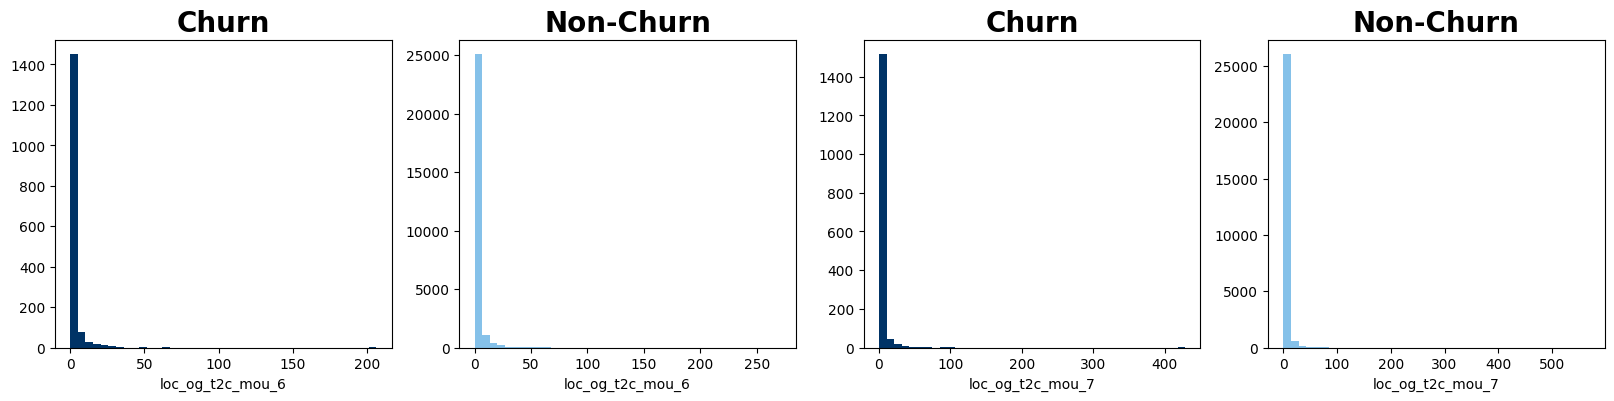

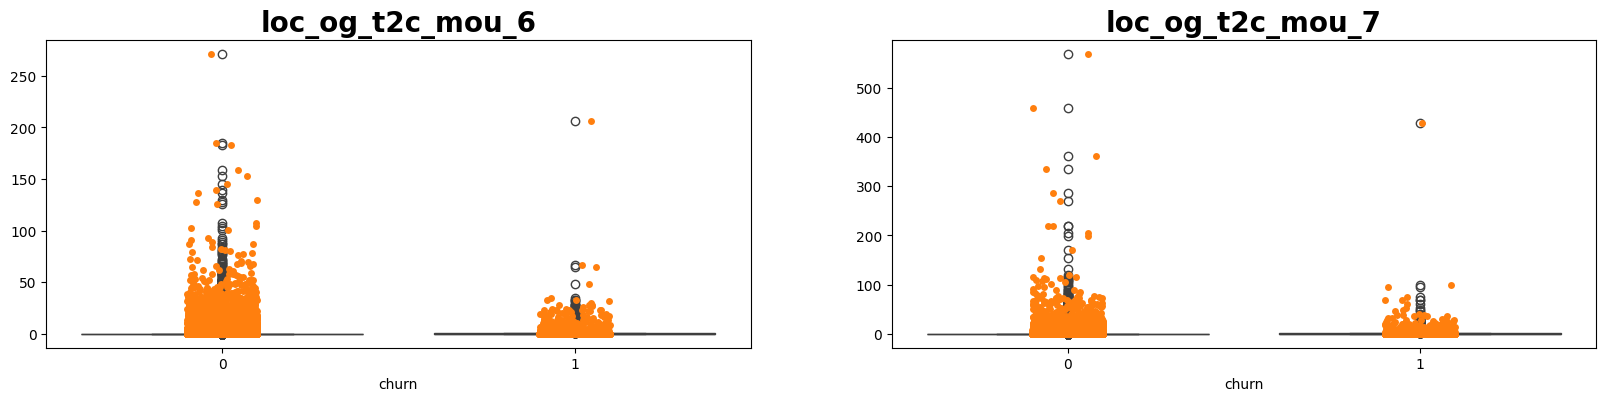

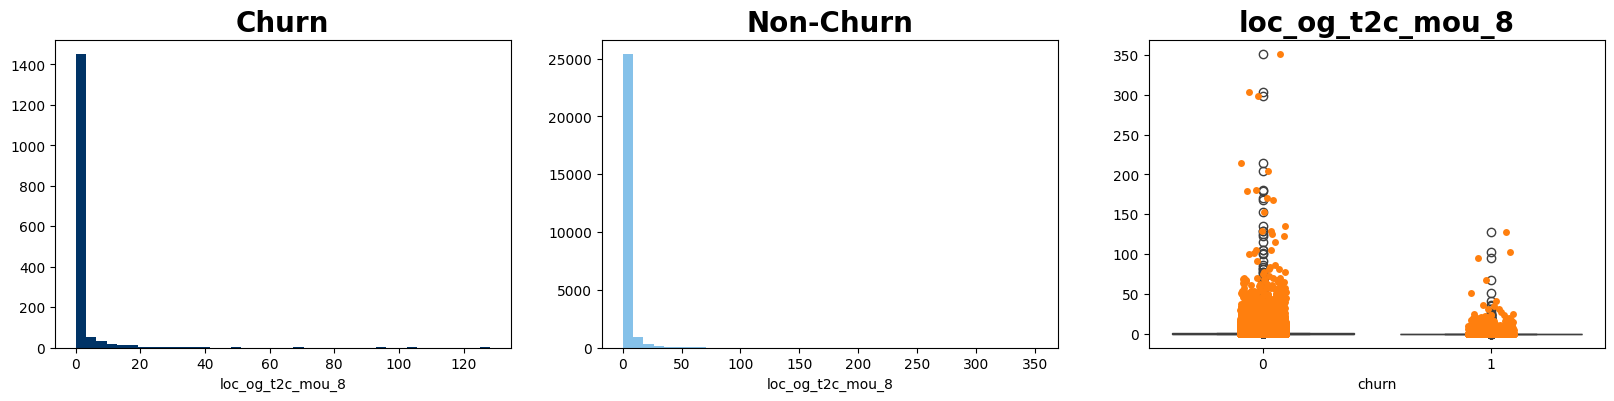

In [45]:
dist_box_plot(telecom_1, 'loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8')

`As compard to other parameters it looks like customers uses less services during talking to their operator.`

### loc_og_mou  (Minutes of usage within same operator on local outgoing calls)

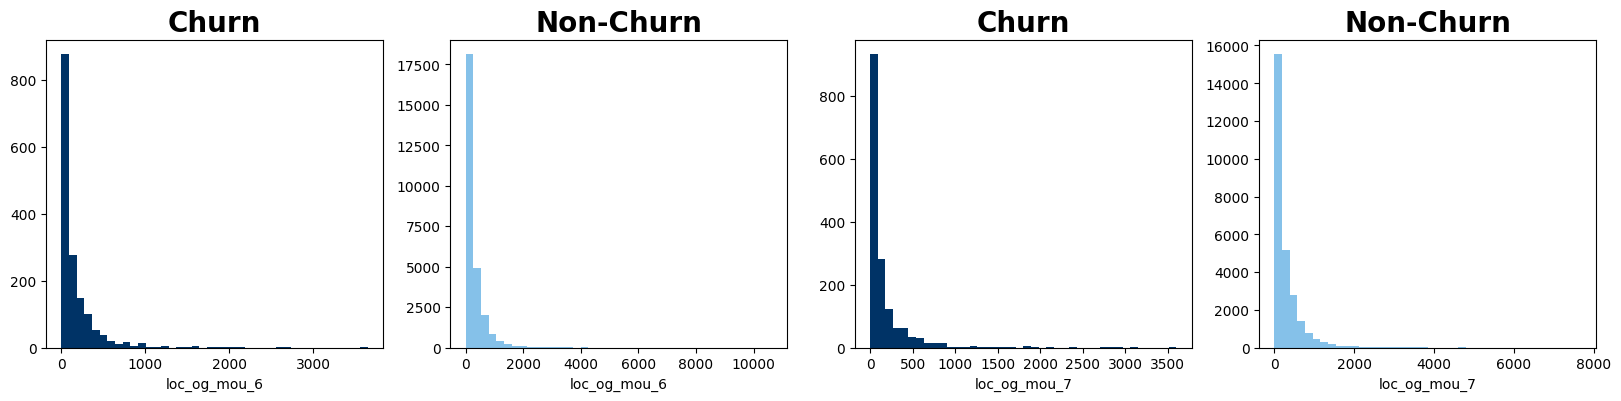

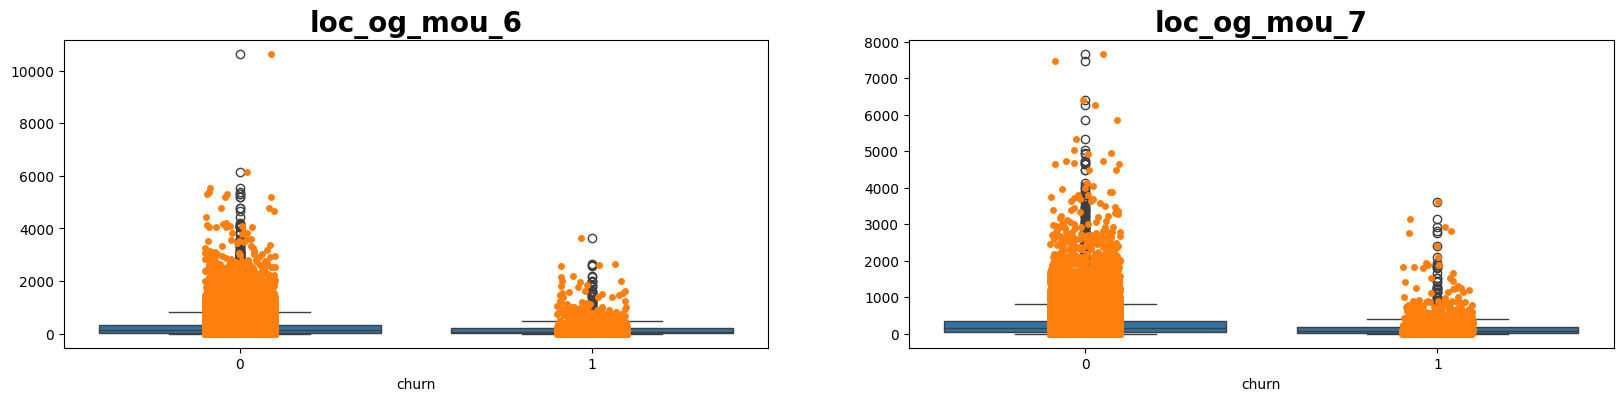

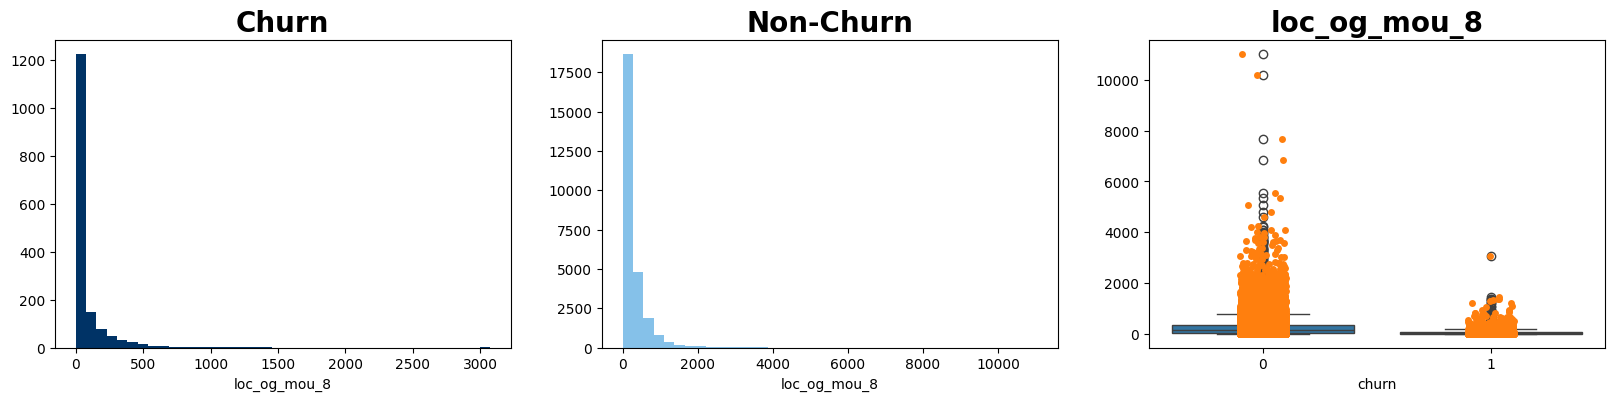

In [46]:
dist_box_plot(telecom_1, 'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8')

`Similalry minutes of usage for local out going calls is also decreasing for churn customers in 8th month.As compared to 6th and 7th month , in 8th month there is no high minutes of usage as the graph is condensed.`

### std_og_t2f_mou  (Minutes of usage within same operator on local STD calls Operator T to fixed lines of T)

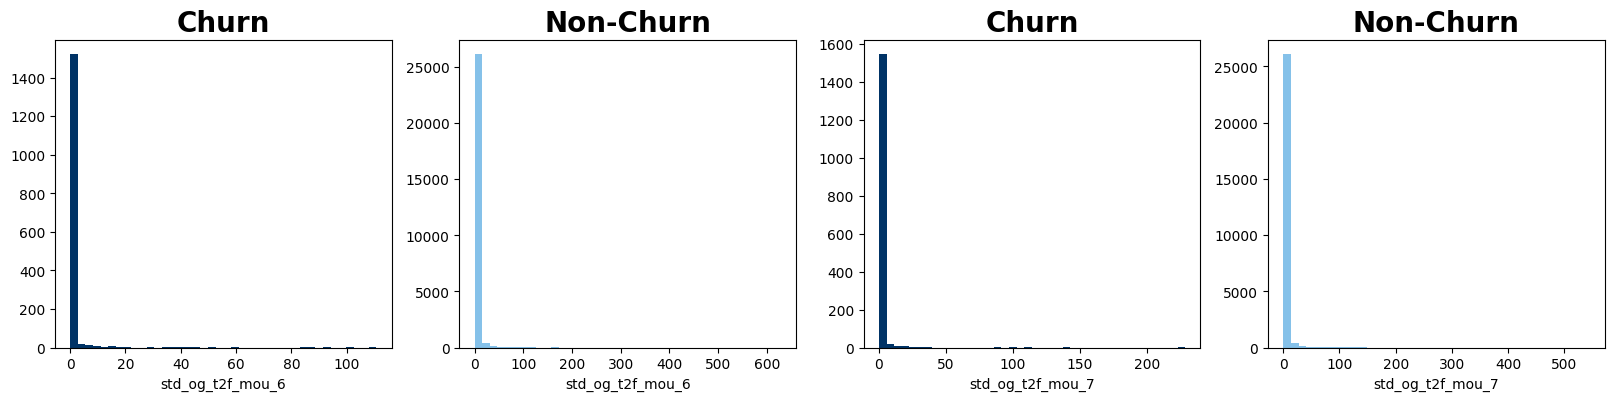

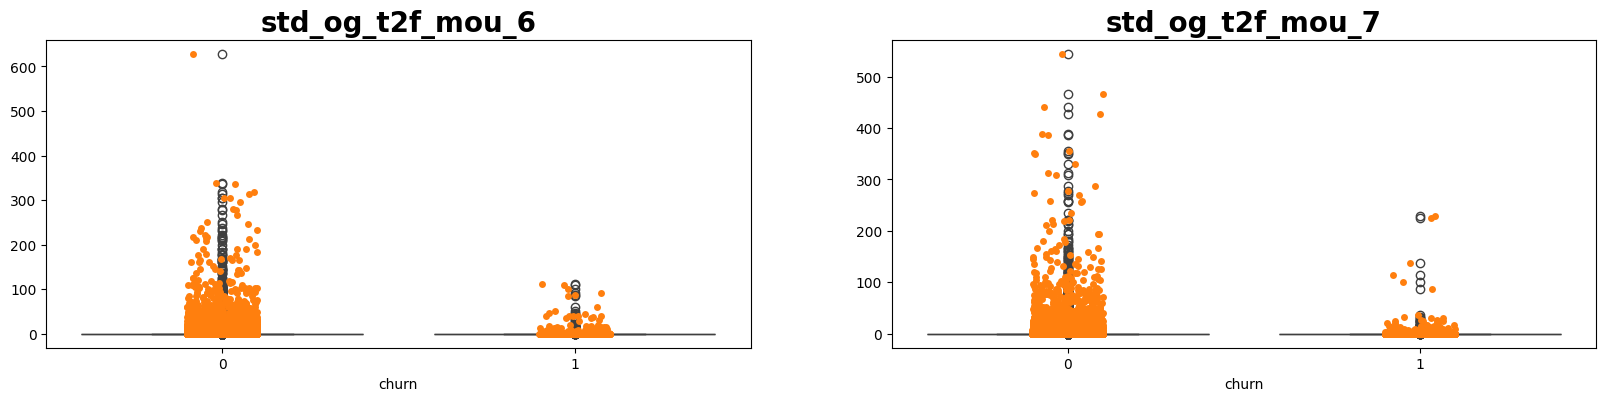

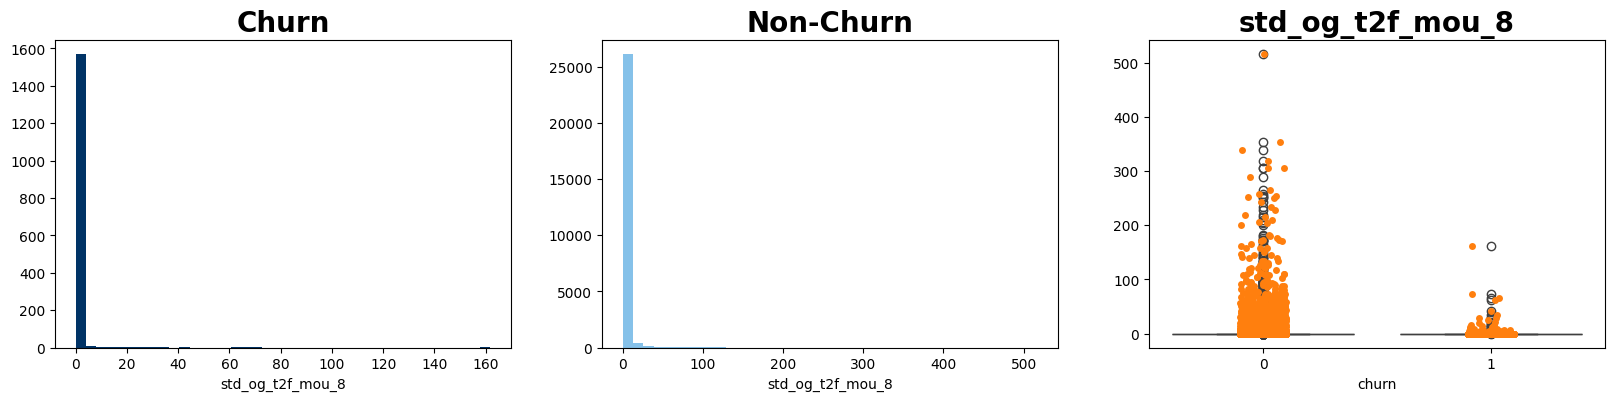

In [47]:
dist_box_plot(telecom_1, 'std_og_t2f_mou_6'	,'std_og_t2f_mou_7','std_og_t2f_mou_8')

`Most customers do not use STD calls services hence  Minutes of usage for STD outgoing calls does not show trend for churn and non-churn.`

### std_og_mou  (Minutes of usage within same operator on local STD calls)

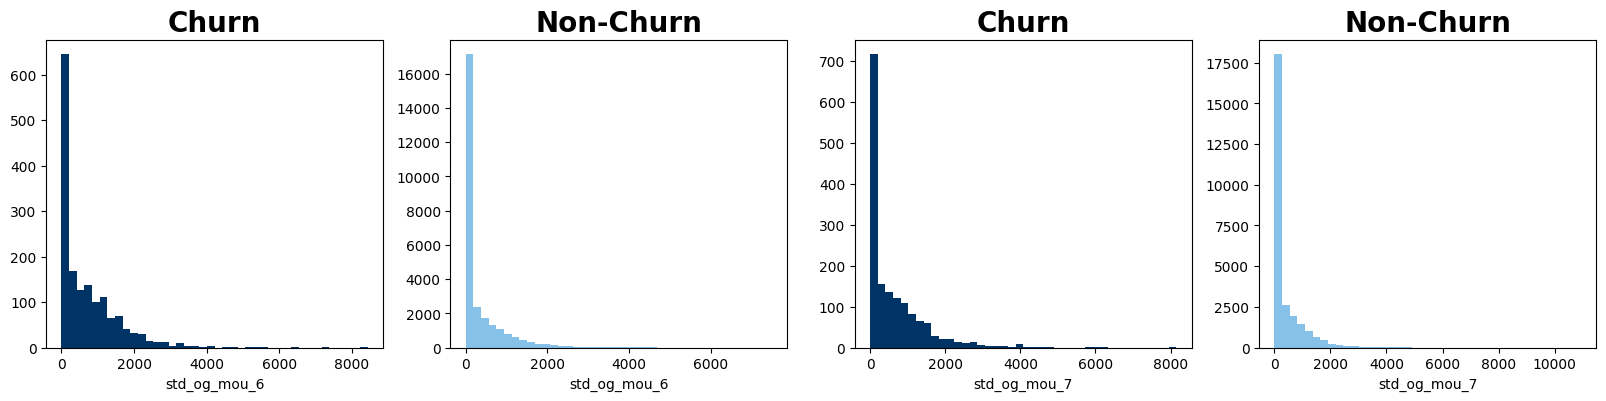

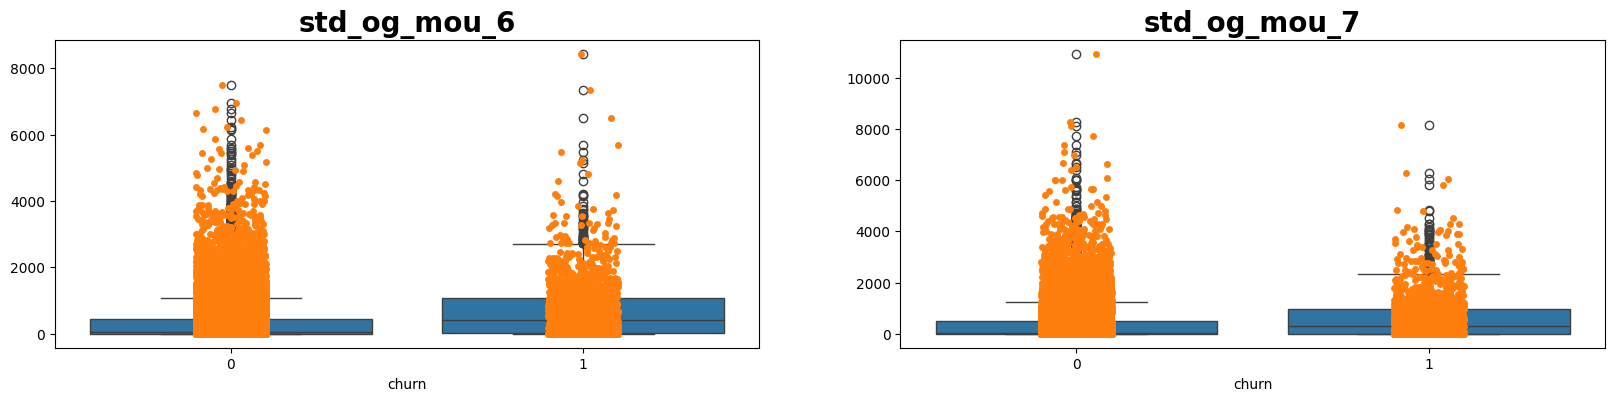

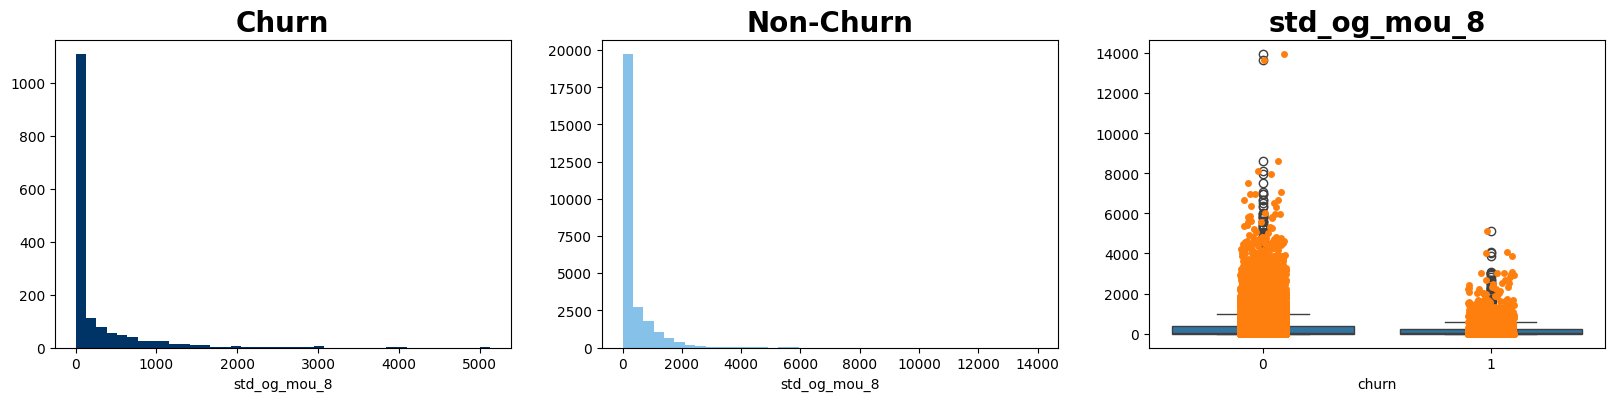

In [48]:
dist_box_plot(telecom_1,'std_og_mou_6'	, 'std_og_mou_7', 'std_og_mou_8')

` Significant decrease in minutes of usage within same operator on STD outgoing calls for the churn customers in 8th month .`

### isd_og_mou  (Minutes of usage  on ISD outgoing calls)

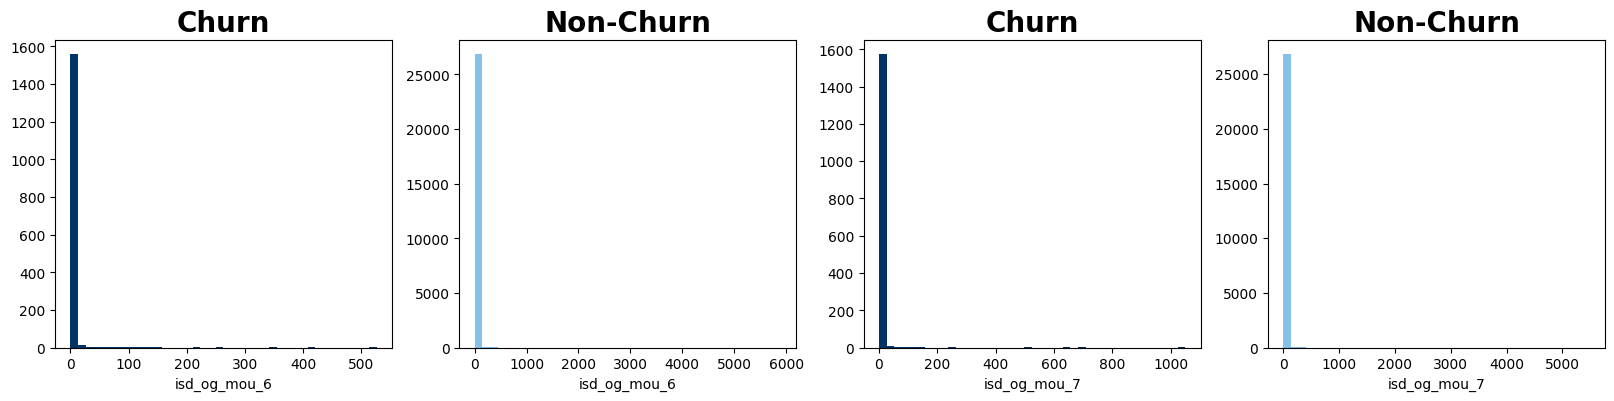

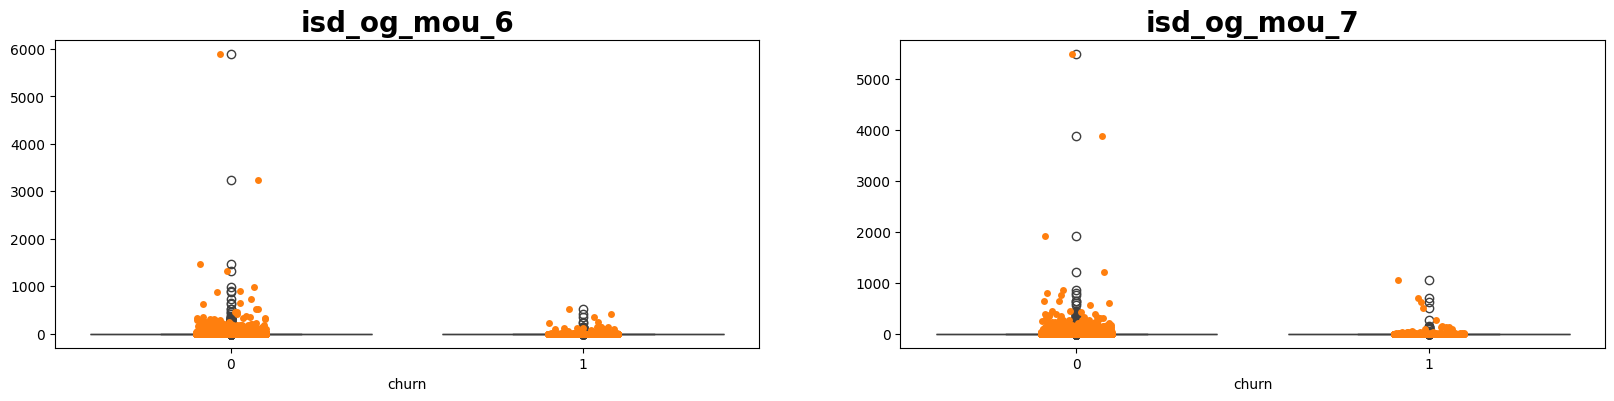

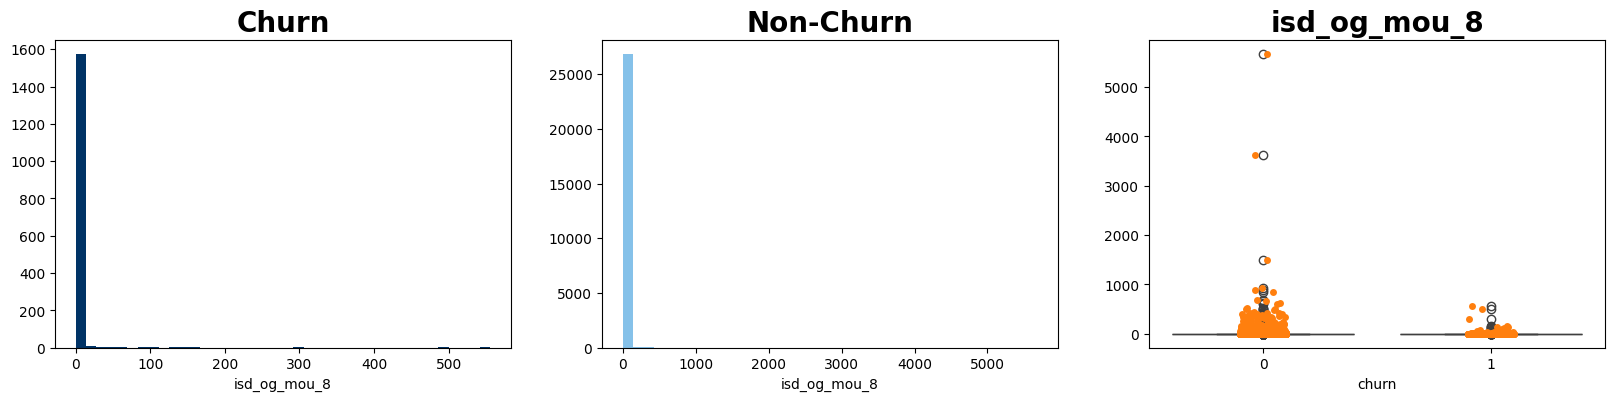

In [49]:
dist_box_plot(telecom_1,'isd_og_mou_6','isd_og_mou_7','isd_og_mou_8')

`ISD outgoing calls has been decreased for 8th month churn customers.`

### spl_og_mou  (Minutes of usage  on Special outgoing calls)

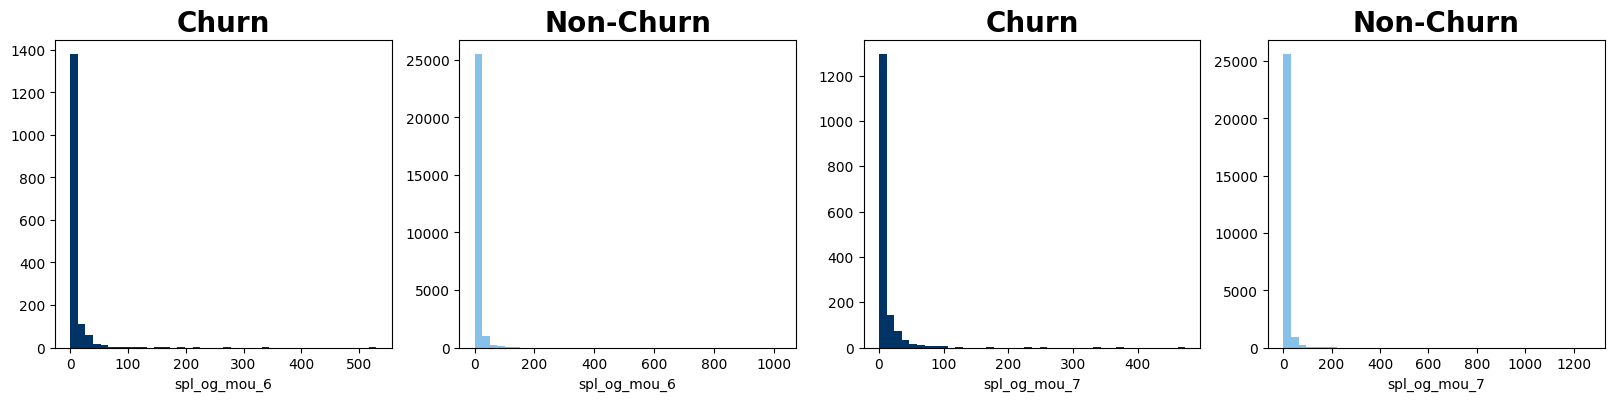

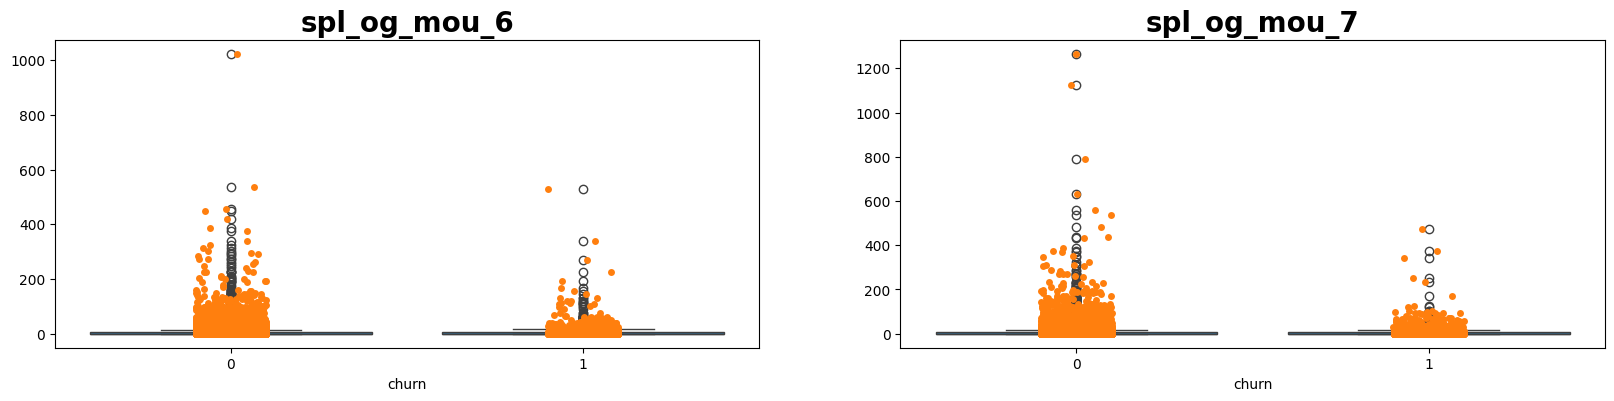

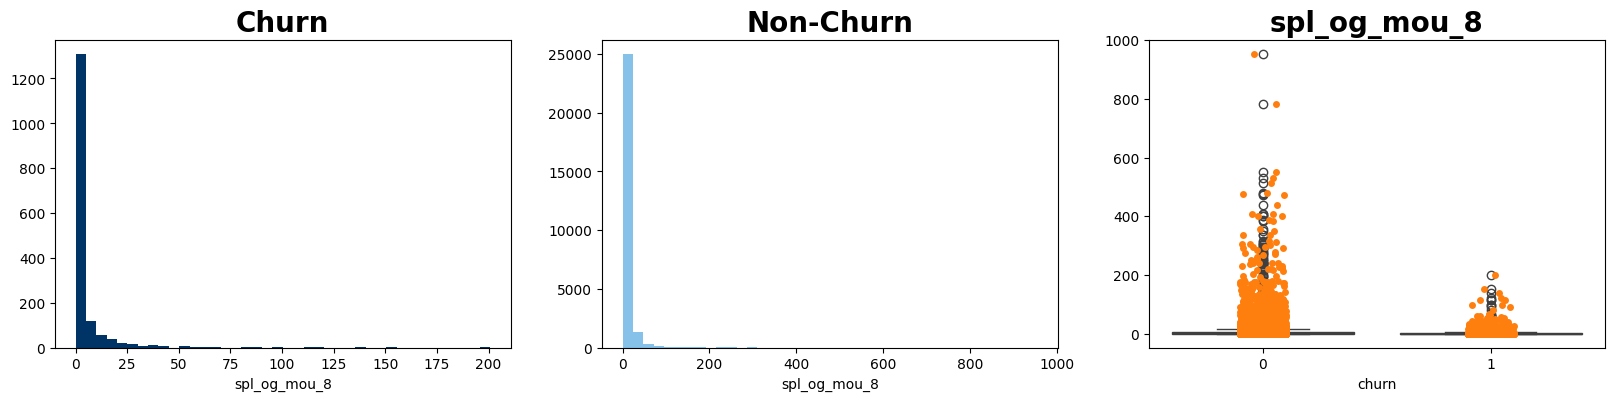

In [50]:
dist_box_plot(telecom_1,'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8')

` Less Minutes of usage on Special calls for churn customers in 8th month. There are some customers who are having high minutes of usage.`

### spl_og_mou  (Minutes of usage  on other calls)

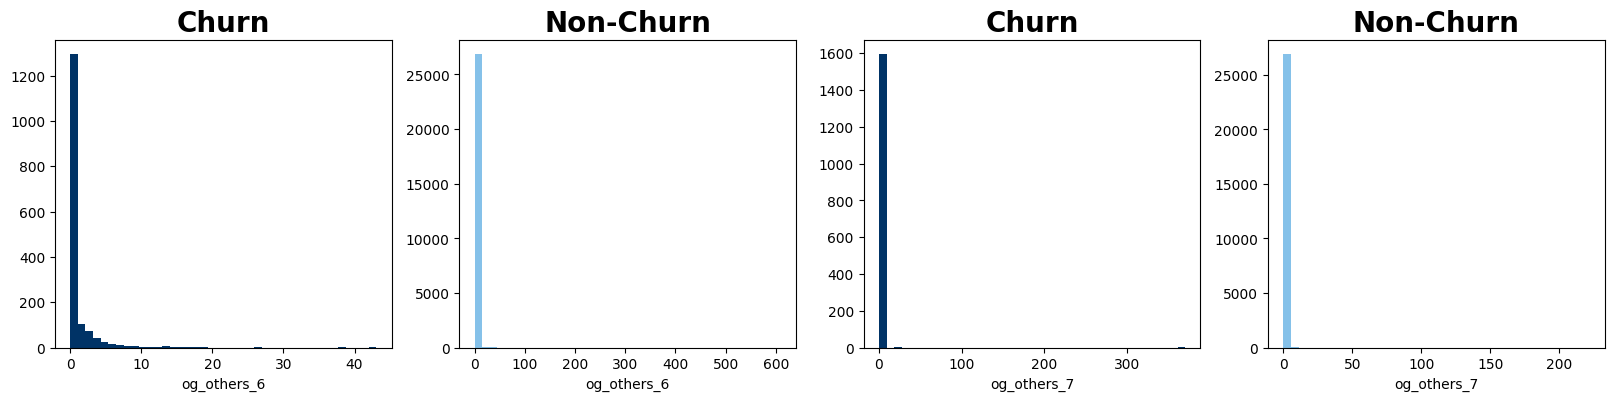

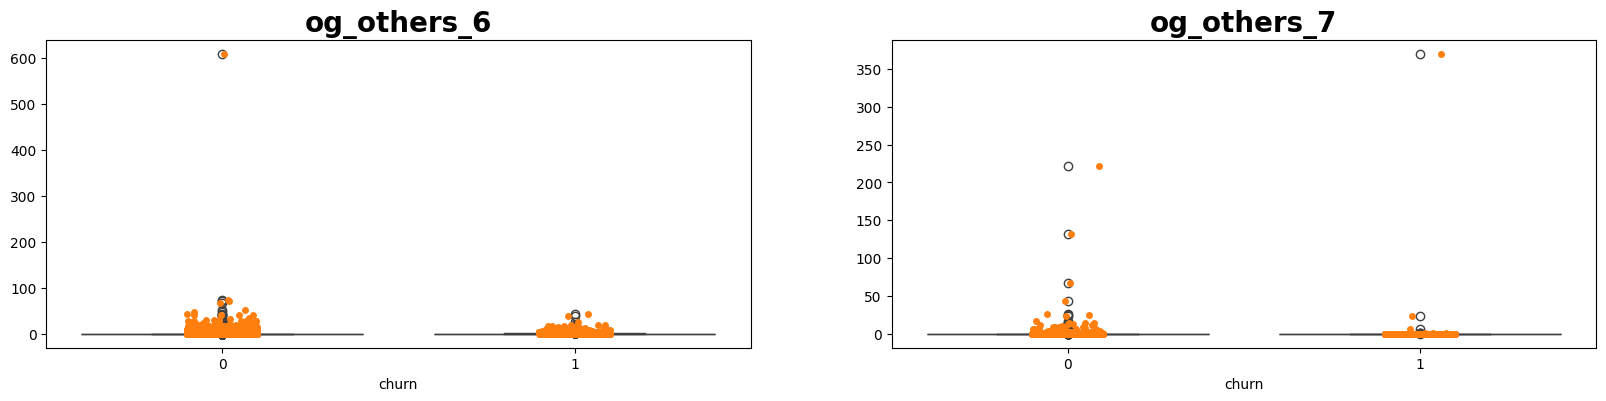

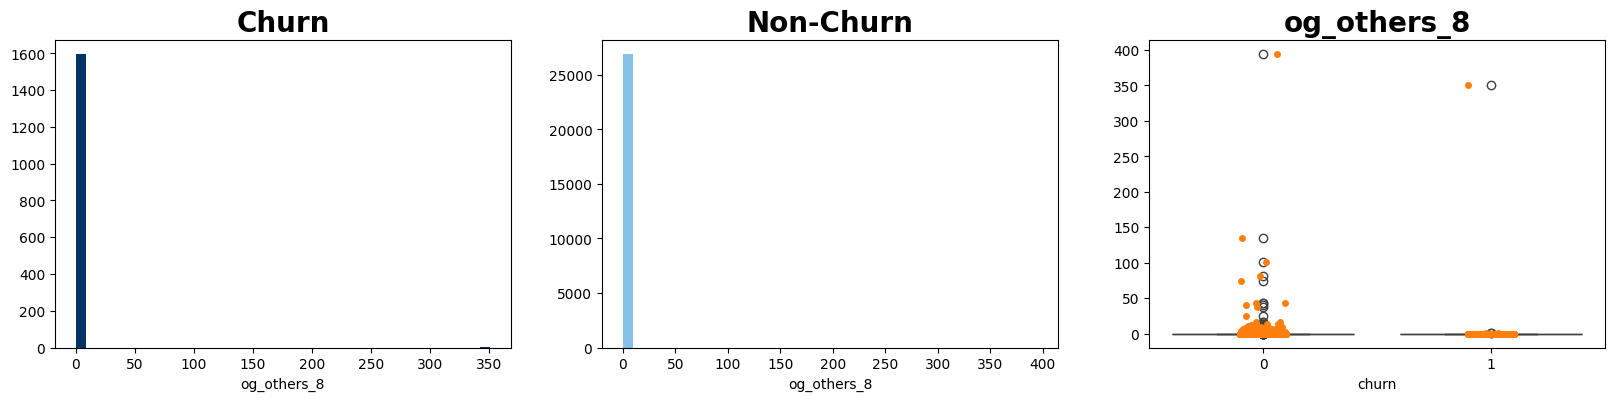

In [51]:
dist_box_plot(telecom_1, 'og_others_6'	, 'og_others_7'	   ,    'og_others_8')

`Customers do not use other call facility much when compared other parameters.`

### loc_ic_mou  (Minutes of usage  on Incoming calls)

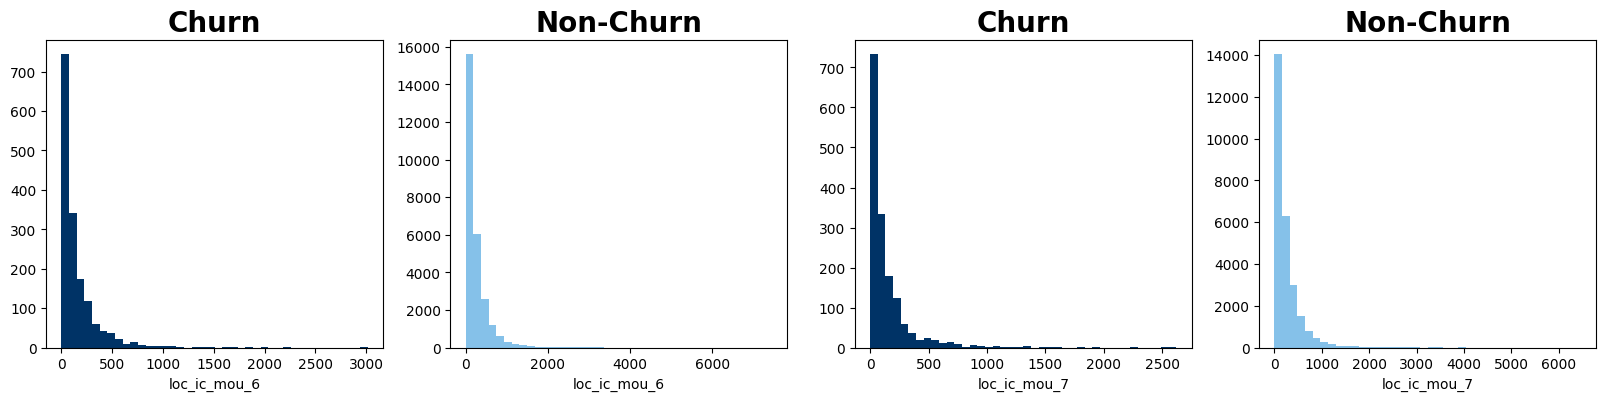

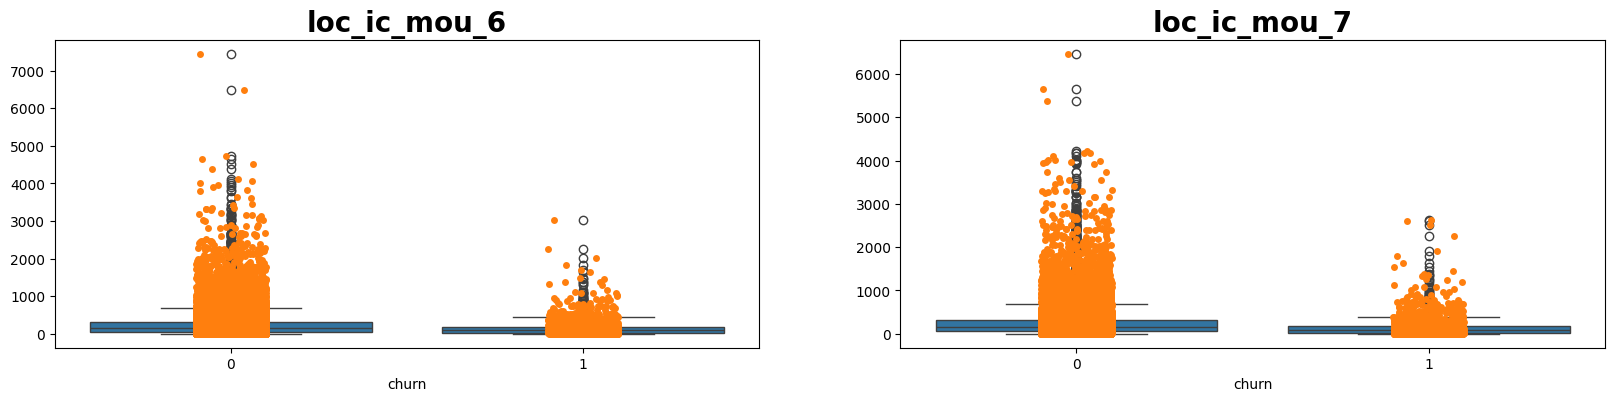

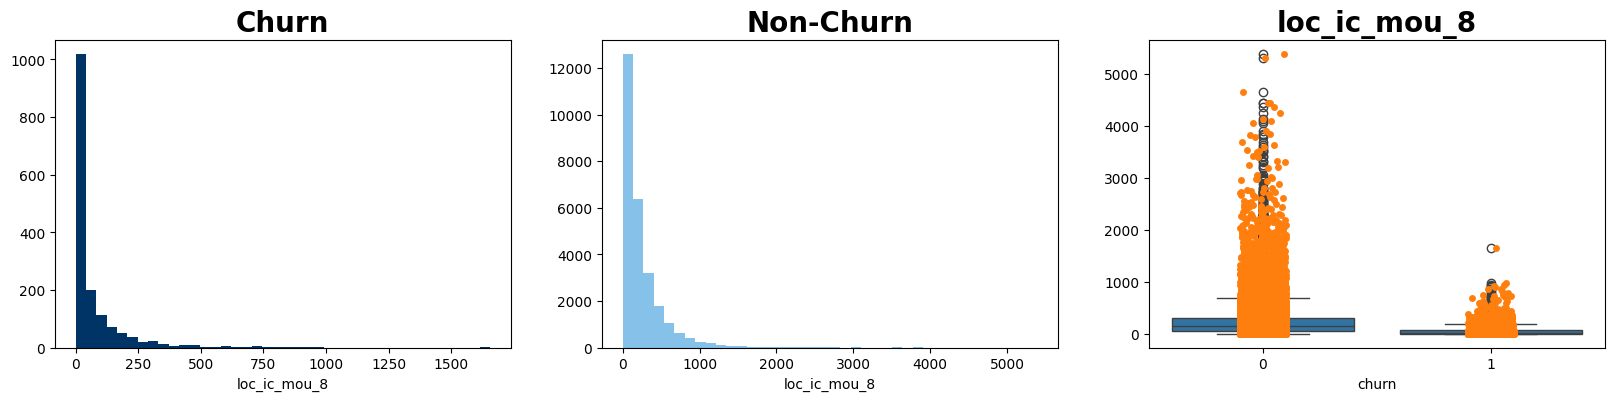

In [52]:
dist_box_plot(telecom_1, 'loc_ic_mou_6',	 'loc_ic_mou_7'	, 'loc_ic_mou_8')

`Similalry trend is seen in minutes of usage in local incoming calls which is also decreasing for churn customers in 8th month.As compared to 6th and 7th month , in 8th month there is no high minutes of usage as the graph is condensed.`

### std_ic_t2t_mou  (Minutes of usage within same operator on STD incoming calls)

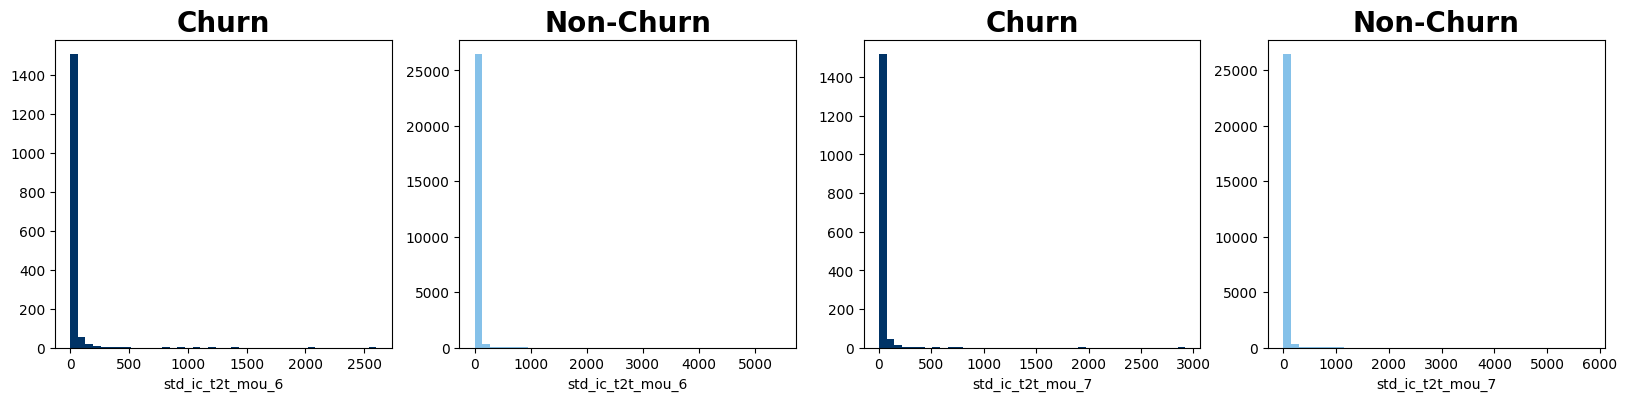

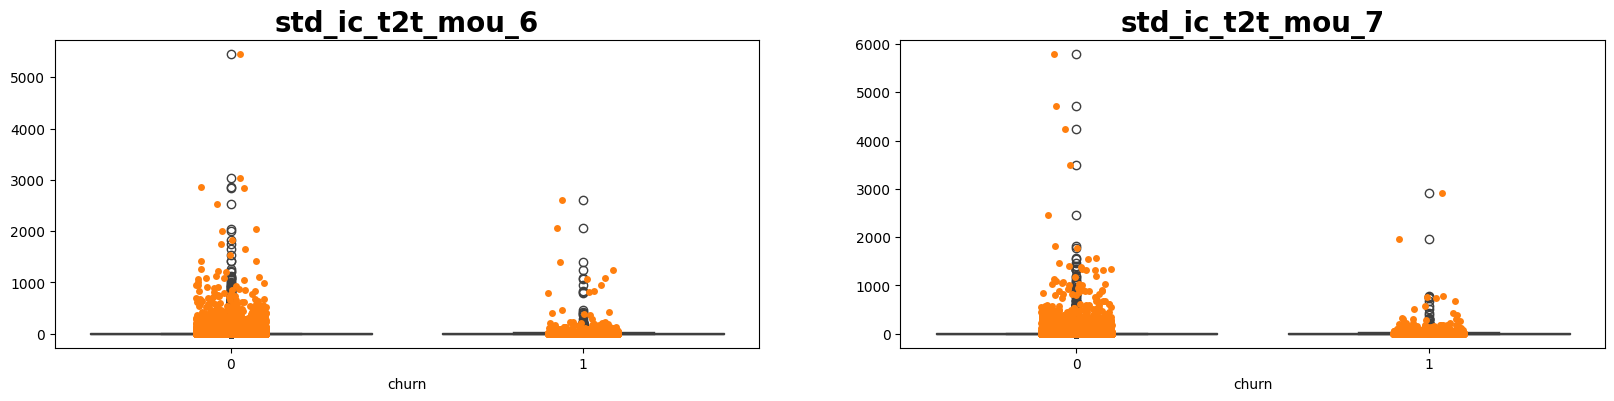

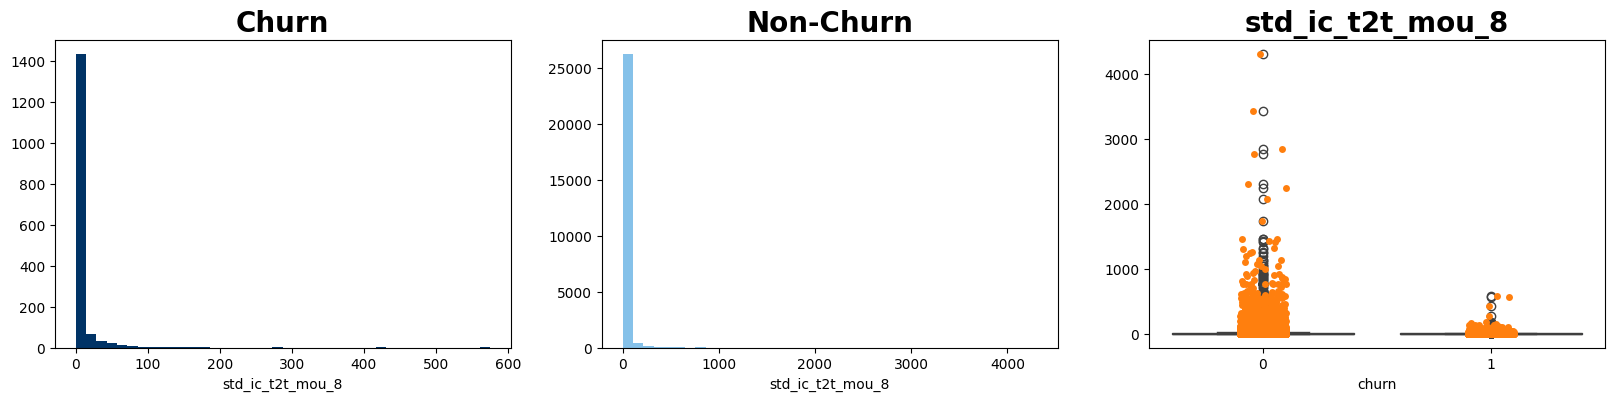

In [53]:
dist_box_plot(telecom_1,'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8')

`STD Incoming calls minutes of usage are reduced in 8th month. Huge outliers for Non churn customers`

### std_ic_t2f_mou  (Minutes of usage from Operator T to fixed lines of T on STD incoming calls)

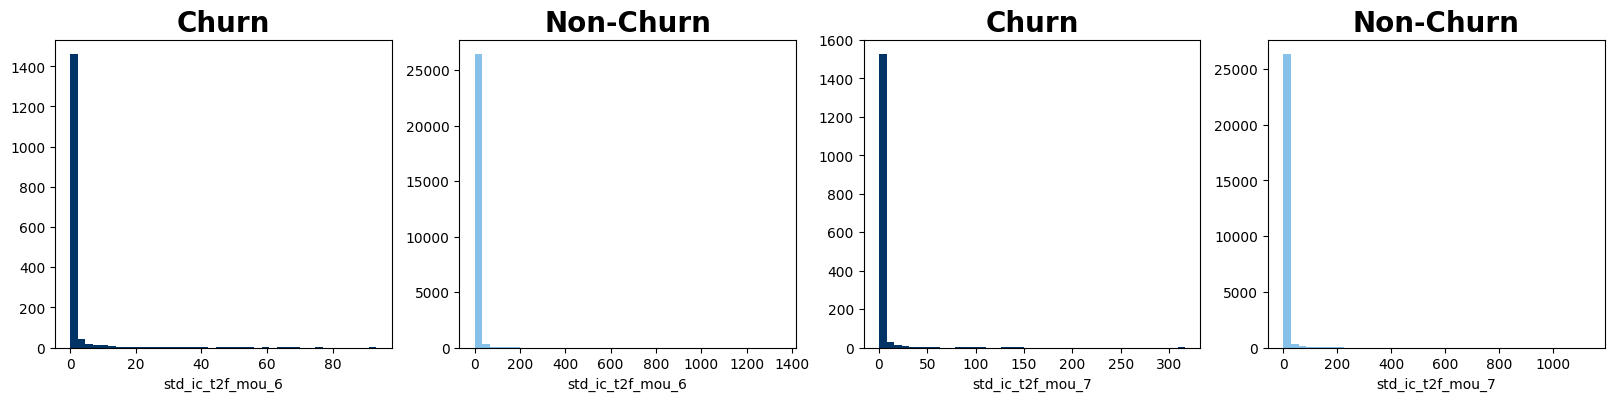

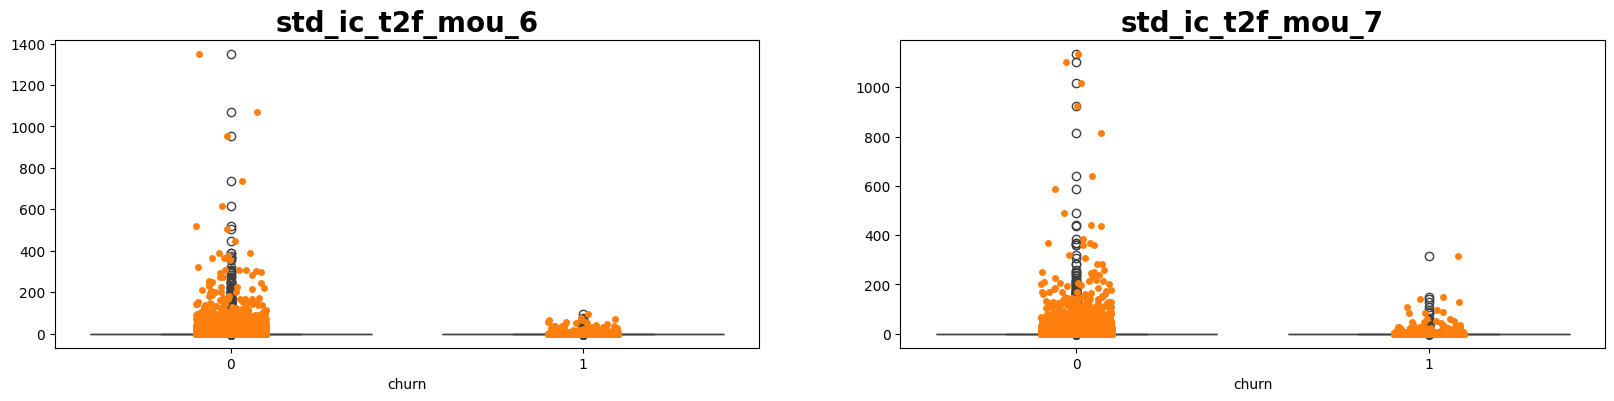

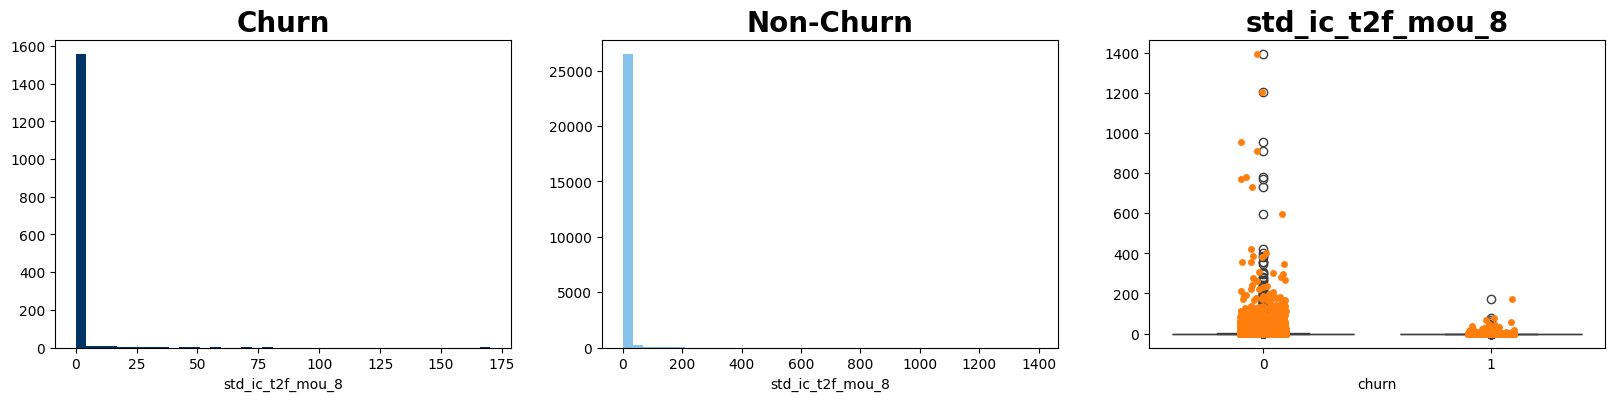

In [54]:
dist_box_plot(telecom_1,'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8')

`Only few customer are calling to Fixed line. Also mou for fixed lines is decreased for churn customers in 8th month.`

### total_ic_mou  (Total Minutes of usage on incoming calls)

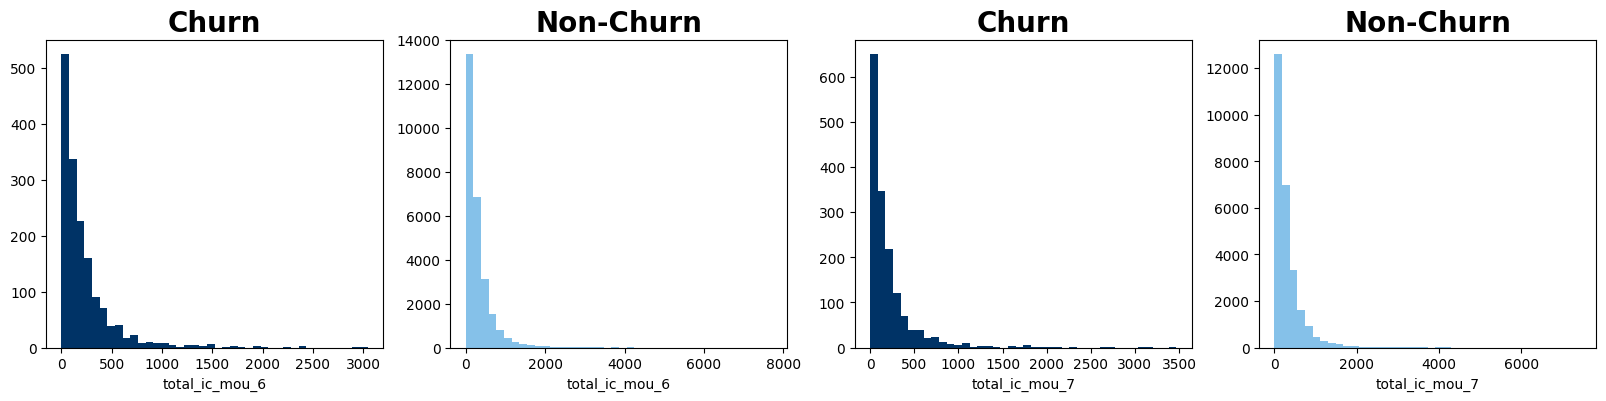

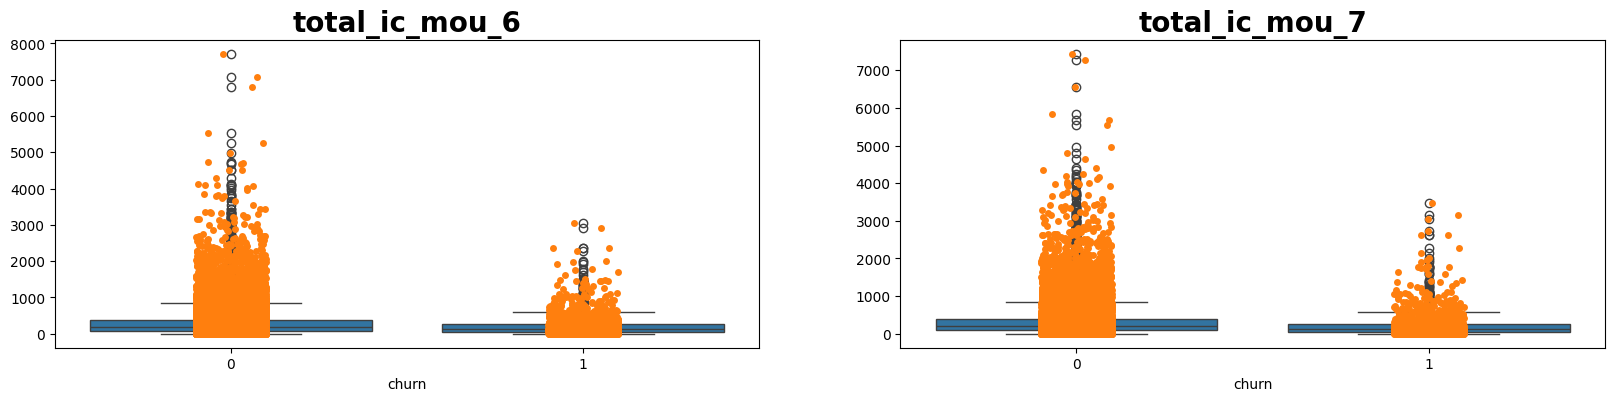

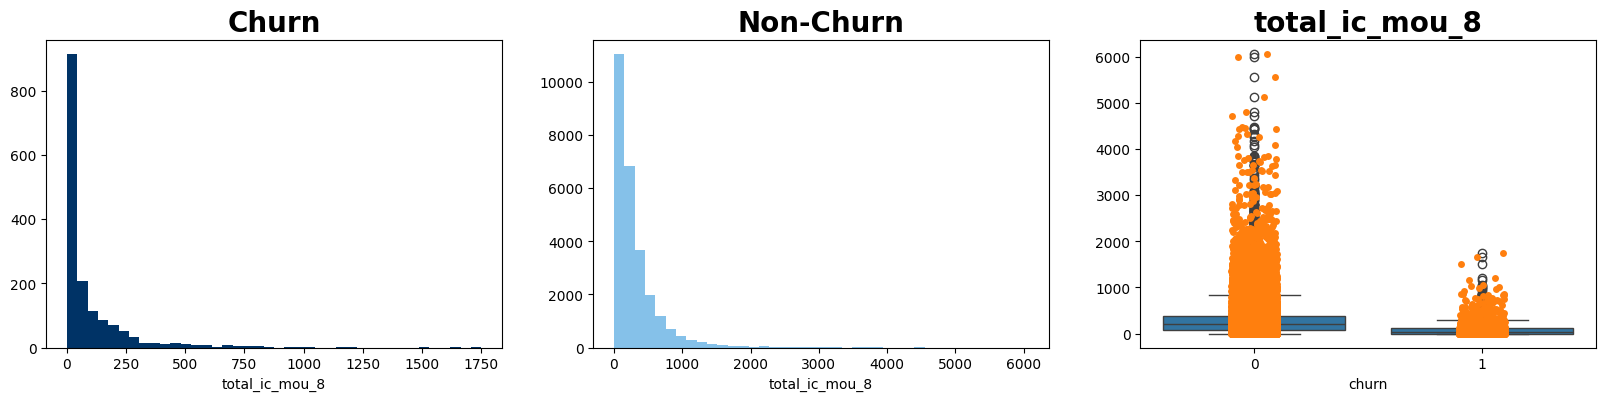

In [55]:
dist_box_plot(telecom_1,'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8')

`Significant drop in Total Minutes of usage on incoming calls for 8th month for churn customers. High outliers  present for  non churn customers.`

### total_rech_amt (Total Reacharge Amount)

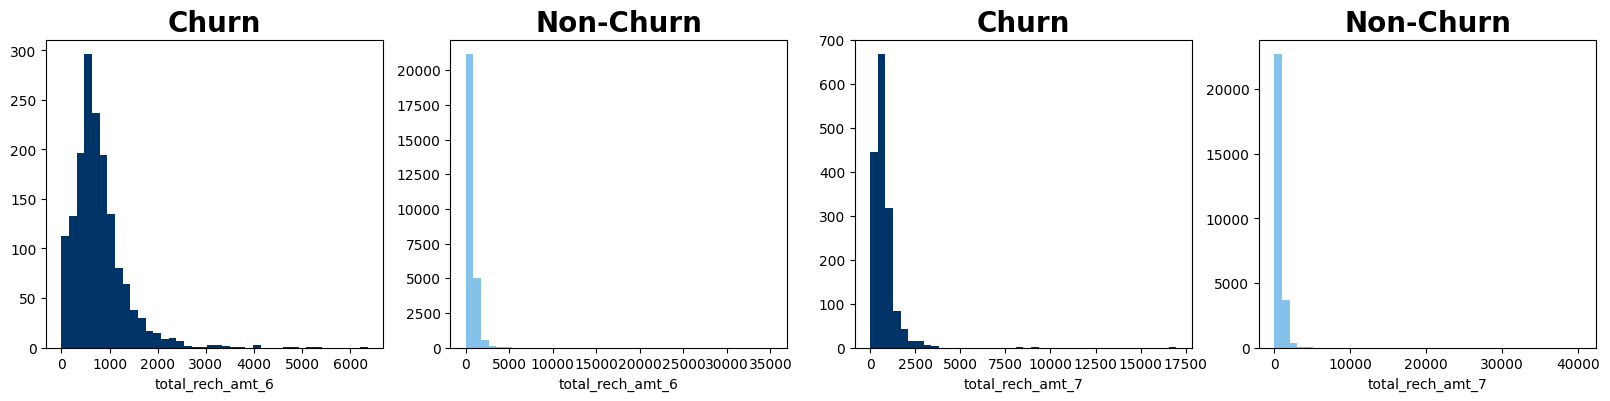

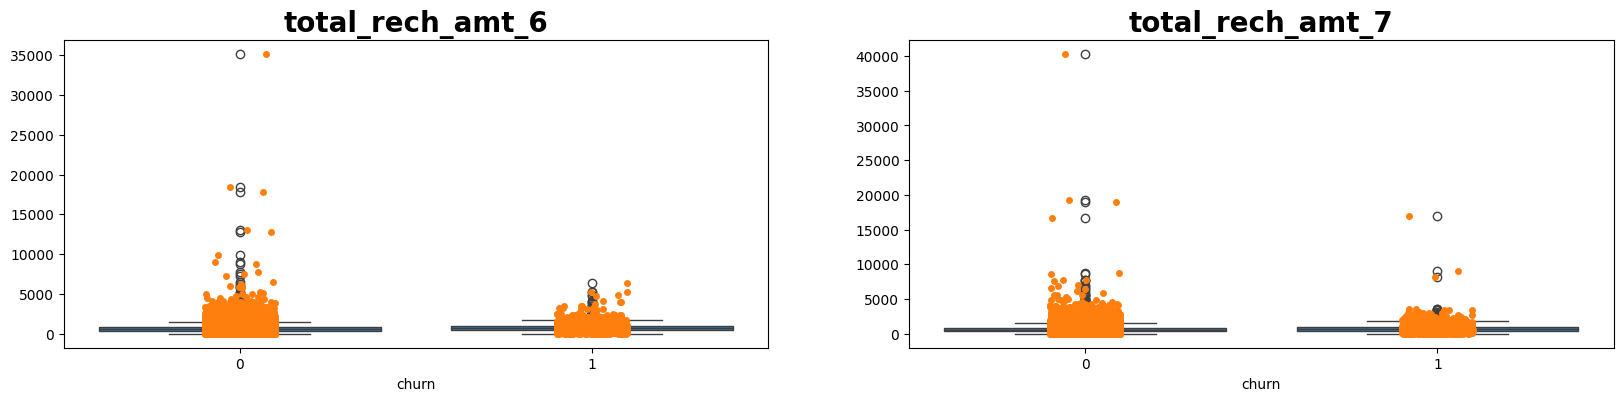

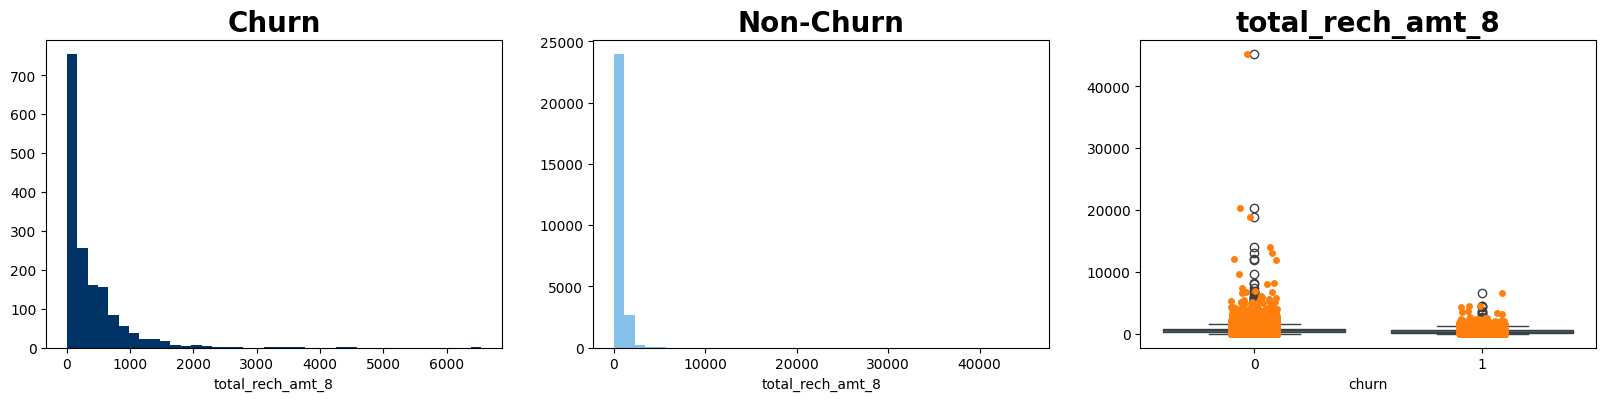

In [56]:
dist_box_plot(telecom_1,'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8')

`Total recharge amount distribution is getting increased  from 6 to 7th month and then getting decrease in 8th month for Churn customers.`

### max_rech_amt (Max Reacharge Amount)

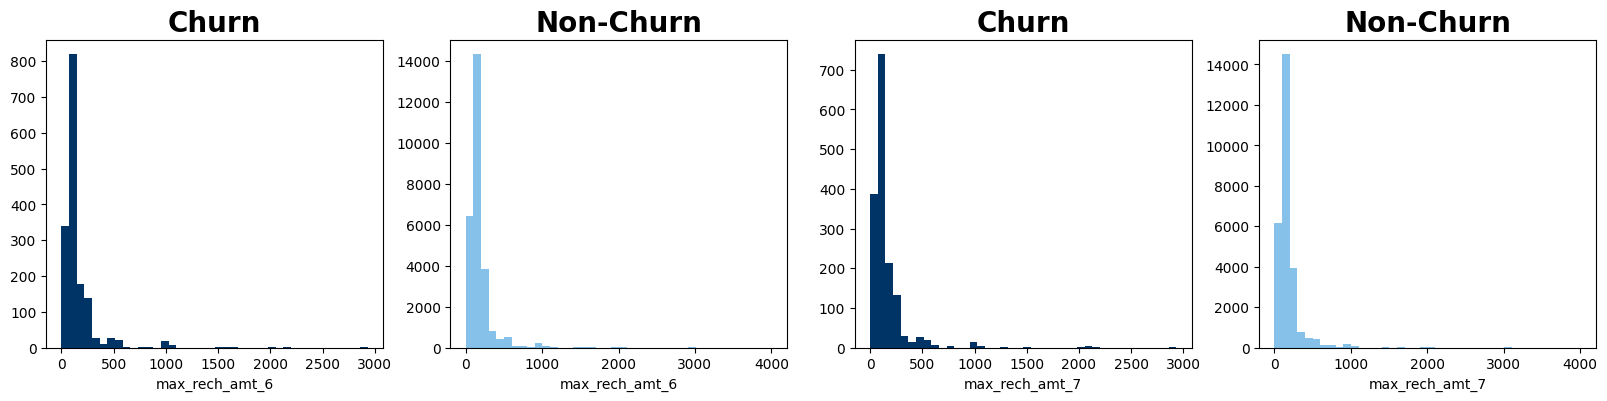

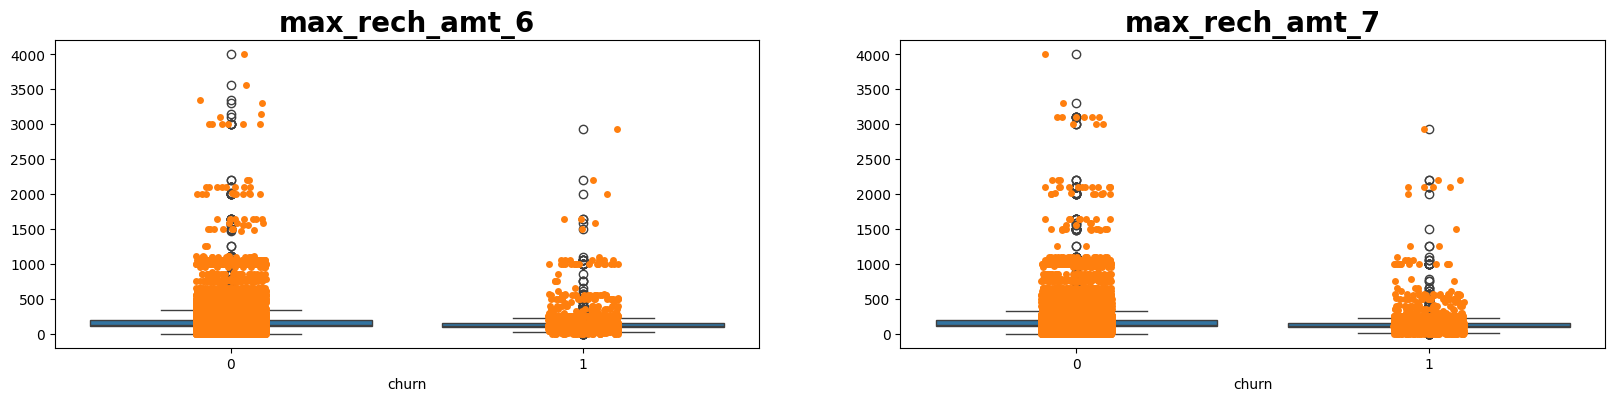

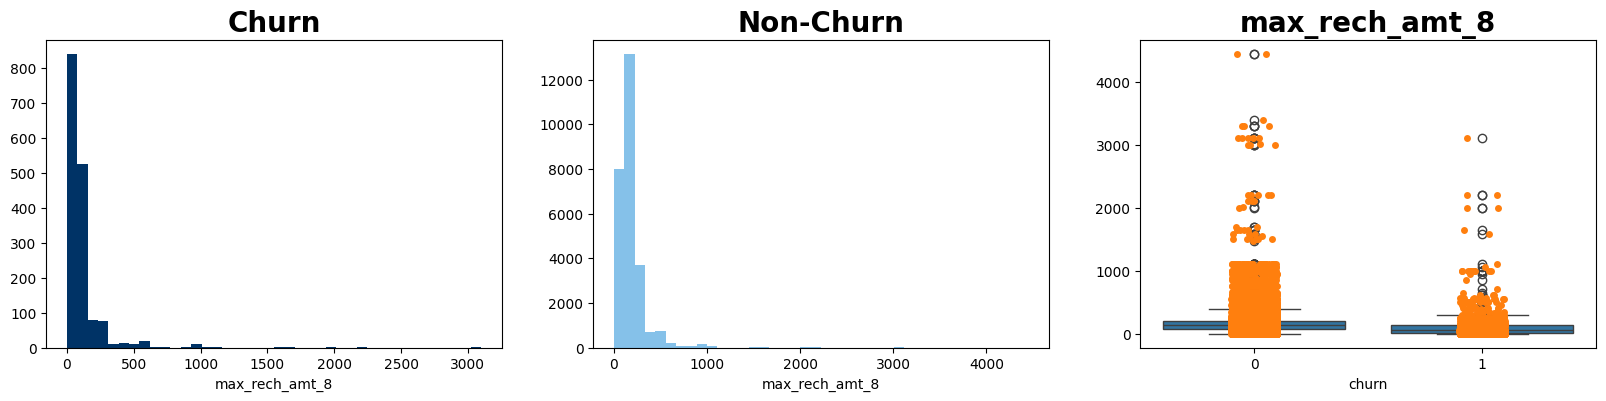

In [57]:
dist_box_plot(telecom_1,'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8')

`Looks like Max Recharge Amount is decreased in 8th month for Churn customers.`

### last_day_rch_amt (Last day Reacharge Amount)

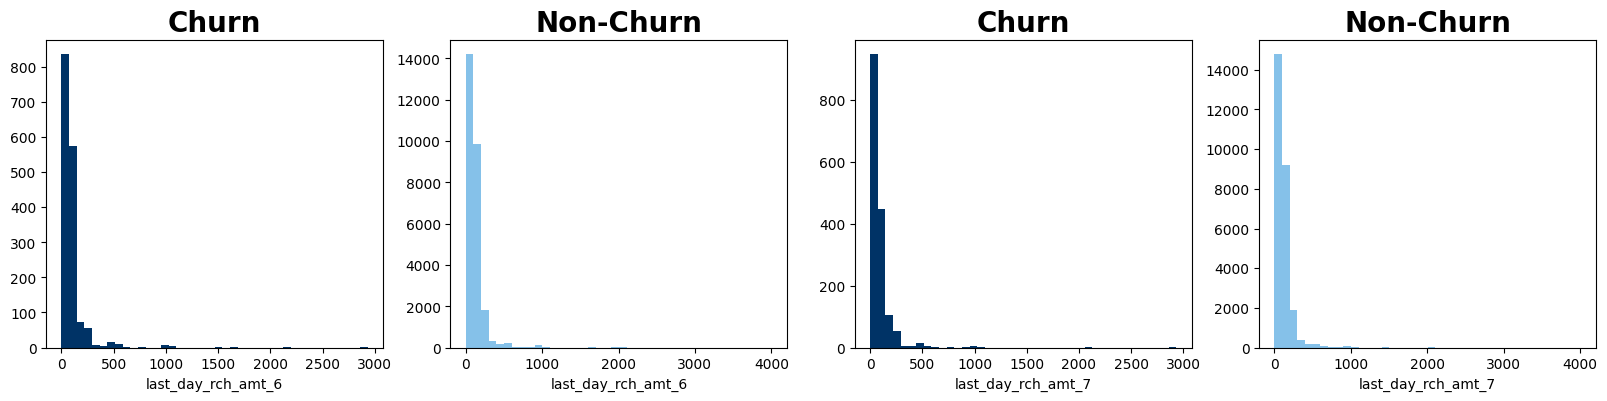

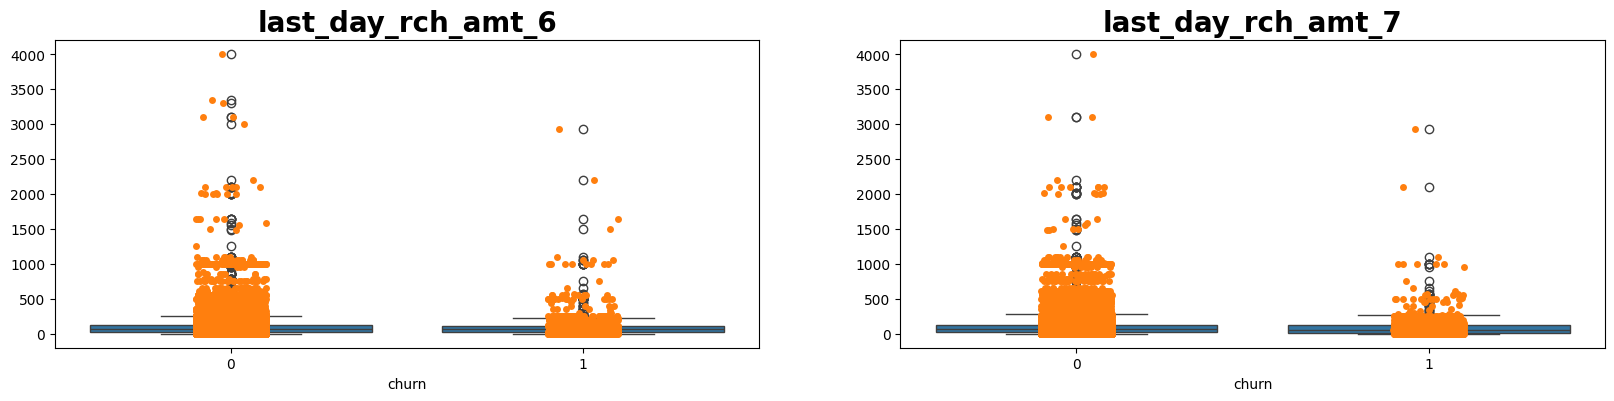

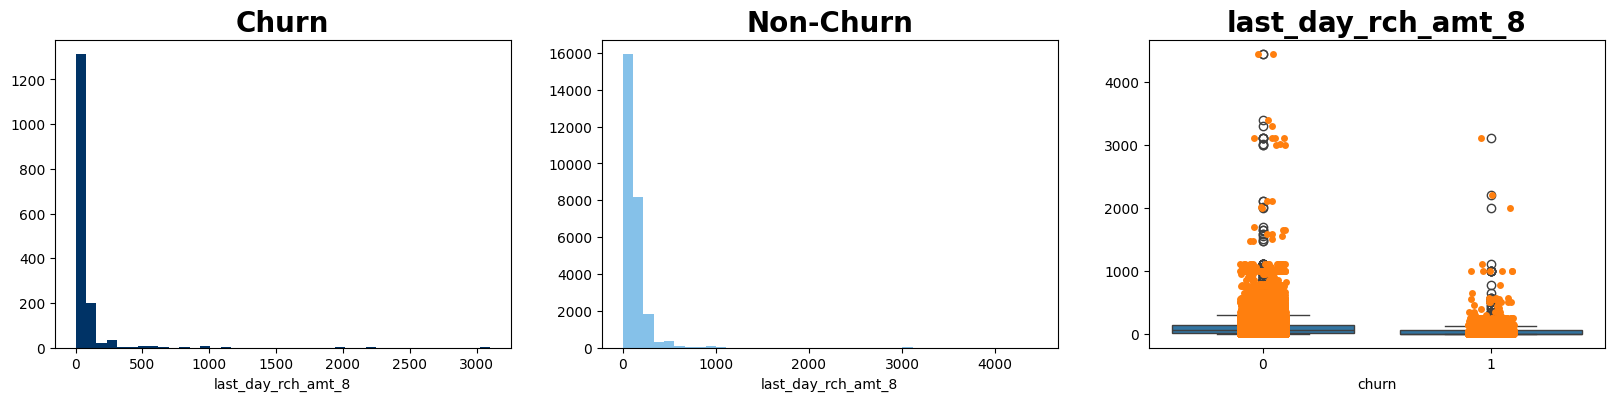

In [58]:
dist_box_plot(telecom_1,'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8')

`Last day Reacharge decreased in in 8th month for churn customers.`

### Monthly 2g

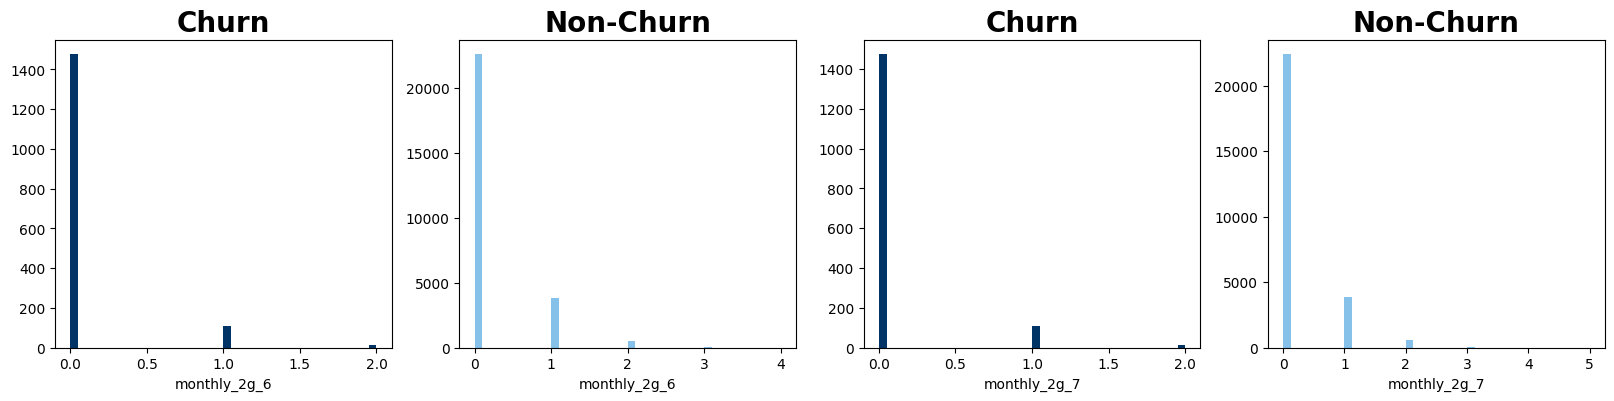

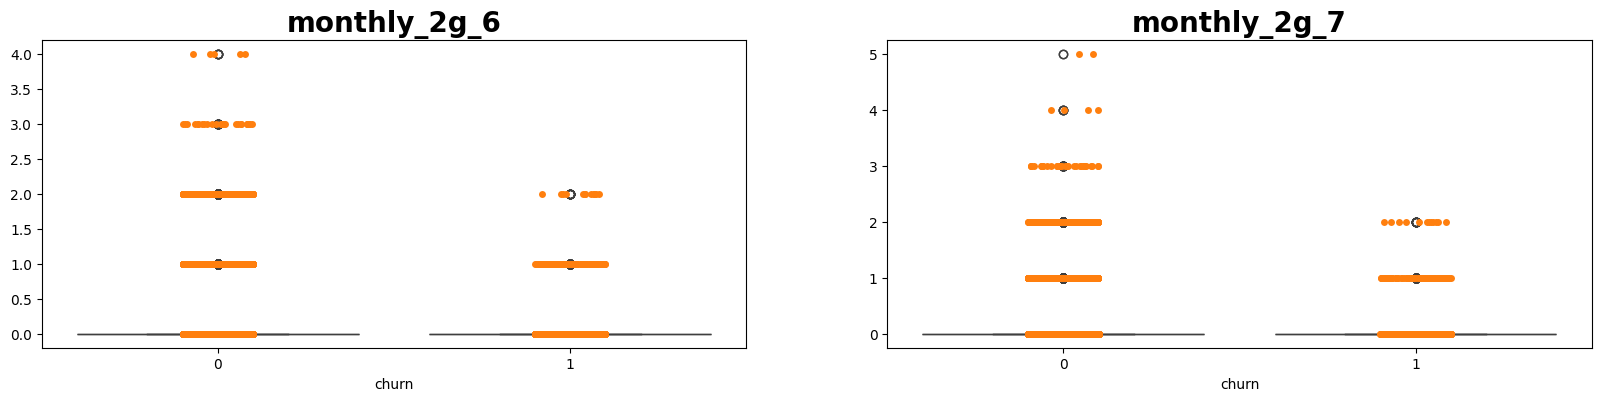

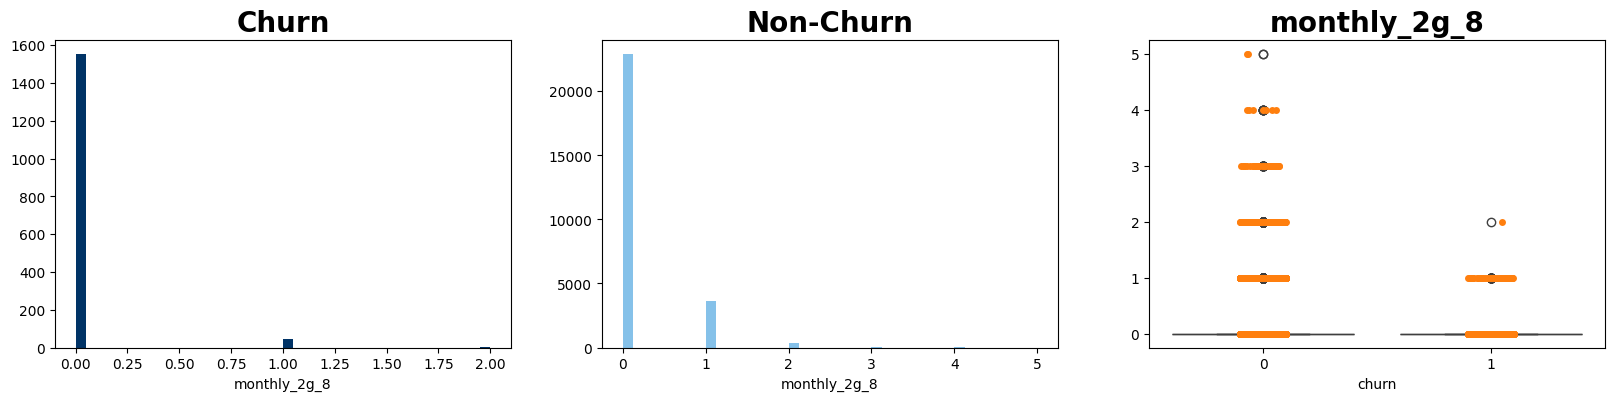

In [59]:
dist_box_plot(telecom_1,'monthly_2g_6'	, 'monthly_2g_7'	, 'monthly_2g_8')

`Monthly recharge data reduced for 8th month churn customers.`

### monthly 3g

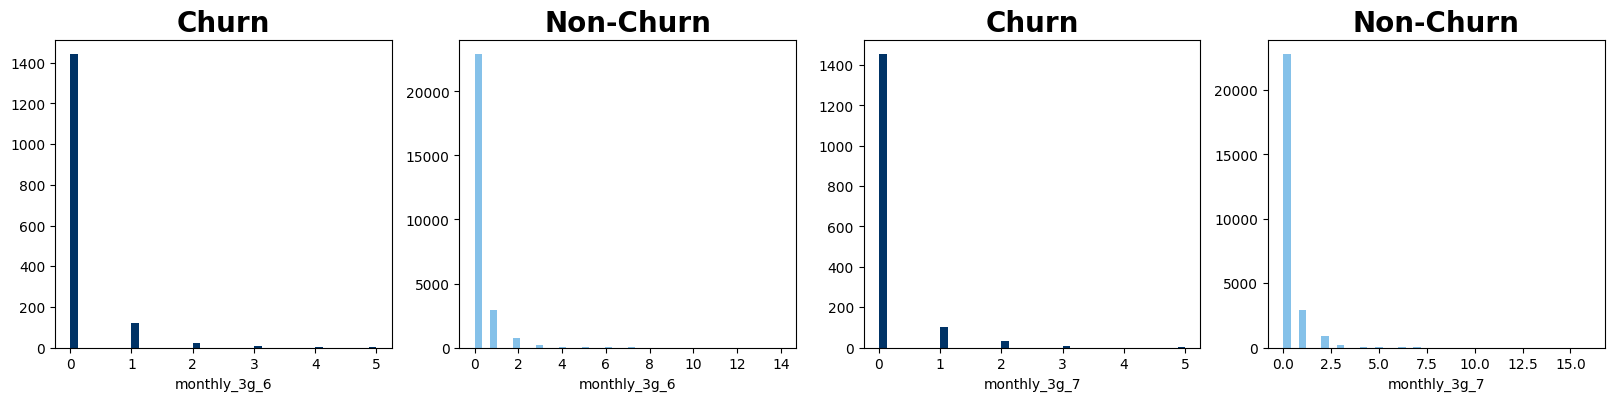

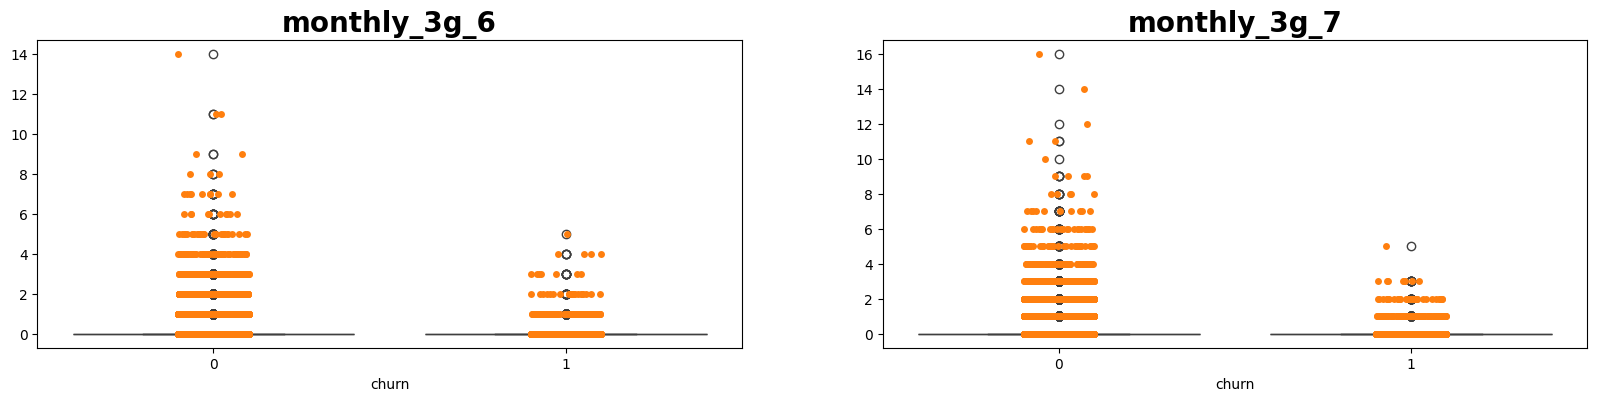

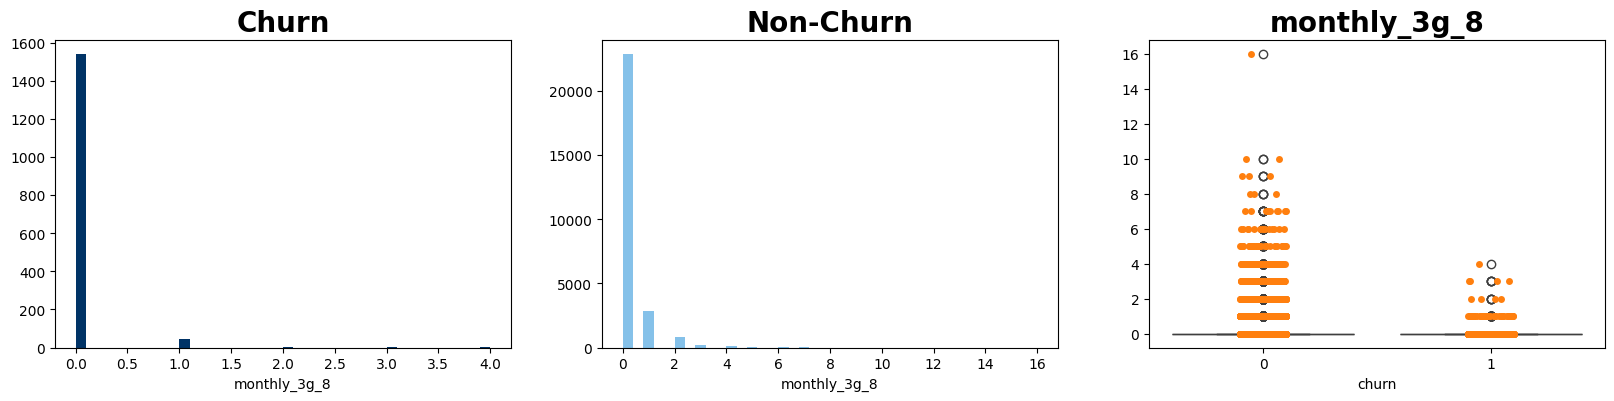

In [60]:
dist_box_plot(telecom_1, 'monthly_3g_6',	 'monthly_3g_7'	, 'monthly_3g_8')

`Monthly recharge 3g data is decreased in 8th month for churn customers.`

### vol_2g_mb (2g data volume in Mb)

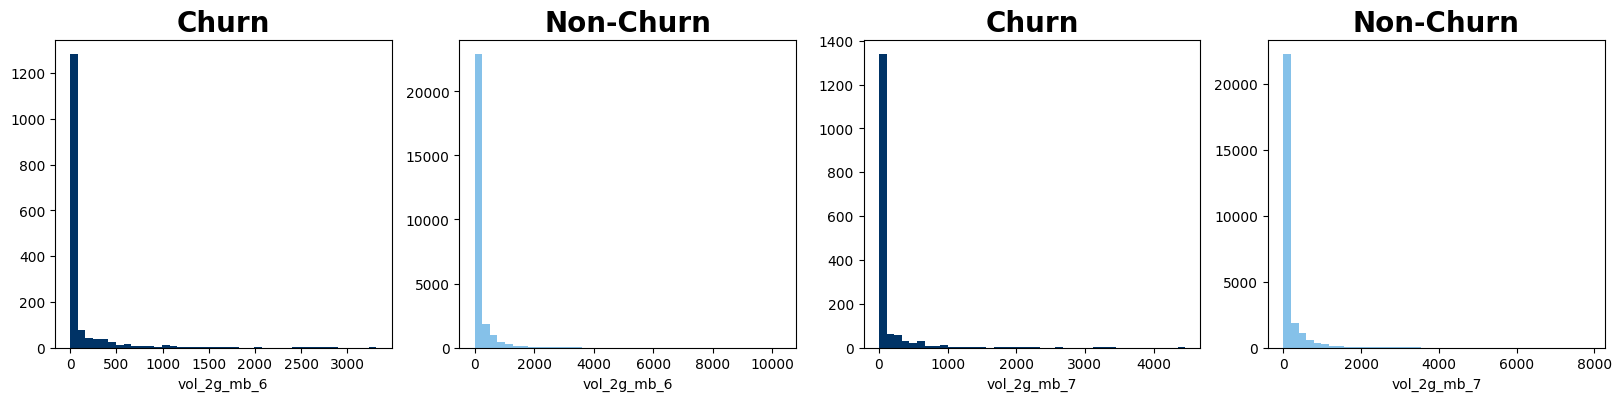

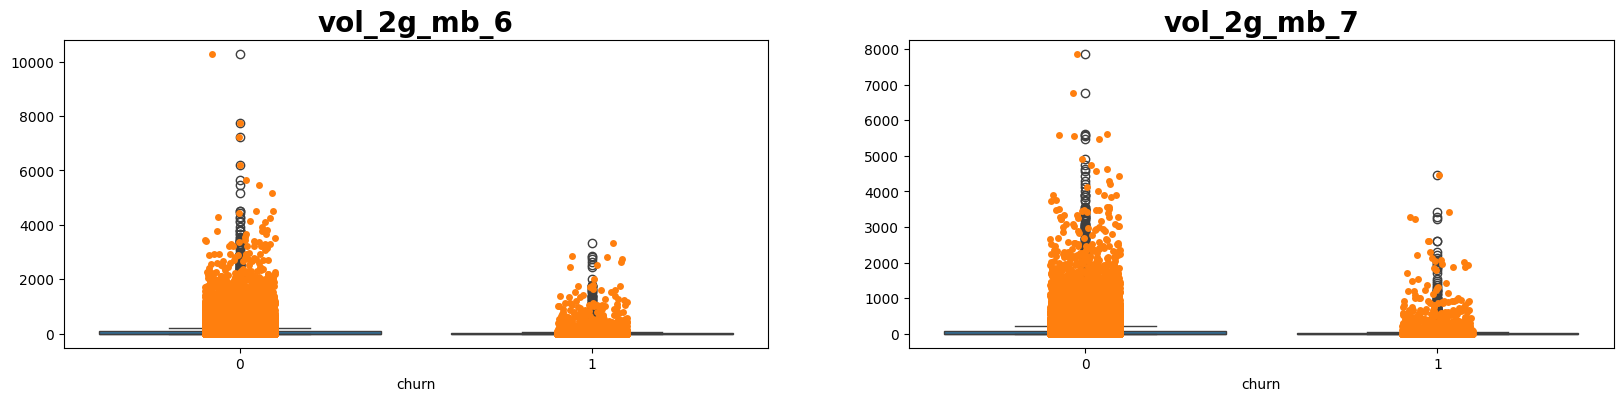

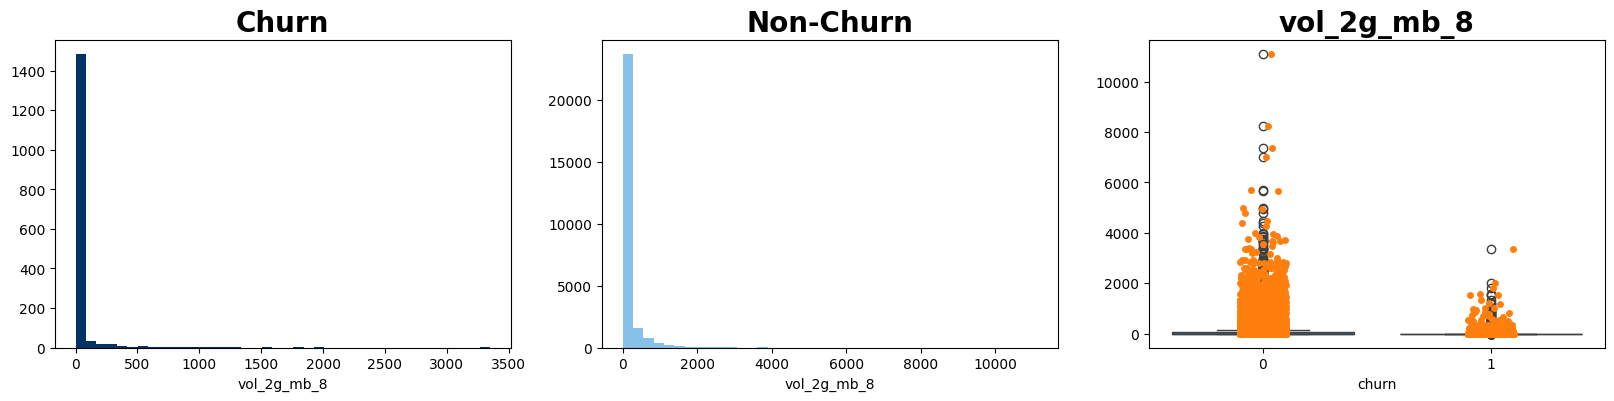

In [61]:
dist_box_plot(telecom_1,'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8')

`2g data volume in Mb decreased in 8th month for churn customers.`

### Service schemes with validity smaller than a month for 2g

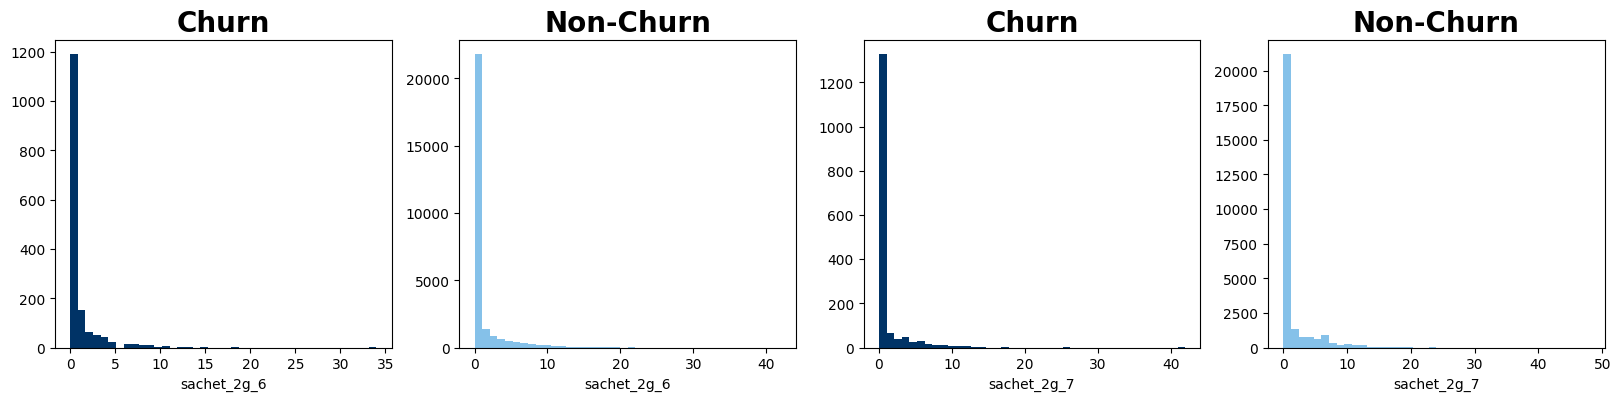

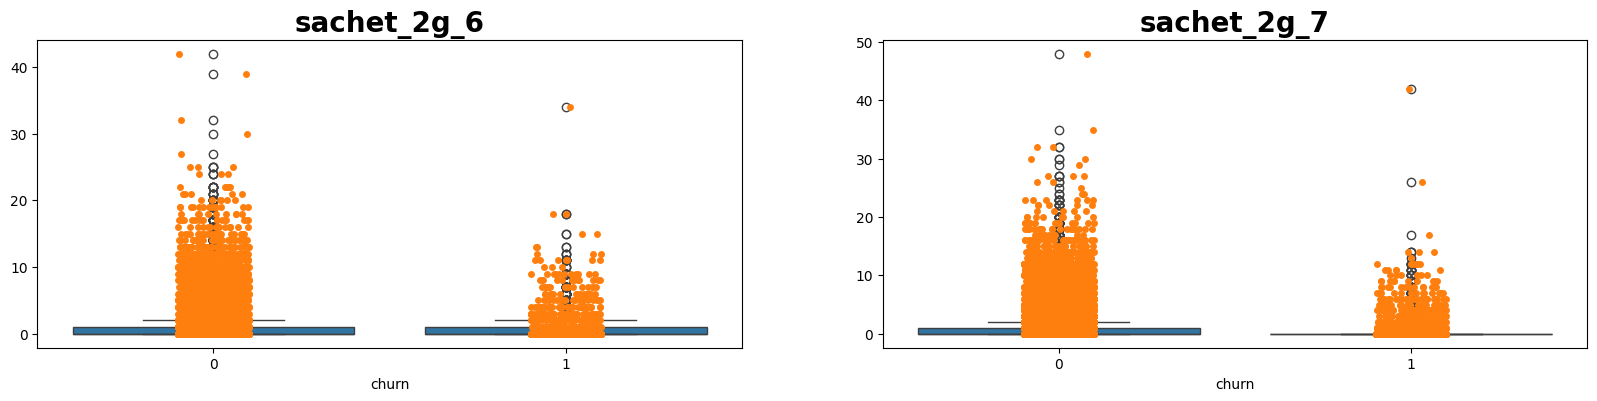

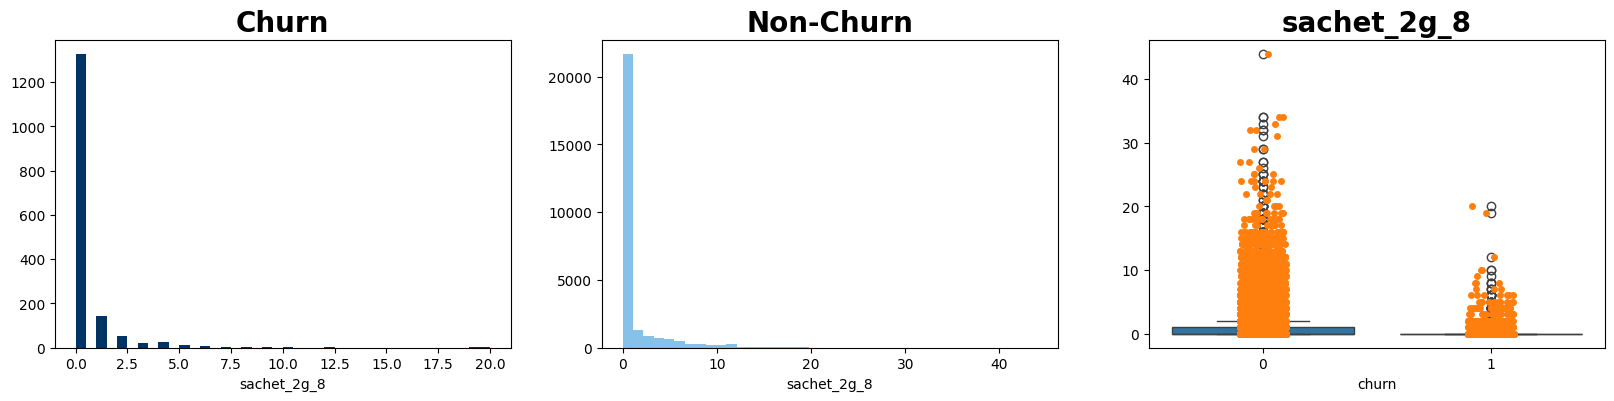

In [62]:
dist_box_plot(telecom_1, 'sachet_2g_6'	, 'sachet_2g_7'	, 'sachet_2g_8')

`We can see that for service schemes 2g data volume usage decreased in 8th month (for churn customers)`

### Service schemes with validity smaller than a month for 3g

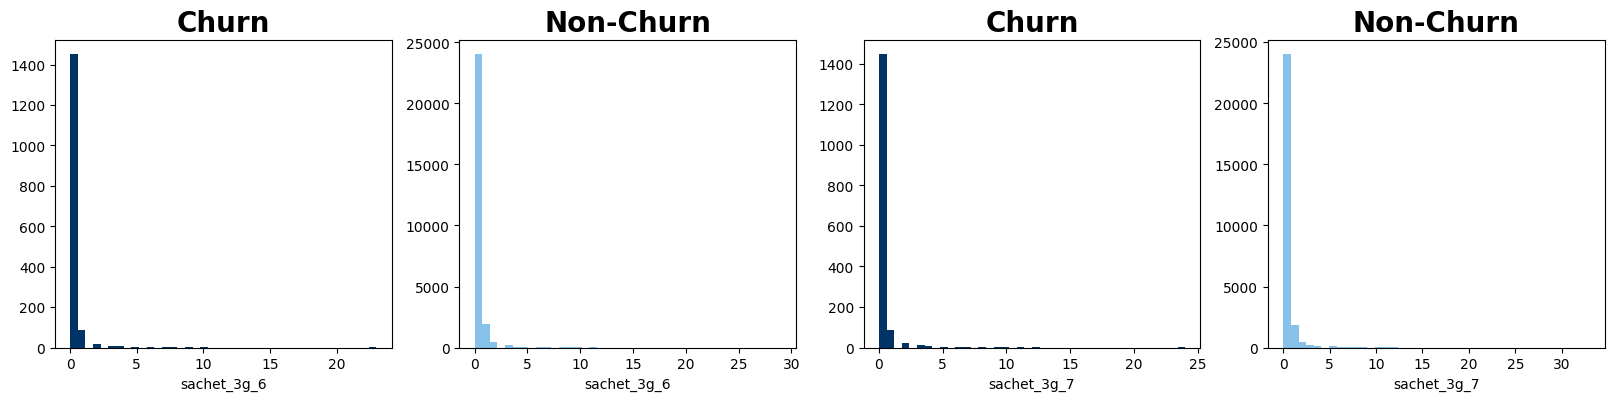

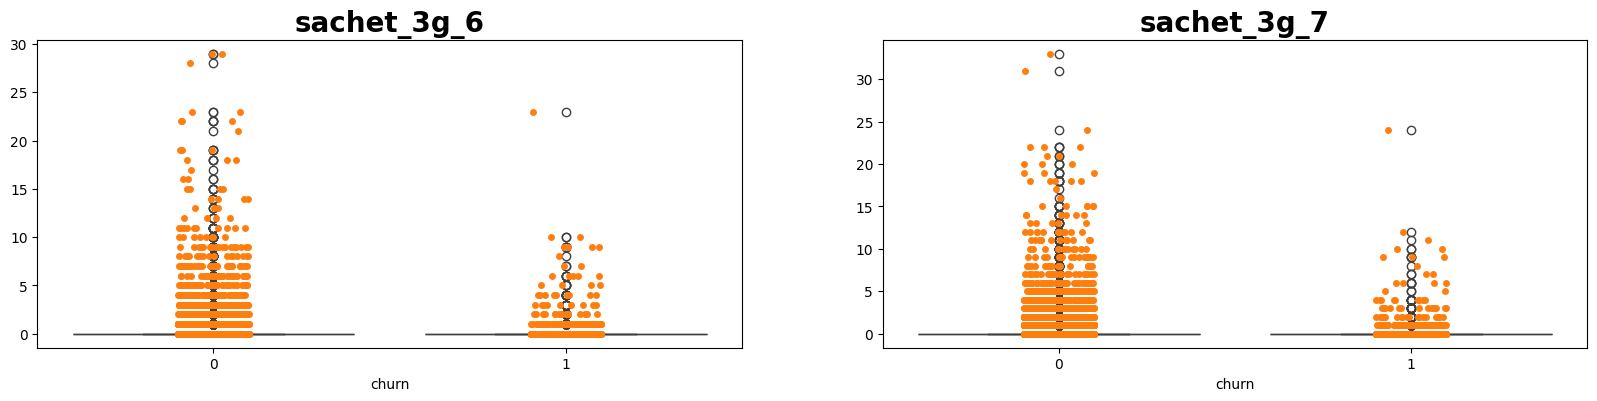

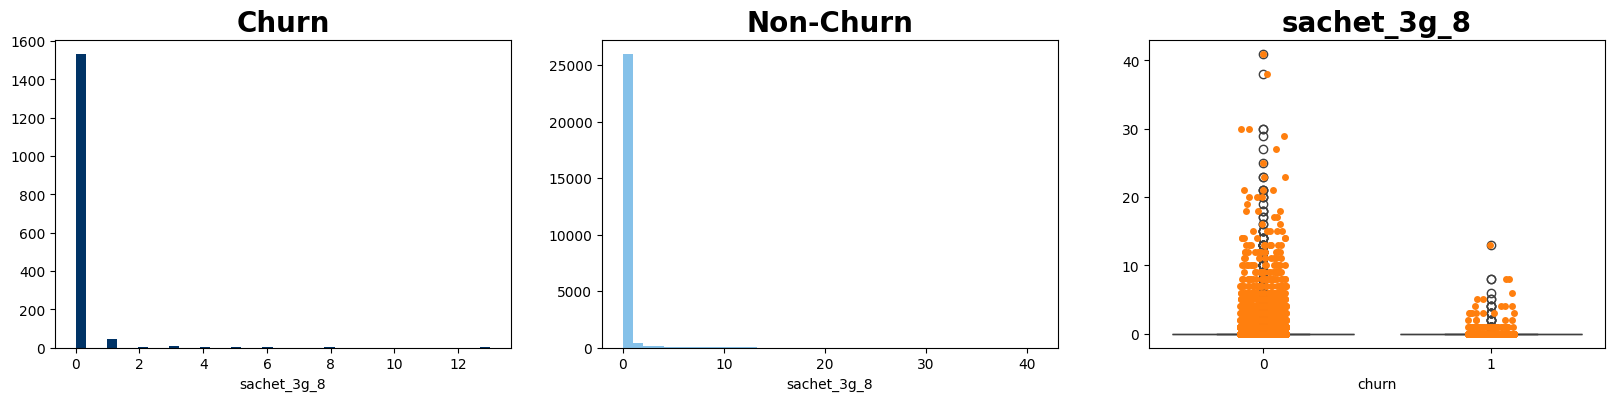

In [63]:
dist_box_plot(telecom_1, 'sachet_3g_6'	, 'sachet_3g_7'	, 'sachet_3g_8')

`Significant drop in Service Schemes per user from 3g data in 8th month for churn customers`

### incoming calls Others

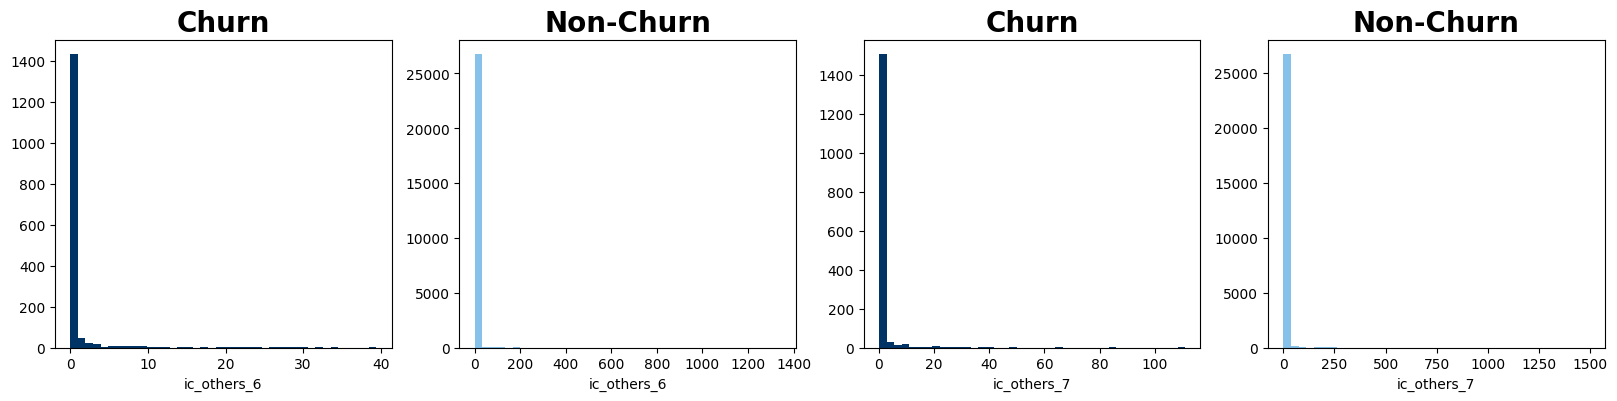

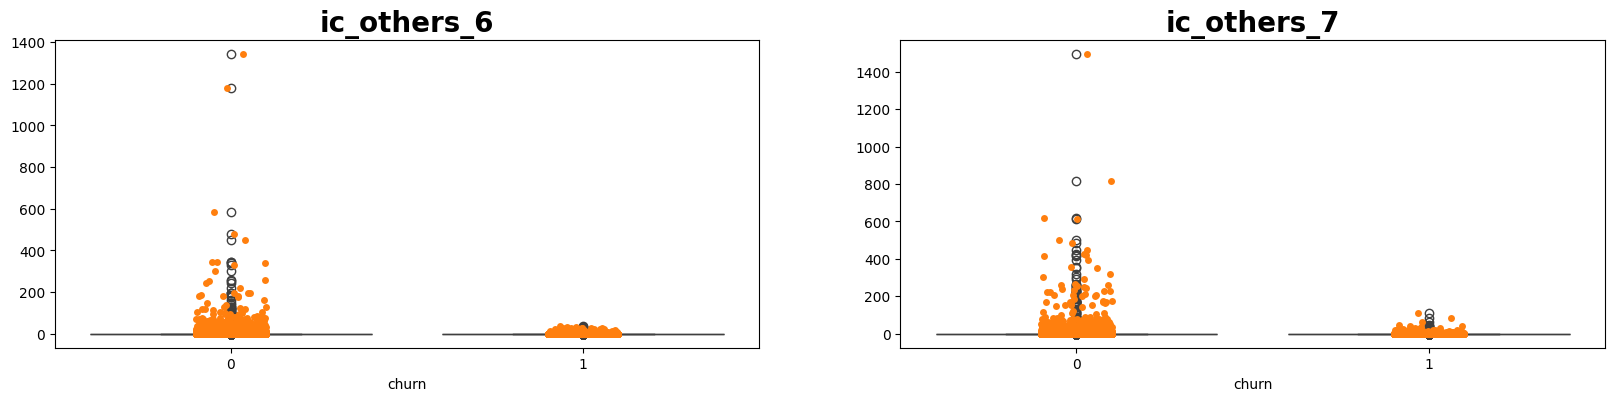

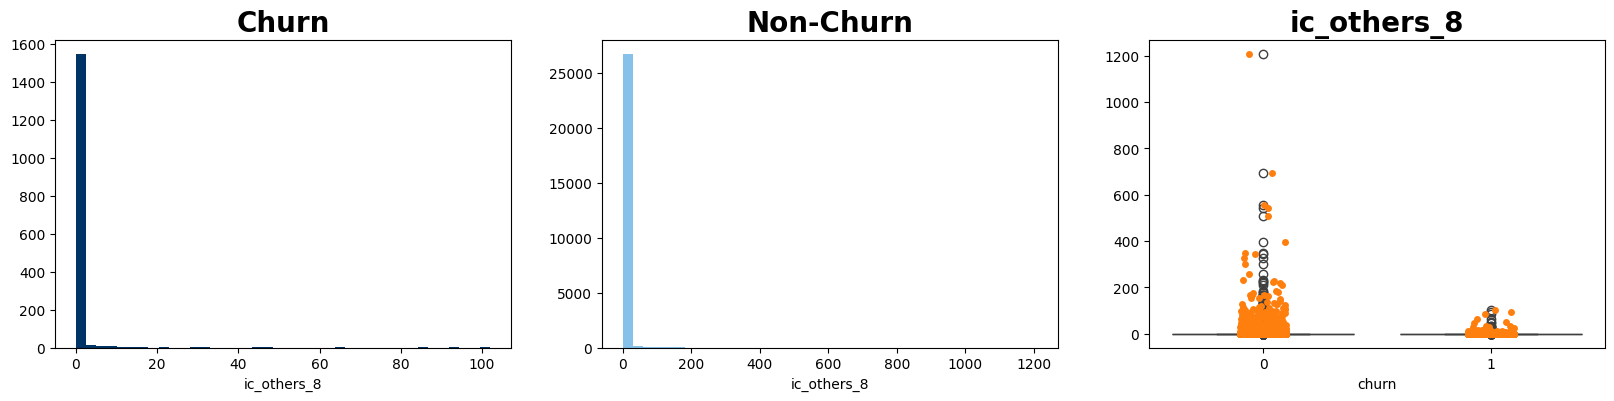

In [64]:
dist_box_plot(telecom_1, 'ic_others_6'	, 'ic_others_7'	, 'ic_others_8')

`Similalry significant drop in incoming calls others per user for churn customers.`

### month_vbc (Volume based cost - when no specific scheme is not purchased and paid as per usage)

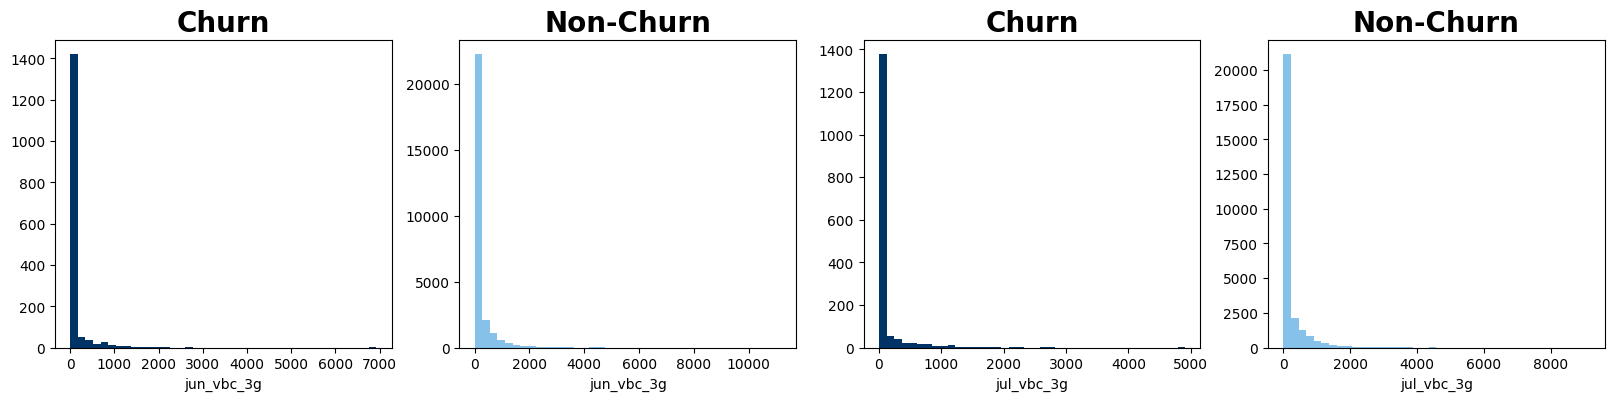

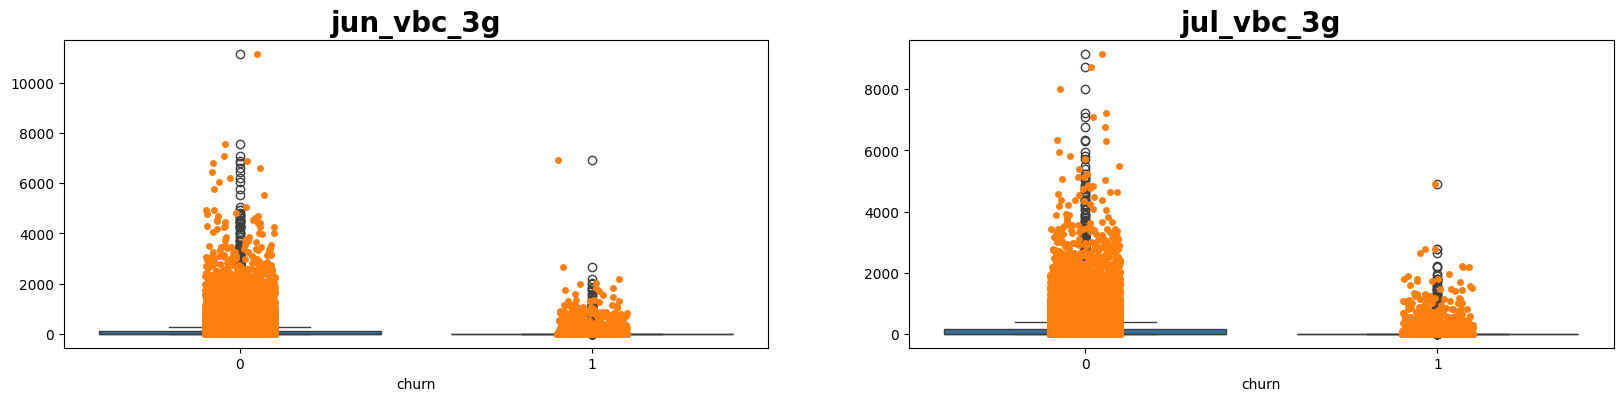

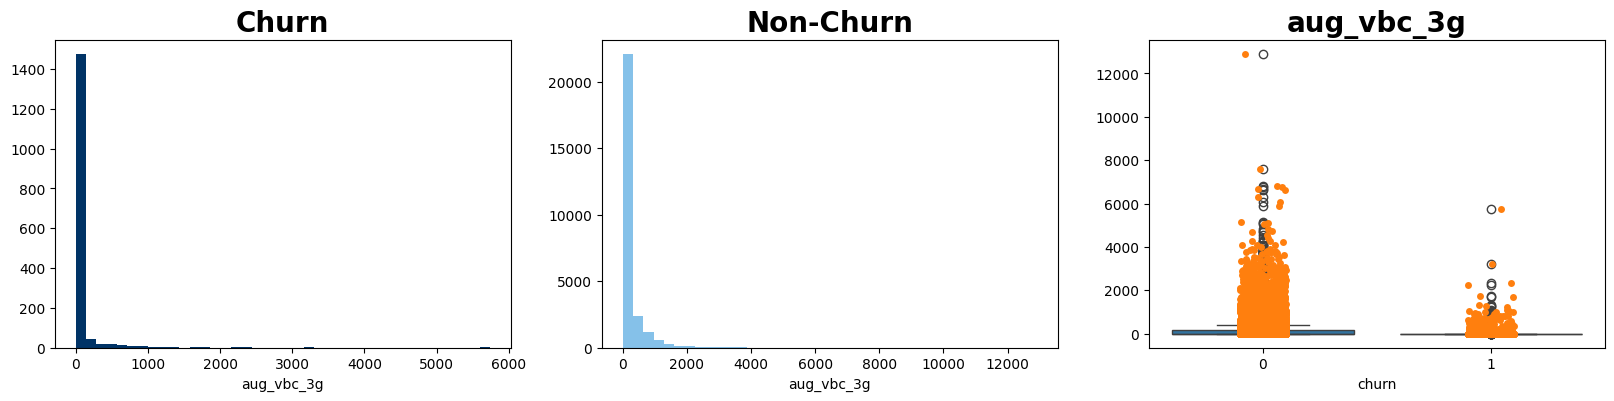

In [65]:
dist_box_plot(telecom_1,'jun_vbc_3g','jul_vbc_3g','aug_vbc_3g')

`Decrease in Volume based cost - when no specific scheme is not purchased and paid as per usage in 8th month for churn customers`

### total_rech_num (Total no of recharges)

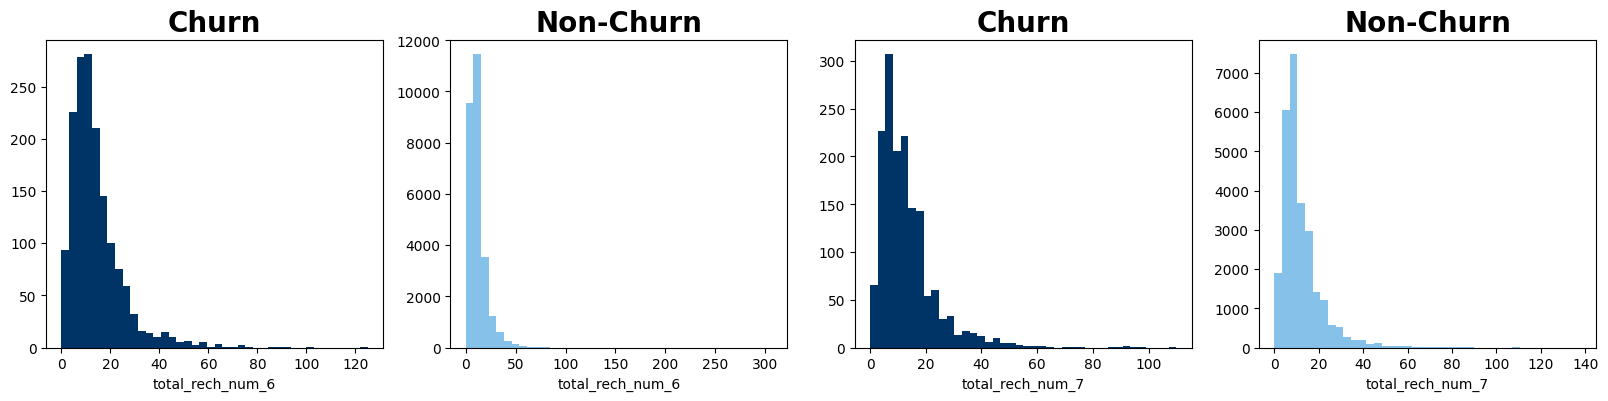

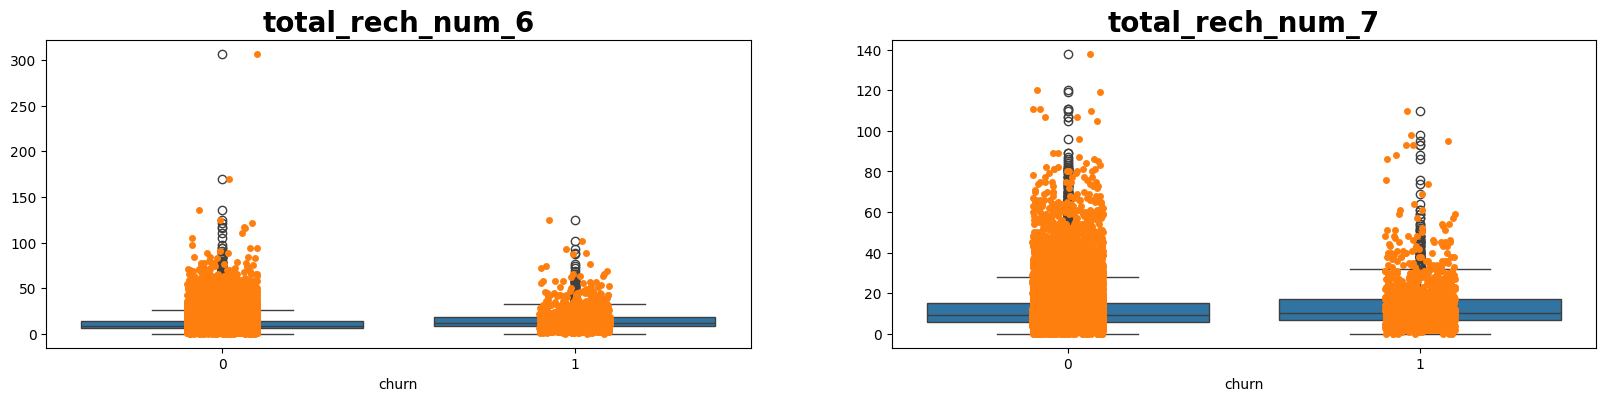

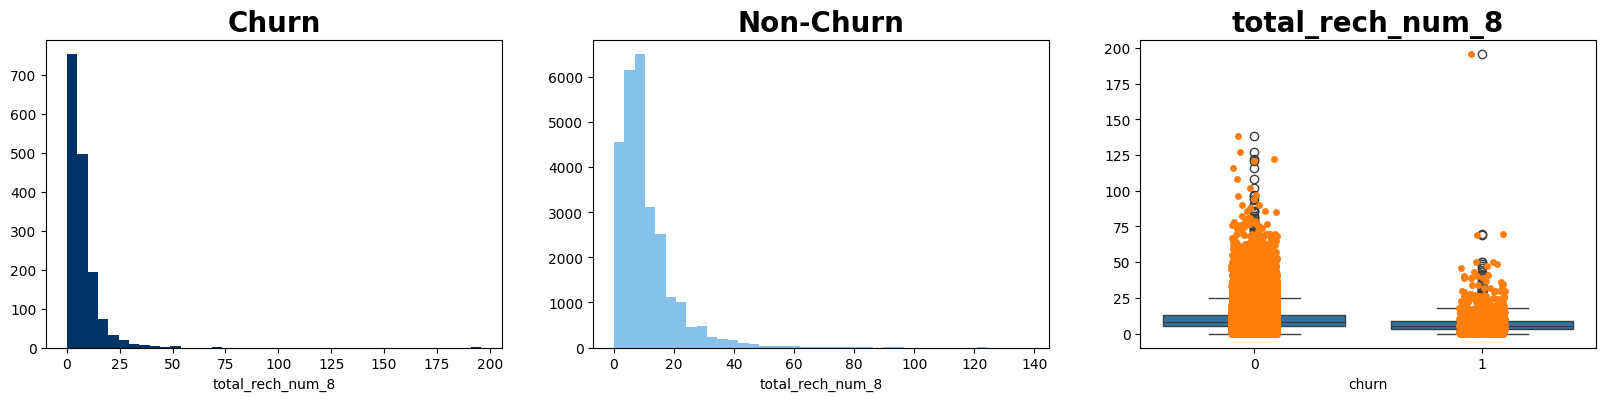

In [66]:
dist_box_plot(telecom_1,'total_rech_num_6','total_rech_num_7','total_rech_num_8')

`Huge decrease in total reacharge numbers for churn customers .There are lots of outliers in Total recharge number ,churn customers count increased from 6th to 8th month and amount is decreased.`

### aon(Age on network - number of days the customer is using the operator T network)

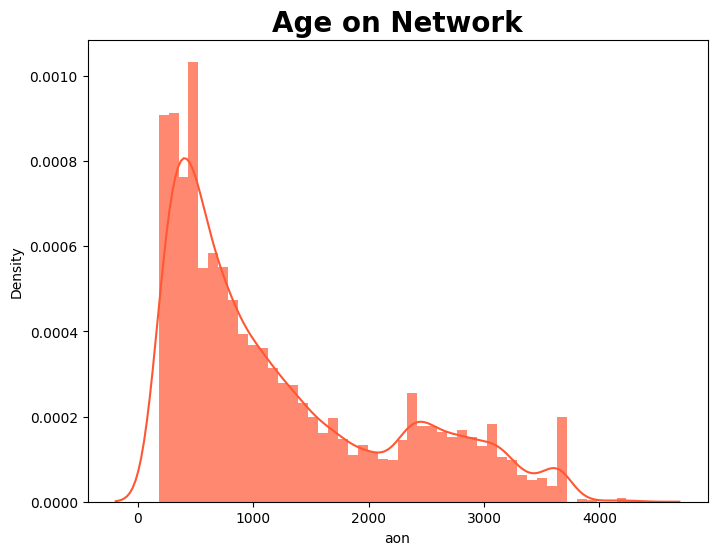

In [67]:
plt.figure(figsize=(8,6))
ax=sns.distplot(telecom_1['aon'],color='#FF5733',hist_kws={"alpha": 0.7})
ax.set_title('Age on Network',fontweight='bold',size=20)
plt.show()

`For most of the customers Age on Network is around 800-900 days. There are outliers too as the maximum value is 4321.`

## Categorical columns

In [68]:
# Function to plot columns related to minutes of usage with month
def plot_Churn_Mou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=telecom_1.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='#F1948A')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

In [69]:
# Function to plot columns related to minutes of usage with month
def plot_Churn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(telecom_1.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='#F1948A')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()

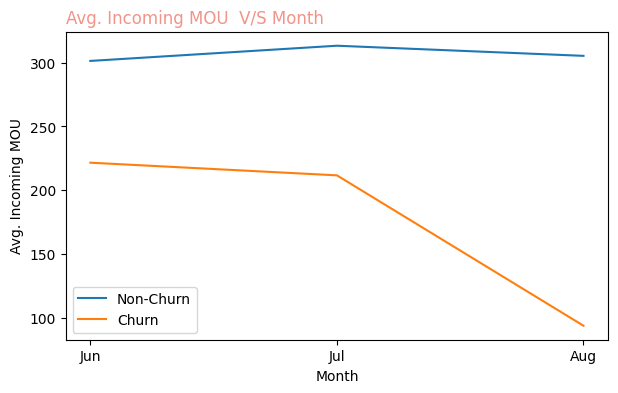

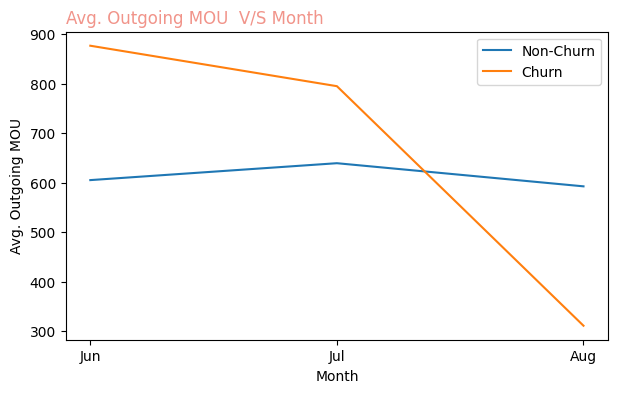

In [70]:
ic_mou = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_mou = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_Churn_Mou(ic_mou,'Incoming')
plot_Churn_Mou(og_mou,'Outgoing')

`Significant drop in total incoming calls and total outgoing calls for churn customers , however for non churn customer its increasing.`

### Spliting the data into train and test

In [71]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
telecom_1_train, telecom_1_test = train_test_split(telecom_1, train_size = 0.8, random_state = 100)

In [72]:
telecom_1_train.shape, telecom_1_test.shape

((22803, 126), (5701, 126))

### Rescaling the Features

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

Using MinMax scaling.

In [73]:
from sklearn.preprocessing import MinMaxScaler

# Selecting only the numeric columns for scaling
numeric_columns = telecom_1_train.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()

# Scaling only the numeric columns
telecom_1_train[numeric_columns] = scaler.fit_transform(telecom_1_train[numeric_columns])

In [74]:
telecom_1_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
29085  0.088367  0.066977  0.038413     0.029319     0.027910     0.006815   
54837  0.076487  0.061328  0.033913     0.001307     0.000862     0.002357   
83394  0.086209  0.067997  0.043955     0.074644     0.055519     0.060259   
25715  0.078805  0.064937  0.041220     0.007091     0.009891     0.010558   
62063  0.069162  0.073702  0.062342     0.000167     0.223166     0.273936   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
29085      0.052150      0.031202      0.020960       0.025489            0.0   
54837      0.015276      0.013332      0.004822       0.000000            0.0   
83394      0.055746      0.028760      0.004413       0.000000            0.0   
25715      0.019473      0.023661      0.017285       0.000000            0.0   
62063      0.001079      0.008404      0.008432       0.000551            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
29085       0.000000       0.023560       0.000000       0.000000   
54837       0.000000       0.000000       0.000000       0.000000   
83394       0.004679       0.000000       0.000000       0.040173   
25715       0.000000       0.000000       0.000000       0.000000   
62063       0.000000       0.002315       0.026335       0.000000   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
29085          0.023414          0.030765          0.006815          0.059502   
54837          0.001499          0.000950          0.002357          0.018481   
83394          0.029863          0.030070          0.004563          0.070243   
25715          0.007631          0.010903          0.009645          0.028207   
62063          0.000000          0.009584          0.012889          0.000000   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
29085          0.060681          0.056543          0.010013          0.008851   
54837          0.012977          0.007163          0.005791          0.007924   
83394          0.049375          0.006720          0.009468          0.013256   
25715          0.048860          0.046824          0.000546          0.001387   
62063          0.011977          0.015855          0.000000          0.000418   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
29085          0.001109               0.0           0.00000          0.000000   
54837          0.022736               0.0           0.00000          0.000000   
83394          0.004179               0.0           0.00000          0.000000   
25715          0.000000               0.0           0.00000          0.000000   
62063          0.001777               0.0           0.03063          0.006626   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
29085      0.041969      0.067078      0.032142          0.000000   
54837      0.009918      0.009858      0.007429          0.000000   
83394      0.050565      0.060383      0.007816          0.048138   
25715      0.017221      0.039744      0.030438          0.000438   
62063      0.000000      0.016419      0.019829          0.000000   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
29085          0.000000          0.000000          0.004841          0.000623   
54837          0.000000          0.000000          0.000124          0.000000   
83394          0.027873          0.059347          0.004065          0.003442   
25715          0.000000          0.001224          0.000212          0.000473   
62063          0.209468          0.350232          0.000000          0.000548   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
29085          0.000000          0.008512          0.006628          0.000000   
54837          0.000000          0.015337          0.038760          0.016753   
83394          0.000468         

In [75]:
telecom_1_test[numeric_columns] = scaler.transform(telecom_1_test[numeric_columns])
telecom_1_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
23592  0.075743  0.061142  0.033622     0.000000     0.000000     0.000000   
29640  0.071540  0.056424  0.030622     0.000000     0.000000     0.000000   
11357  0.090155  0.058381  0.028360     0.008919     0.010586     0.002233   
37103  0.081878  0.070608  0.044474     0.039739     0.040016     0.025690   
17466  0.091296  0.065425  0.038466     0.317901     0.233367     0.121239   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
23592      0.000000      0.000000      0.000000            0.0            0.0   
29640      0.001201      0.000000      0.000000            0.0            0.0   
11357      0.013340      0.017264      0.002252            0.0            0.0   
37103      0.028443      0.015489      0.017728            0.0            0.0   
17466      0.093800      0.062193      0.045425            0.0            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
23592            0.0            0.0            0.0            0.0   
29640            0.0            0.0            0.0            0.0   
11357            0.0            0.0            0.0            0.0   
37103            0.0            0.0            0.0            0.0   
17466            0.0            0.0            0.0            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
23592          0.000000          0.000000          0.000000          0.000000   
29640          0.000000          0.000000          0.000000          0.000000   
11357          0.010230          0.011669          0.002233          0.017631   
37103          0.021576          0.017594          0.011140          0.016299   
17466          0.364631          0.257242          0.121239          0.117520   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
23592          0.000000          0.000000          0.000000          0.000000   
29640          0.000000          0.000000          0.000000          0.000000   
11357          0.035939          0.006065          0.000000          0.000000   
37103          0.018845          0.036017          0.000000          0.000359   
17466          0.099369          0.084371          0.000211          0.000000   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
23592          0.000000               0.0               0.0          0.000000   
29640          0.000000               0.0               0.0          0.000000   
11357          0.000442               0.0               0.0          0.000000   
37103          0.000000               0.0               0.0          0.017603   
17466          0.000000               0.0               0.0          0.000000   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
23592      0.000000      0.000000      0.000000          0.000000   
29640      0.000000      0.000000      0.000000          0.000000   
11357      0.014017      0.032592      0.004939          0.000000   
37103      0.020281      0.028213      0.027036          0.020957   
17466      0.272585      0.307059      0.156000          0.000000   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
23592          0.000000           0.00000          0.000000          0.000000   
29640          0.000000           0.00000          0.000000          0.000000   
11357          0.000000           0.00000          0.000000          0.000335   
37103          0.024126           0.01952          0.018807          0.006829   
17466          0.000000           0.00000          0.015071          0.015679   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
23592          0.000000               0.0          0.000000          0.000000   
29640          0.000000               0.0          0.000000          0.000000   
11357          0.000000         

In [76]:
telecom_1_train.shape, telecom_1_test.shape

((22803, 126), (5701, 126))

### Diving the dataset to X and y for the model building

In [77]:
y_train = telecom_1_train.pop('churn')
X_train = telecom_1_train

In [78]:
y_train.head()

29085    0.0
54837    0.0
83394    0.0
25715    0.0
62063    0.0
Name: churn, dtype: float64

In [79]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
29085  0.088367  0.066977  0.038413     0.029319     0.027910     0.006815   
54837  0.076487  0.061328  0.033913     0.001307     0.000862     0.002357   
83394  0.086209  0.067997  0.043955     0.074644     0.055519     0.060259   
25715  0.078805  0.064937  0.041220     0.007091     0.009891     0.010558   
62063  0.069162  0.073702  0.062342     0.000167     0.223166     0.273936   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
29085      0.052150      0.031202      0.020960       0.025489            0.0   
54837      0.015276      0.013332      0.004822       0.000000            0.0   
83394      0.055746      0.028760      0.004413       0.000000            0.0   
25715      0.019473      0.023661      0.017285       0.000000            0.0   
62063      0.001079      0.008404      0.008432       0.000551            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
29085       0.000000       0.023560       0.000000       0.000000   
54837       0.000000       0.000000       0.000000       0.000000   
83394       0.004679       0.000000       0.000000       0.040173   
25715       0.000000       0.000000       0.000000       0.000000   
62063       0.000000       0.002315       0.026335       0.000000   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
29085          0.023414          0.030765          0.006815          0.059502   
54837          0.001499          0.000950          0.002357          0.018481   
83394          0.029863          0.030070          0.004563          0.070243   
25715          0.007631          0.010903          0.009645          0.028207   
62063          0.000000          0.009584          0.012889          0.000000   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
29085          0.060681          0.056543          0.010013          0.008851   
54837          0.012977          0.007163          0.005791          0.007924   
83394          0.049375          0.006720          0.009468          0.013256   
25715          0.048860          0.046824          0.000546          0.001387   
62063          0.011977          0.015855          0.000000          0.000418   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
29085          0.001109               0.0           0.00000          0.000000   
54837          0.022736               0.0           0.00000          0.000000   
83394          0.004179               0.0           0.00000          0.000000   
25715          0.000000               0.0           0.00000          0.000000   
62063          0.001777               0.0           0.03063          0.006626   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
29085      0.041969      0.067078      0.032142          0.000000   
54837      0.009918      0.009858      0.007429          0.000000   
83394      0.050565      0.060383      0.007816          0.048138   
25715      0.017221      0.039744      0.030438          0.000438   
62063      0.000000      0.016419      0.019829          0.000000   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
29085          0.000000          0.000000          0.004841          0.000623   
54837          0.000000          0.000000          0.000124          0.000000   
83394          0.027873          0.059347          0.004065          0.003442   
25715          0.000000          0.001224          0.000212          0.000473   
62063          0.209468          0.350232          0.000000          0.000548   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
29085          0.000000          0.008512          0.006628          0.000000   
54837          0.000000          0.015337          0.038760          0.016753   
83394          0.000468         

In [80]:
y_test = telecom_1_test.pop('churn')
X_test = telecom_1_test

In [81]:
y_test.head()

23592    0.0
29640    0.0
11357    0.0
37103    0.0
17466    0.0
Name: churn, dtype: float64

In [82]:
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
23592  0.075743  0.061142  0.033622     0.000000     0.000000     0.000000   
29640  0.071540  0.056424  0.030622     0.000000     0.000000     0.000000   
11357  0.090155  0.058381  0.028360     0.008919     0.010586     0.002233   
37103  0.081878  0.070608  0.044474     0.039739     0.040016     0.025690   
17466  0.091296  0.065425  0.038466     0.317901     0.233367     0.121239   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
23592      0.000000      0.000000      0.000000            0.0            0.0   
29640      0.001201      0.000000      0.000000            0.0            0.0   
11357      0.013340      0.017264      0.002252            0.0            0.0   
37103      0.028443      0.015489      0.017728            0.0            0.0   
17466      0.093800      0.062193      0.045425            0.0            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
23592            0.0            0.0            0.0            0.0   
29640            0.0            0.0            0.0            0.0   
11357            0.0            0.0            0.0            0.0   
37103            0.0            0.0            0.0            0.0   
17466            0.0            0.0            0.0            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
23592          0.000000          0.000000          0.000000          0.000000   
29640          0.000000          0.000000          0.000000          0.000000   
11357          0.010230          0.011669          0.002233          0.017631   
37103          0.021576          0.017594          0.011140          0.016299   
17466          0.364631          0.257242          0.121239          0.117520   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
23592          0.000000          0.000000          0.000000          0.000000   
29640          0.000000          0.000000          0.000000          0.000000   
11357          0.035939          0.006065          0.000000          0.000000   
37103          0.018845          0.036017          0.000000          0.000359   
17466          0.099369          0.084371          0.000211          0.000000   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
23592          0.000000               0.0               0.0          0.000000   
29640          0.000000               0.0               0.0          0.000000   
11357          0.000442               0.0               0.0          0.000000   
37103          0.000000               0.0               0.0          0.017603   
17466          0.000000               0.0               0.0          0.000000   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
23592      0.000000      0.000000      0.000000          0.000000   
29640      0.000000      0.000000      0.000000          0.000000   
11357      0.014017      0.032592      0.004939          0.000000   
37103      0.020281      0.028213      0.027036          0.020957   
17466      0.272585      0.307059      0.156000          0.000000   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
23592          0.000000           0.00000          0.000000          0.000000   
29640          0.000000           0.00000          0.000000          0.000000   
11357          0.000000           0.00000          0.000000          0.000335   
37103          0.024126           0.01952          0.018807          0.006829   
17466          0.000000           0.00000          0.015071          0.015679   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
23592          0.000000               0.0          0.000000          0.000000   
29640          0.000000               0.0          0.000000          0.000000   
11357          0.000000         

### Building the Logistic Regression Model

In [83]:
# Model 1
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_const, family = sm.families.Binomial())
result = logm1.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22803
Model:                            GLM   Df Residuals:                    22677
Model Family:                Binomial   Df Model:                          125
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3461.2
Date:                Tue, 05 Nov 2024   Deviance:                       6922.3
Time:                        07:37:42   Pearson chi2:                 4.47e+08
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1215
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1824      0

In [84]:
### Feature selection using RFE

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter = 1000)

rfe = RFE(estimator = logreg, n_features_to_select = 30)
rfe  = rfe.fit(X_train, y_train)

In [86]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 34),
 ('arpu_7', False, 27),
 ('arpu_8', False, 7),
 ('onnet_mou_6', False, 15),
 ('onnet_mou_7', False, 39),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 50),
 ('offnet_mou_7', False, 16),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', False, 8),
 ('roam_ic_mou_8', False, 17),
 ('roam_og_mou_6', False, 9),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 59),
 ('loc_og_t2t_mou_7', False, 90),
 ('loc_og_t2t_mou_8', False, 20),
 ('loc_og_t2m_mou_6', False, 31),
 ('loc_og_t2m_mou_7', False, 96),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 78),
 ('loc_og_t2f_mou_7', False, 72),
 ('loc_og_t2f_mou_8', False, 24),
 ('loc_og_t2c_mou_6', False, 61),
 ('loc_og_t2c_mou_7', False, 62),
 ('loc_og_t2c_mou_8', False, 67),
 ('loc_og_mou_6', False, 73),
 ('loc_og_mou_7', False, 77),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 46),
 ('std_og_t2t_mou_7', False, 54),
 ('std_og_t2t_mo

In [87]:
print("Selected Features are :", X_train.columns[rfe.support_])

Selected Features are : Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g'],
      dtype='object')


In [88]:
col = X_train.columns[rfe.support_]
col

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g'],
      dtype='object')

In [89]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6',
       'std_ic_t

In [90]:
#Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22803
Model:                            GLM   Df Residuals:                    22772
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3659.7
Date:                Tue, 05 Nov 2024   Deviance:                       7319.5
Time:                        07:37:57   Pearson chi2:                 1.25e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1061
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5763      0

### Checking for VIFs

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_sm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
13      total_og_mou_8  5879.40
11        std_og_mou_8  4244.11
1         offnet_mou_8  2682.45
0          onnet_mou_8  2306.26
7     std_og_t2t_mou_8  1799.80
8     std_og_t2m_mou_8  1642.38
6         loc_og_mou_8   251.54
16        loc_ic_mou_8    91.11
4        roam_og_mou_8    83.14
5     loc_og_t2m_mou_8    77.62
15    loc_ic_t2m_mou_8    44.45
12      total_og_mou_7    25.48
10        std_og_mou_7    20.90
14    loc_ic_t2t_mou_8    18.87
19      total_ic_mou_8    12.51
18      total_ic_mou_7     8.11
22    total_rech_num_8     7.88
21    total_rech_num_7     7.27
17      total_ic_mou_6     5.23
9         std_og_mou_6     3.26
25         vol_3g_mb_8     2.89
28        monthly_3g_8     2.20
29          aug_vbc_3g     1.99
3        roam_og_mou_7     1.81
27         sachet_2g_8     1.59
23  last_day_rch_amt_8     1.55
26        monthly_2g_8     1.51
24         vol_2g_mb_8     1.42
2        roam_ic_mou_6     1.26
20        spl_ic_mou_8     1.07

In [92]:
#Model 3: Removing column 'total_og_mou_8' as it has high VIF and p-value

col = col.drop('total_og_mou_8',1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22803
Model:                            GLM   Df Residuals:                    22773
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3660.8
Date:                Tue, 05 Nov 2024   Deviance:                       7321.6
Time:                        07:38:00   Pearson chi2:                 1.04e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1060
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5782      0

In [93]:
vif = pd.DataFrame()
X = X_train_sm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
11        std_og_mou_8  4243.14
7     std_og_t2t_mou_8  1799.39
8     std_og_t2m_mou_8  1642.22
0          onnet_mou_8   350.89
6         loc_og_mou_8   251.53
1         offnet_mou_8   138.93
15        loc_ic_mou_8    91.07
5     loc_og_t2m_mou_8    77.60
14    loc_ic_t2m_mou_8    44.44
12      total_og_mou_7    25.42
10        std_og_mou_7    20.87
13    loc_ic_t2t_mou_8    18.87
18      total_ic_mou_8    12.48
17      total_ic_mou_7     8.10
21    total_rech_num_8     7.80
20    total_rech_num_7     7.27
4        roam_og_mou_8     6.94
16      total_ic_mou_6     5.23
9         std_og_mou_6     3.26
24         vol_3g_mb_8     2.89
27        monthly_3g_8     2.20
28          aug_vbc_3g     1.99
3        roam_og_mou_7     1.81
26         sachet_2g_8     1.58
22  last_day_rch_amt_8     1.55
25        monthly_2g_8     1.51
23         vol_2g_mb_8     1.42
2        roam_ic_mou_6     1.26
19        spl_ic_mou_8     1.07

In [94]:
# Model 4 : Removing 'loc_og_t2m_mou_8' as it has high p-value and VIF
col = col.drop('std_og_mou_8',1)
col

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'total_og_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'aug_vbc_3g'],
      dtype='object')

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22803
Model:                            GLM   Df Residuals:                    22774
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3661.5
Date:                Tue, 05 Nov 2024   Deviance:                       7323.0
Time:                        07:38:02   Pearson chi2:                 1.01e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1059
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5814      0

In [96]:
vif = pd.DataFrame()
X = X_train_sm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0          onnet_mou_8  349.00
6         loc_og_mou_8  250.43
7     std_og_t2t_mou_8  239.87
1         offnet_mou_8  133.06
14        loc_ic_mou_8   91.06
5     loc_og_t2m_mou_8   77.46
8     std_og_t2m_mou_8   74.39
13    loc_ic_t2m_mou_8   44.44
11      total_og_mou_7   25.34
10        std_og_mou_7   20.80
12    loc_ic_t2t_mou_8   18.87
17      total_ic_mou_8   12.44
16      total_ic_mou_7    8.10
20    total_rech_num_8    7.79
19    total_rech_num_7    7.27
4        roam_og_mou_8    6.80
15      total_ic_mou_6    5.23
9         std_og_mou_6    3.26
23         vol_3g_mb_8    2.89
26        monthly_3g_8    2.20
27          aug_vbc_3g    1.99
3        roam_og_mou_7    1.81
25         sachet_2g_8    1.58
21  last_day_rch_amt_8    1.54
24        monthly_2g_8    1.51
22         vol_2g_mb_8    1.42
2        roam_ic_mou_6    1.26
18        spl_ic_mou_8    1.07

In [97]:
# Model 5 : Removing 'offnet_mou_8' as it has high p-value and VIF
col = col.drop('offnet_mou_8',1)
col

Index(['onnet_mou_8', 'roam_ic_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'total_og_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'aug_vbc_3g'],
      dtype='object')

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22803
Model:                            GLM   Df Residuals:                    22775
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3662.6
Date:                Tue, 05 Nov 2024   Deviance:                       7325.2
Time:                        07:38:06   Pearson chi2:                 1.06e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1059
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5800      0

In [99]:
vif = pd.DataFrame()
X = X_train_sm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0          onnet_mou_8  239.38
5         loc_og_mou_8  179.67
6     std_og_t2t_mou_8  166.22
13        loc_ic_mou_8   91.03
4     loc_og_t2m_mou_8   77.43
12    loc_ic_t2m_mou_8   44.44
10      total_og_mou_7   23.87
9         std_og_mou_7   19.97
11    loc_ic_t2t_mou_8   18.86
16      total_ic_mou_8   12.38
15      total_ic_mou_7    8.08
19    total_rech_num_8    7.72
18    total_rech_num_7    7.25
14      total_ic_mou_6    5.23
8         std_og_mou_6    3.26
22         vol_3g_mb_8    2.89
3        roam_og_mou_8    2.87
7     std_og_t2m_mou_8    2.46
25        monthly_3g_8    2.20
26          aug_vbc_3g    1.99
2        roam_og_mou_7    1.81
24         sachet_2g_8    1.58
20  last_day_rch_amt_8    1.52
23        monthly_2g_8    1.51
21         vol_2g_mb_8    1.42
1        roam_ic_mou_6    1.26
17        spl_ic_mou_8    1.07

In [100]:
# Model 6 :Dropping 'onnet_mou_8' as it has high VIF and p-value
col = col.drop('onnet_mou_8',1)
col

Index(['roam_ic_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'total_og_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g'],
      dtype='object')

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22803
Model:                            GLM   Df Residuals:                    22776
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3662.6
Date:                Tue, 05 Nov 2024   Deviance:                       7325.3
Time:                        07:38:09   Pearson chi2:                 1.07e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1059
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5798      0

In [102]:
vif = pd.DataFrame()
X = X_train_sm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12        loc_ic_mou_8  89.28
11    loc_ic_t2m_mou_8  43.54
9       total_og_mou_7  23.87
8         std_og_mou_7  19.97
10    loc_ic_t2t_mou_8  18.45
15      total_ic_mou_8  12.37
14      total_ic_mou_7   8.08
4         loc_og_mou_8   7.88
18    total_rech_num_8   7.72
17    total_rech_num_7   7.25
13      total_ic_mou_6   5.23
3     loc_og_t2m_mou_8   4.33
7         std_og_mou_6   3.26
21         vol_3g_mb_8   2.89
5     std_og_t2t_mou_8   2.51
6     std_og_t2m_mou_8   2.46
24        monthly_3g_8   2.20
25          aug_vbc_3g   1.99
1        roam_og_mou_7   1.81
2        roam_og_mou_8   1.66
23         sachet_2g_8   1.58
19  last_day_rch_amt_8   1.51
22        monthly_2g_8   1.51
20         vol_2g_mb_8   1.42
0        roam_ic_mou_6   1.26
16        spl_ic_mou_8   1.07

In [103]:
# Model 7: Dropping 'roam_og_mou_8' as it has high p-value
col = col.drop('roam_og_mou_8',1)
col

Index(['roam_ic_mou_6', 'roam_og_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'total_og_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g'],
      dtype='object')

In [104]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22803
Model:                            GLM   Df Residuals:                    22777
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3662.8
Date:                Tue, 05 Nov 2024   Deviance:                       7325.5
Time:                        07:38:10   Pearson chi2:                 1.09e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1058
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5810      0

In [105]:
vif = pd.DataFrame()
X = X_train_sm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
11        loc_ic_mou_8  89.27
10    loc_ic_t2m_mou_8  43.53
8       total_og_mou_7  23.73
7         std_og_mou_7  19.96
9     loc_ic_t2t_mou_8  18.45
14      total_ic_mou_8  12.33
13      total_ic_mou_7   8.05
3         loc_og_mou_8   7.85
17    total_rech_num_8   7.56
16    total_rech_num_7   7.15
12      total_ic_mou_6   5.23
2     loc_og_t2m_mou_8   4.33
6         std_og_mou_6   3.26
20         vol_3g_mb_8   2.89
4     std_og_t2t_mou_8   2.46
5     std_og_t2m_mou_8   2.42
23        monthly_3g_8   2.20
24          aug_vbc_3g   1.99
22         sachet_2g_8   1.58
18  last_day_rch_amt_8   1.51
21        monthly_2g_8   1.51
19         vol_2g_mb_8   1.42
1        roam_og_mou_7   1.26
0        roam_ic_mou_6   1.26
15        spl_ic_mou_8   1.07

In [106]:
# Model 8 : Dropping 'loc_og_t2m_mou_8' has it has high p-value and VIF
col = col.drop('loc_og_t2m_mou_8',1)
col

Index(['roam_ic_mou_6', 'roam_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'total_og_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'aug_vbc_3g'],
      dtype='object')

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22803
Model:                            GLM   Df Residuals:                    22778
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3663.0
Date:                Tue, 05 Nov 2024   Deviance:                       7326.0
Time:                        07:38:12   Pearson chi2:                 1.09e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1058
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5818      0

In [108]:
vif = pd.DataFrame()
X = X_train_sm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
10        loc_ic_mou_8  89.27
9     loc_ic_t2m_mou_8  43.26
7       total_og_mou_7  23.71
6         std_og_mou_7  19.95
8     loc_ic_t2t_mou_8  18.42
13      total_ic_mou_8  12.33
12      total_ic_mou_7   8.05
16    total_rech_num_8   7.54
15    total_rech_num_7   7.15
2         loc_og_mou_8   5.63
11      total_ic_mou_6   5.23
5         std_og_mou_6   3.26
19         vol_3g_mb_8   2.89
3     std_og_t2t_mou_8   2.46
4     std_og_t2m_mou_8   2.42
22        monthly_3g_8   2.20
23          aug_vbc_3g   1.99
21         sachet_2g_8   1.58
20        monthly_2g_8   1.51
17  last_day_rch_amt_8   1.49
18         vol_2g_mb_8   1.42
1        roam_og_mou_7   1.26
0        roam_ic_mou_6   1.26
14        spl_ic_mou_8   1.07

In [109]:
#Model 9 : Dropping high VIF's loc_ic_t2m_mou_8 as it has high p-value and VIF
col = col.drop(['loc_ic_t2m_mou_8'],1)
col

Index(['roam_ic_mou_6', 'roam_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'total_og_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g'],
      dtype='object')

In [110]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22803
Model:                            GLM   Df Residuals:                    22779
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3663.2
Date:                Tue, 05 Nov 2024   Deviance:                       7326.4
Time:                        07:38:14   Pearson chi2:                 1.12e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1058
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5823      0

In [111]:
vif = pd.DataFrame()
X = X_train_sm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7       total_og_mou_7  23.71
6         std_og_mou_7  19.95
12      total_ic_mou_8  12.31
9         loc_ic_mou_8  10.52
11      total_ic_mou_7   8.04
15    total_rech_num_8   7.54
14    total_rech_num_7   7.15
2         loc_og_mou_8   5.63
10      total_ic_mou_6   5.23
5         std_og_mou_6   3.26
18         vol_3g_mb_8   2.89
3     std_og_t2t_mou_8   2.46
4     std_og_t2m_mou_8   2.42
8     loc_ic_t2t_mou_8   2.25
21        monthly_3g_8   2.20
22          aug_vbc_3g   1.99
20         sachet_2g_8   1.58
19        monthly_2g_8   1.51
16  last_day_rch_amt_8   1.48
17         vol_2g_mb_8   1.42
1        roam_og_mou_7   1.26
0        roam_ic_mou_6   1.26
13        spl_ic_mou_8   1.07

In [112]:
#Model 10 : Dropping 'aug_vbc_3g' as it has high p-value
col = col.drop('aug_vbc_3g',1)
col

Index(['roam_ic_mou_6', 'roam_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'total_og_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22803
Model:                            GLM   Df Residuals:                    22780
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3664.2
Date:                Tue, 05 Nov 2024   Deviance:                       7328.3
Time:                        07:38:15   Pearson chi2:                 7.13e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1057
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5934      0

In [114]:
vif = pd.DataFrame()
X = X_train_sm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7       total_og_mou_7  23.71
6         std_og_mou_7  19.95
12      total_ic_mou_8  12.30
9         loc_ic_mou_8  10.52
11      total_ic_mou_7   8.04
15    total_rech_num_8   7.53
14    total_rech_num_7   7.14
2         loc_og_mou_8   5.63
10      total_ic_mou_6   5.22
5         std_og_mou_6   3.26
3     std_og_t2t_mou_8   2.46
4     std_og_t2m_mou_8   2.42
18         vol_3g_mb_8   2.30
8     loc_ic_t2t_mou_8   2.25
21        monthly_3g_8   2.18
20         sachet_2g_8   1.58
16  last_day_rch_amt_8   1.48
19        monthly_2g_8   1.48
17         vol_2g_mb_8   1.42
1        roam_og_mou_7   1.26
0        roam_ic_mou_6   1.26
13        spl_ic_mou_8   1.07

In [115]:
#Model 11: Dropping 'total_og_mou_7' as it has high VIF
col = col.drop('total_og_mou_7',1)
col

Index(['roam_ic_mou_6', 'roam_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')

In [116]:
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22803
Model:                            GLM   Df Residuals:                    22781
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3671.3
Date:                Tue, 05 Nov 2024   Deviance:                       7342.5
Time:                        07:38:17   Pearson chi2:                 7.13e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1052
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5691      0

In [117]:
vif = pd.DataFrame()
X = X_train_sm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
11      total_ic_mou_8  12.10
8         loc_ic_mou_8  10.52
10      total_ic_mou_7   7.76
14    total_rech_num_8   7.38
13    total_rech_num_7   6.79
6         std_og_mou_7   6.37
9       total_ic_mou_6   5.22
5         std_og_mou_6   3.26
3     std_og_t2t_mou_8   2.46
4     std_og_t2m_mou_8   2.42
17         vol_3g_mb_8   2.30
7     loc_ic_t2t_mou_8   2.25
20        monthly_3g_8   2.18
2         loc_og_mou_8   1.93
19         sachet_2g_8   1.58
18        monthly_2g_8   1.48
15  last_day_rch_amt_8   1.47
16         vol_2g_mb_8   1.42
1        roam_og_mou_7   1.26
0        roam_ic_mou_6   1.26
12        spl_ic_mou_8   1.07

In [118]:
#Model 12 : Dropping 'total_ic_mou_8' as it has high VIF
col = col.drop('total_ic_mou_8',1)
col

Index(['roam_ic_mou_6', 'roam_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'spl_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8'],
      dtype='object')

In [119]:
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22803
Model:                            GLM   Df Residuals:                    22782
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3706.7
Date:                Tue, 05 Nov 2024   Deviance:                       7413.4
Time:                        07:38:18   Pearson chi2:                 2.11e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1024
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5294      0

In [120]:
vif = pd.DataFrame()
X = X_train_sm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13    total_rech_num_8  7.35
12    total_rech_num_7  6.74
10      total_ic_mou_7  6.58
6         std_og_mou_7  6.37
8         loc_ic_mou_8  5.81
9       total_ic_mou_6  5.17
5         std_og_mou_6  3.26
3     std_og_t2t_mou_8  2.45
4     std_og_t2m_mou_8  2.39
16         vol_3g_mb_8  2.30
7     loc_ic_t2t_mou_8  2.24
19        monthly_3g_8  2.18
2         loc_og_mou_8  1.92
18         sachet_2g_8  1.58
17        monthly_2g_8  1.48
14  last_day_rch_amt_8  1.47
15         vol_2g_mb_8  1.42
1        roam_og_mou_7  1.26
0        roam_ic_mou_6  1.26
11        spl_ic_mou_8  1.07

In [121]:
# getting the predicted values

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

29085    0.006611
54837    0.017135
83394    0.029511
25715    0.006208
62063    0.005350
55512    0.174304
16270    0.092352
13248    0.015028
98582    0.005256
41822    0.115786
dtype: float64

In [122]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00661077, 0.01713528, 0.02951075, 0.00620761, 0.00534957,
       0.17430375, 0.09235242, 0.01502785, 0.00525627, 0.11578579])

In [123]:
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final["Mobile Number"] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number
0    0.0    0.006611          29085
1    0.0    0.017135          54837
2    0.0    0.029511          83394
3    0.0    0.006208          25715
4    0.0    0.005350          62063

In [124]:
y_train_pred_final["Predicted"] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number  Predicted
0    0.0    0.006611          29085          0
1    0.0    0.017135          54837          0
2    0.0    0.029511          83394          0
3    0.0    0.006208          25715          0
4    0.0    0.005350          62063          0

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion = confusion_matrix(y_train_pred_final.Churn,  y_train_pred_final.Predicted)
print(confusion)

[[21415   105]
 [ 1190    93]]


## **We see a clearly it's a imbalance dataset**

Logistic Regression assumes a linear relationship between the features and the log-odds of the target variable. SMOTE creates synthetic samples by interpolating between existing minority class samples, which might not respect this linearity. The new samples could lie in regions of the feature space that do not accurately reflect the underlying data distribution.

As our dataset has a high number of features relative to the number of samples, SMOTE can create synthetic samples in sparse regions of the feature space. This can lead to overfitting, especially for Logistic Regression, which might struggle to generalize well on unseen data.

Logistic Regression can be sensitive to multicollinearity among features. If SMOTE introduces new synthetic samples that exacerbate this issue, it may affect the model's interpretability and performance.

Hence will do GridSearchCV and SMOTE in the Decision Tree Classifier Model and get the best estimators.

In [126]:
print(accuracy_score(y_train_pred_final.Churn,  y_train_pred_final.Predicted))

0.9432092268561154


**Metrics beyond simply accuracy**

In [127]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.0724863600935308

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.9951208178438662

In [130]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.004879182156133829


In [131]:
# positive predictive value
print (TP / float(TP+FP))

0.4696969696969697


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9473567794735678


# **Plotting the ROC Curve**
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

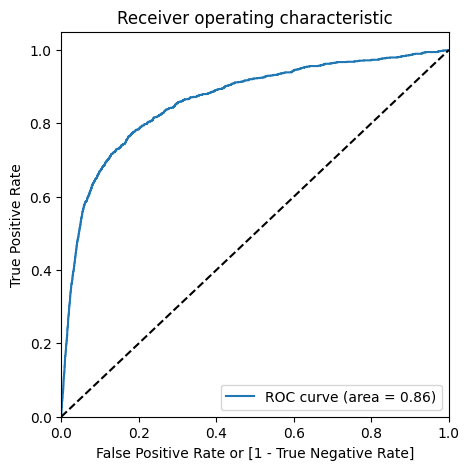

In [134]:
from sklearn import metrics

# Calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate=False)

# Assuming draw_roc is a custom function you've defined for plotting
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

# **Finding Optimal Cutoff Point**
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity



In [135]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0    0.0    0.006611          29085          0    1    0    0    0    0    0   
1    0.0    0.017135          54837          0    1    0    0    0    0    0   
2    0.0    0.029511          83394          0    1    0    0    0    0    0   
3    0.0    0.006208          25715          0    1    0    0    0    0    0   
4    0.0    0.005350          62063          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.056265     1.000000     0.000000
0.1          0.1  0.864798     0.710055     0.874024
0.2          0.2  0.931062     0.481684     0.957853
0.3          0.3  0.941280     0.282931     0.980530
0.4          0.4  0.943165     0.143414     0.990846
0.5          0.5  0.943209     0.072486     0.995121
0.6          0.6  0.944042     0.037412     0.998095
0.7          0.7  0.944306     0.023383     0.999210
0.8          0.8  0.944042     0.010912     0.999675
0.9          0.9  0.943779     0.001559     0.999954


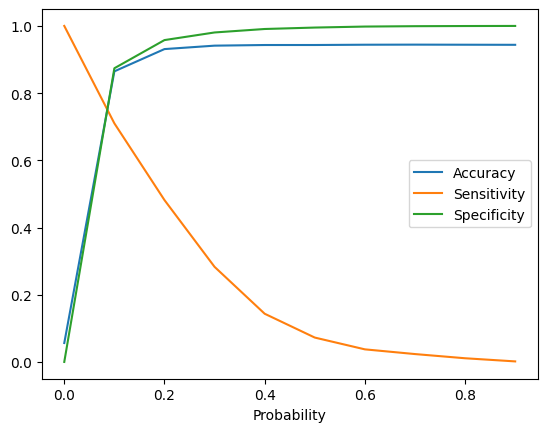

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [138]:
#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

y_train_pred_final['Final_Predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0    0.0    0.006611          29085          0    1    0    0    0    0    0   
1    0.0    0.017135          54837          0    1    0    0    0    0    0   
2    0.0    0.029511          83394          0    1    0    0    0    0    0   
3    0.0    0.006208          25715          0    1    0    0    0    0    0   
4    0.0    0.005350          62063          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  Final_Predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    0    0    0    0                0  
4    0    0    0    0                0

In [139]:
### Assigning Churned Month
y_train_pred_final['Churn_Month'] = y_train_pred_final.Churn_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0    0.0    0.006611          29085          0    1    0    0    0    0    0   
1    0.0    0.017135          54837          0    1    0    0    0    0    0   
2    0.0    0.029511          83394          0    1    0    0    0    0    0   
3    0.0    0.006208          25715          0    1    0    0    0    0    0   
4    0.0    0.005350          62063          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  Final_Predicted  Churn_Month  
0    0    0    0    0                0            1  
1    0    0    0    0                0            2  
2    0    0    0    0                0            3  
3    0    0    0    0                0            1  
4    0    0    0    0                0            1

In [140]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Final_Predicted)

0.8647984914265667

In [141]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Final_Predicted)
confusion2

array([[18809,  2711],
       [  372,   911]])

In [142]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7100545596258768

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.8740241635687732

In [145]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12597583643122676


In [146]:
# Positive predictive value
print (TP / float(TP+FP))

0.2515184980673661


In [147]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9806058078306658


# **Precision and Recall**


In [148]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Final_Predicted)
confusion

array([[18809,  2711],
       [  372,   911]])

In [149]:
##### Precision
TP / TP + FP

confusion[0,0]/(confusion[0,0]+confusion[0,1])

0.8740241635687732

In [150]:
##### Recall
TP / TP + FN

confusion[0,0]/(confusion[0,0]+confusion[1,0])

0.9806058078306658

In [151]:
from sklearn.metrics import precision_score, recall_score

print("Precision Score",precision_score(y_train_pred_final.Churn, y_train_pred_final.Final_Predicted))
print("Recall Score",recall_score(y_train_pred_final.Churn, y_train_pred_final.Final_Predicted))

Precision Score 0.2515184980673661
Recall Score 0.7100545596258768


# **Precision and recall tradeoff**


In [152]:
from sklearn.metrics import precision_recall_curve
print(y_train_pred_final[['Churn', 'Final_Predicted']].head(10))

   Churn  Final_Predicted
0    0.0                0
1    0.0                0
2    0.0                0
3    0.0                0
4    0.0                0
5    0.0                1
6    0.0                0
7    0.0                0
8    0.0                0
9    0.0                1


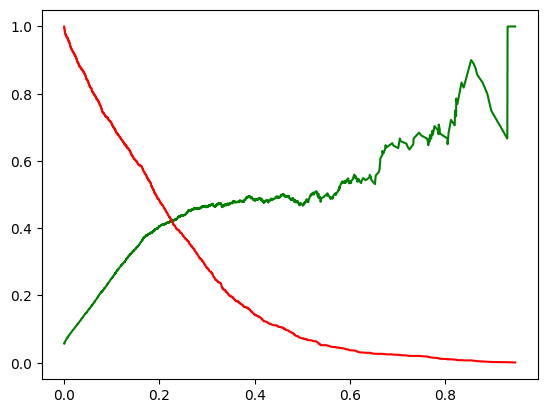

In [153]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# **Make predictions on the test data**

In [154]:
X_test = X_test[col]
X_test.head()

roam_ic_mou_6  roam_og_mou_7  loc_og_mou_8  std_og_t2t_mou_8  \
23592            0.0            0.0      0.000000           0.00000   
29640            0.0            0.0      0.000000           0.00000   
11357            0.0            0.0      0.004939           0.00000   
37103            0.0            0.0      0.027036           0.01952   
17466            0.0            0.0      0.156000           0.00000   

       std_og_t2m_mou_8  std_og_mou_6  std_og_mou_7  loc_ic_t2t_mou_8  \
23592          0.000000      0.000000      0.000000          0.003720   
29640          0.000000      0.000000      0.000000          0.000852   
11357          0.000000      0.000000      0.000284          0.001564   
37103          0.003945      0.036718      0.023740          0.012780   
17466          0.014436      0.012925      0.013563          0.001651   

       loc_ic_mou_8  total_ic_mou_6  total_ic_mou_7  spl_ic_mou_8  \
23592      0.157011        0.112264        0.089720           0.0   
29640      0.003429        0.001852        0.010536           0.0   
11357      0.005621        0.008253        0.013771           0.0   
37103      0.055952        0.021362        0.015356           0.0   
17466      0.076476        0.099643        0.065896           0.0   

       total_rech_num_7  total_rech_num_8  last_day_rch_amt_8  vol_2g_mb_8  \
23592          0.021739          0.010204            0.000000     0.000264   
29640          0.050725          0.045918            0.005619     0.041047   
11357          0.021739          0.005102            0.006743     0.000000   
37103          0.231884          0.132653            0.006743     0.000000   
17466          0.028986          0.015306            0.029220     0.000000   

       vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  
23592     0.016973           0.0     0.000000        0.0625  
29640     0.000000           0.0     0.159091        0.0000  
11357     0.000000           0.0     0.000000        0.0000  
37103     0.000000           0.0     0.000000        0.0000  
17466     0.000000           0.0     0.000000        0.0000

In [155]:
X_test_sm = sm.add_constant(X_test)

In [156]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

23592    0.000915
29640    0.031603
11357    0.148510
37103    0.018289
17466    0.002473
19210    0.008872
49970    0.031559
62178    0.000589
78564    0.030293
41544    0.006542
dtype: float64

In [157]:
# Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_test_pred_1.head()

0
23592  0.000915
29640  0.031603
11357  0.148510
37103  0.018289
17466  0.002473

In [158]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting Mobile Number to index
y_test_df['Mobile Number'] = y_test_df.index
# Removing index for both dataframes to append them side by side
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)
y_test_pred_final.head()

churn  Mobile Number         0
0    0.0          23592  0.000915
1    0.0          29640  0.031603
2    0.0          11357  0.148510
3    0.0          37103  0.018289
4    0.0          17466  0.002473

In [159]:
# Renaming the column
y_test_pred_final = y_test_pred_final.rename(columns={0: 'Churn_Prob'})

# Rearranging the columns
y_test_pred_final = y_test_pred_final[['Mobile Number', 'churn', 'Churn_Prob']]

# Let's see the head of y_pred_final
y_test_pred_final.head()

Mobile Number  churn  Churn_Prob
0          23592    0.0    0.000915
1          29640    0.0    0.031603
2          11357    0.0    0.148510
3          37103    0.0    0.018289
4          17466    0.0    0.002473

In [160]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_test_pred_final.head()

Mobile Number  churn  Churn_Prob  Final_Predicted
0          23592    0.0    0.000915                0
1          29640    0.0    0.031603                0
2          11357    0.0    0.148510                1
3          37103    0.0    0.018289                0
4          17466    0.0    0.002473                0

In [161]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.Final_Predicted)

0.8682687247851254

In [162]:
confusion = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.Final_Predicted)
confusion

array([[4727,  661],
       [  90,  223]])

In [163]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [164]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7100545596258768

In [165]:
# Let us calculate specificity
TN / float(TN+FP)

0.8740241635687732

In [166]:

# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.252262443438914

In [167]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7124600638977636

# **Random Tree(Default parameters)**

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus

# **Fit the DT model**

In [169]:
dt = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=10)

In [170]:
np.random.seed(0)
telecom_1_train, telecom_1_test = train_test_split(telecom_1, train_size=0.7, random_state=100)


In [171]:
scaler = MinMaxScaler()
X_train = telecom_1_train.drop(columns=["churn"])
X_test = telecom_1_test.drop(columns=["churn"])

In [172]:
y_train = telecom_1_train["churn"]
y_test = telecom_1_test["churn"]


In [173]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)

In [174]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns,
                class_names=['No Churn', "Churn"])

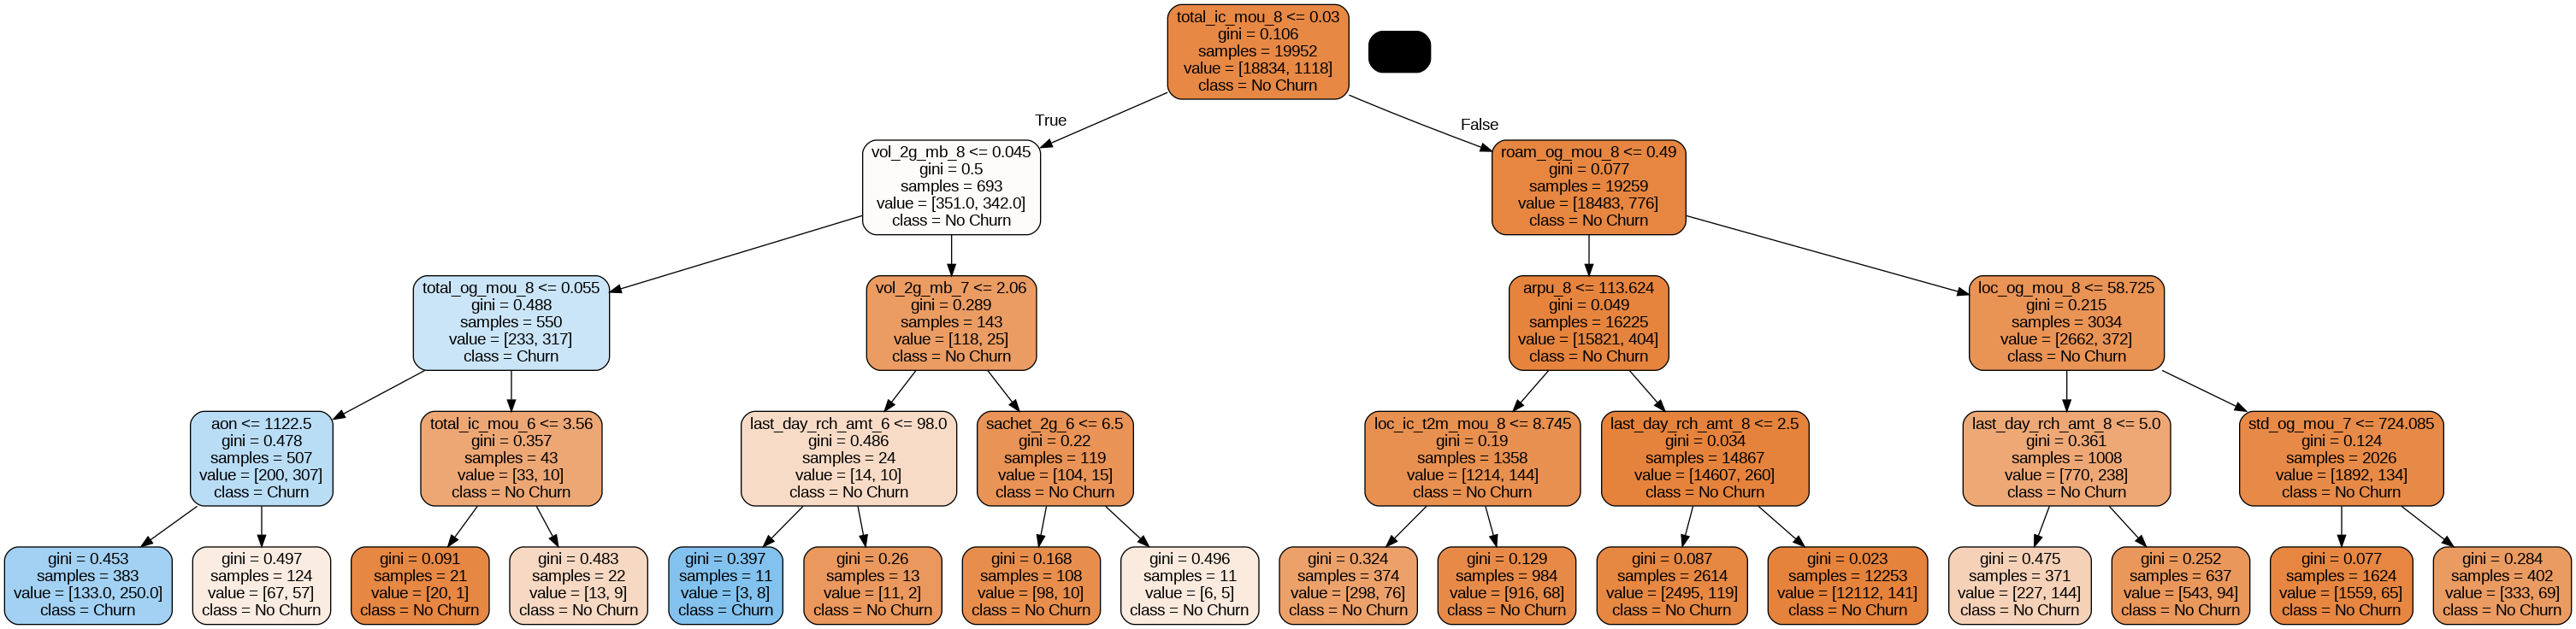

In [175]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [176]:
y_train_pred = dt.predict(X_train)

#### Evaluating model performance

In [177]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Confusion matrix and accuracy for training data
y_train_pred = dt.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix of Train data:\n", cm_train)
print('-' * 50)
print("Accuracy Score of Train data:", accuracy_score(y_train, y_train_pred))

Confusion Matrix of Train data:
 [[18698   136]
 [  860   258]]
--------------------------------------------------
Accuracy Score of Train data: 0.9500801924619086


In [178]:
# Confusion matrix and accuracy for testing data
y_test_pred = dt.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix of Test data:\n", cm_test)
print('-' * 50)
print("Accuracy Score of Test data:", accuracy_score(y_test, y_test_pred))

Confusion Matrix of Test data:
 [[8012   62]
 [ 367  111]]
--------------------------------------------------
Accuracy Score of Test data: 0.9498362956033677


### Hyper-parameter tuning and SMOTE

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
import numpy as np



#from sklearn.base import BaseEstimator, TransformerMixin
#from imblearn.over_sampling import SMOTE

#class SMOTETransformer(BaseEstimator, TransformerMixin):
 #   def __init__(self, random_state=None):
  #      self.random_state = random_state  # Save random_state
   #     self.smote = SMOTE(random_state=random_state)

    #def fit(self, X, y):
        # Fit SMOTE on the data (though SMOTE does not actually fit)
     #   return self

    #def transform(self, X, y):
        # Apply SMOTE and return the resampled data
     #   X_resampled, y_resampled = self.smote.fit_resample(X, y)
      #  return X_resampled, y_resampled



#pipeline = Pipeline([
 #   ('smote', SMOTETransformer(random_state=42)),
  #  ('classifier', DecisionTreeClassifier(random_state=42))
#])

dt = DecisionTreeClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

The parameter grid provided contains:
5 options for max_depth
4 options for min_samples_leaf
2 options for criterion

This results in a total of

5×4×2=40 combinations to evaluate, which is manageable for grid search.

In [180]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [181]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

We tried doing the SMOTE method but model was failing for "Fitting 4 folds for each of 24 candidates, totalling 96 fits" . Hence dropping SMOTE and going a ahead with only GridSearch CV .


We are using evaluation metrics that are less sensitive to class imbalance (e.g., F1-score, AUC-ROC), that might find that model performs well enough on the imbalanced dataset without needing to apply SMOTE.


SMOTE creates synthetic examples based on existing minority class examples. If the original data is noisy or has outliers, SMOTE can amplify these issues, potentially leading to overfitting on the synthetic data.



In [182]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.460441      0.013733         0.011703        0.003072   
1       0.457120      0.015571         0.010025        0.004084   
2       0.451083      0.008591         0.007696        0.000132   
3       0.437375      0.010786         0.007593        0.000073   
4       0.464537      0.030971         0.008686        0.001900   

  param_criterion  param_max_depth  param_min_samples_leaf  \
0            gini                2                       5   
1            gini                2                      10   
2            gini                2                      20   
3            gini                2                      50   
4            gini                2                     100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.946472   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.946472   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.946472   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.946472   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.946472   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.948677           0.949078           0.948075         0.948075   
1           0.948677           0.949078           0.948075         0.948075   
2           0.948677           0.949078           0.948075         0.948075   
3           0.948677           0.949078           0.948075         0.948075   
4           0.949078           0.949078           0.948075         0.948176   

   std_test_score  rank_test_score  
0        0.000992                8  
1        0.000992                8  
2        0.000992                8  
3        0.000992                8  
4        0.001066                7

In [183]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6       1.130883      0.109121         0.018210        0.002040   
7       0.874281      0.226368         0.007777        0.000094   
5       1.121406      0.106432         0.013367        0.002436   
9       0.634704      0.012963         0.007561        0.000065   
8       0.638001      0.007910         0.007587        0.000043   

  param_criterion  param_max_depth  param_min_samples_leaf  \
6            gini                3                      10   
7            gini                3                      20   
5            gini                3                       5   
9            gini                3                     100   
8            gini                3                      50   

                                              params  split0_test_score  \
6  {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.947674   
7  {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.947674   
5  {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.947674   
9  {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.947273   
8  {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.947273   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
6           0.950281           0.950080           0.948476         0.949128   
7           0.950281           0.950080           0.948476         0.949128   
5           0.950281           0.949078           0.948476         0.948877   
9           0.949078           0.949479           0.949479         0.948827   
8           0.949479           0.948877           0.947474         0.948276   

   std_test_score  rank_test_score  
6        0.001092                1  
7        0.001092                1  
5        0.000951                3  
9        0.000912                4  
8        0.000930                5

In [184]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)

In [185]:
dt_best = grid_search.best_estimator_

In [186]:
print(confusion_matrix(y_train, dt_best.predict(X_train)))

[[18634   200]
 [  811   307]]


In [187]:
print(confusion_matrix(y_test, dt_best.predict(X_test)))

[[7998   76]
 [ 329  149]]


In [188]:
print(classification_report(y_train, dt_best.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18834
           1       0.61      0.27      0.38      1118

    accuracy                           0.95     19952
   macro avg       0.78      0.63      0.68     19952
weighted avg       0.94      0.95      0.94     19952



In [189]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8074
           1       0.66      0.31      0.42       478

    accuracy                           0.95      8552
   macro avg       0.81      0.65      0.70      8552
weighted avg       0.94      0.95      0.94      8552



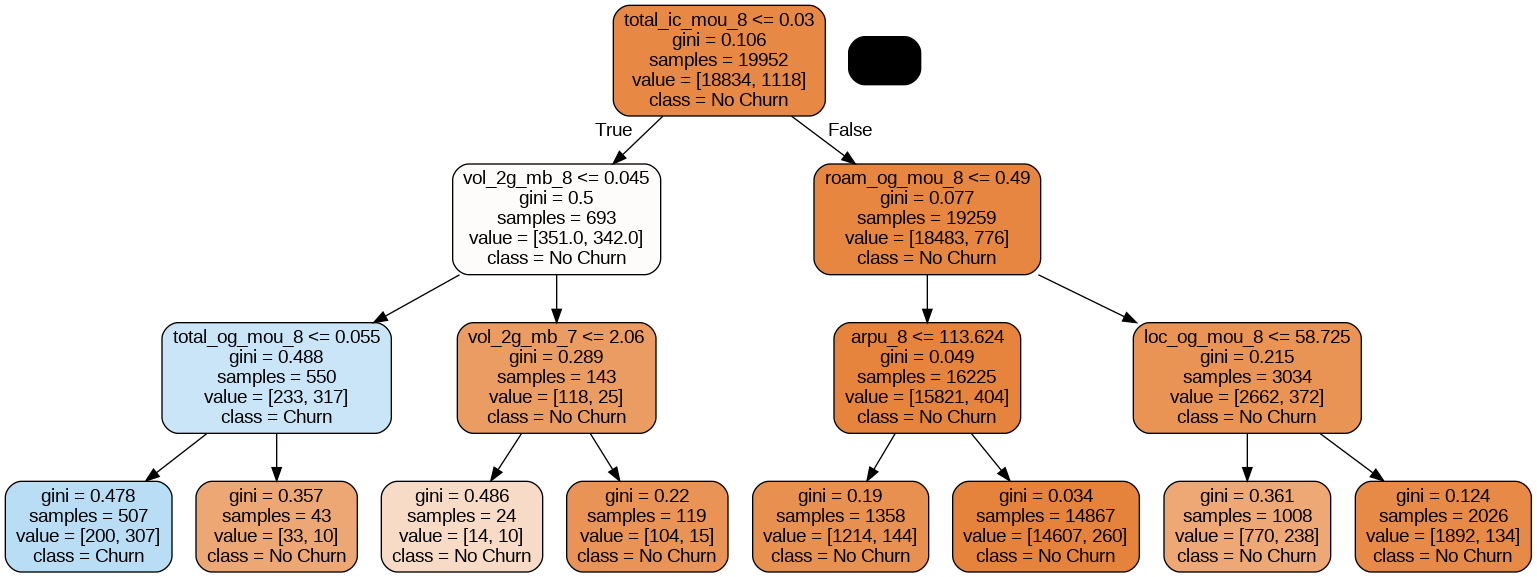

In [190]:
dot_data = StringIO()

export_graphviz(dt_best, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns,
                class_names=['No Churn', "Churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [191]:
# Create a DataFrame to hold feature importances
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": dt_best.feature_importances_
})

# Sort by importance
imp_df = imp_df.sort_values(by="Imp", ascending=False)

# Display the DataFrame
print(imp_df)

                Varname       Imp
80       total_ic_mou_8  0.634625
14        roam_og_mou_8  0.112715
29         loc_og_mou_8  0.089818
104         vol_2g_mb_8  0.084518
2                arpu_8  0.045066
53       total_og_mou_8  0.025467
103         vol_2g_mb_7  0.007791
82         spl_ic_mou_7  0.000000
83         spl_ic_mou_8  0.000000
84         isd_ic_mou_6  0.000000
0                arpu_6  0.000000
85         isd_ic_mou_7  0.000000
81         spl_ic_mou_6  0.000000
87          ic_others_6  0.000000
88          ic_others_7  0.000000
89          ic_others_8  0.000000
90     total_rech_num_6  0.000000
91     total_rech_num_7  0.000000
86         isd_ic_mou_8  0.000000
79       total_ic_mou_7  0.000000
93     total_rech_amt_6  0.000000
78       total_ic_mou_6  0.000000
77         std_ic_mou_8  0.000000
76         std_ic_mou_7  0.000000
75         std_ic_mou_6  0.000000
74     std_ic_t2f_mou_8  0.000000
73     std_ic_t2f_mou_7  0.000000
72     std_ic_t2f_mou_6  0.000000
71     std_ic_

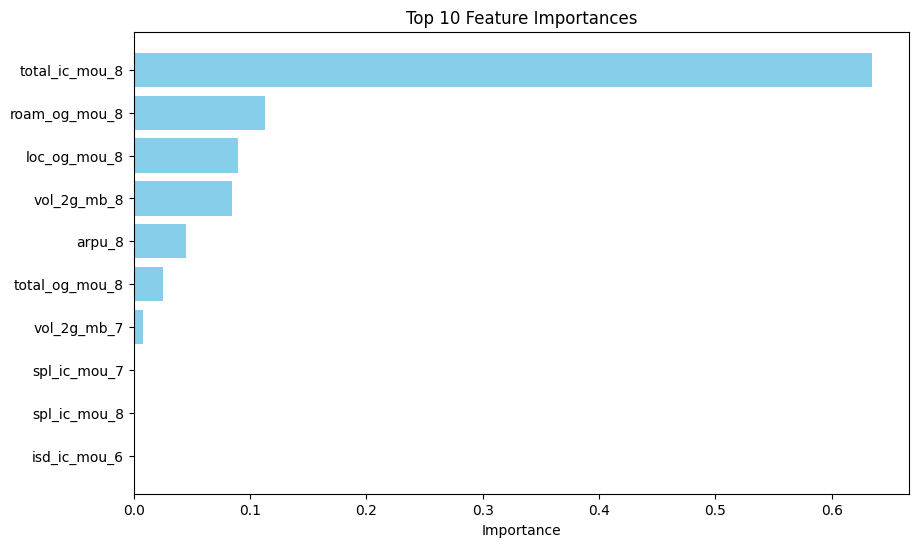

In [192]:
# Plotting the top 10 features
top_n = 10
top_features = imp_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Varname'], top_features['Imp'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [193]:
# Identify and remove features with zero importance
zero_importance_features = imp_df[imp_df['Imp'] == 0]['Varname']
print("Removing features with zero importance:\n", zero_importance_features.tolist())

Removing features with zero importance:
 ['spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'arpu_6', 'isd_ic_mou_7', 'spl_ic_mou_6', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'isd_ic_mou_8', 'total_ic_mou_7', 'total_rech_amt_6', 'total_ic_mou_6', 'std_ic_mou_8', 'std_ic_mou_7', 'std_ic_mou_6', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_7', 'total_rech_num_8', 'max_rech_amt_6', 'total_rech_amt_7', 'sachet_2g_6', 'jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g', 'aon', 'sachet_3g_8', 'sachet_3g_7', 'sachet_3g_6', 'monthly_3g_8', 'monthly_3g_7', 'monthly_3g_6', 'sachet_2g_8', 'sachet_2g_7', 'monthly_2g_8', 'total_rech_amt_8', 'monthly_2g_7', 'monthly_2g_6', 'vol_3g_mb_8', 'vol_3g_mb_7', 'vol_3g_mb_6', 'vol_2g_mb_6', 'last_day_rch_amt_8', 'last_day_rch_amt_7', 'last_day_rch_amt_6', 'max_rech_amt_8', 'max_rech_amt_7', 'loc_ic_mou_8', 'std_ic_t2t_

In [194]:
# Drop the zero importance features from the training and test sets
X_train_reduced = X_train.drop(columns=zero_importance_features)
X_test_reduced = X_test.drop(columns=zero_importance_features)

In [195]:
# Retrain the model on the reduced feature set
from sklearn.ensemble import RandomForestClassifier
rf_reduced = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_reduced.fit(X_train_reduced, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [196]:
# Evaluate the model
y_train_pred_reduced = rf_reduced.predict(X_train_reduced)
y_test_pred_reduced = rf_reduced.predict(X_test_reduced)

In [197]:
print("Confusion Matrix (Train):\n", confusion_matrix(y_train, y_train_pred_reduced))
print("Accuracy (Train):", accuracy_score(y_train, y_train_pred_reduced))


Confusion Matrix (Train):
 [[18825     9]
 [    1  1117]]
Accuracy (Train): 0.9994987971130713


In [198]:
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred_reduced))
print("Accuracy (Test):", accuracy_score(y_test, y_test_pred_reduced))

Confusion Matrix (Test):
 [[8002   72]
 [ 363  115]]
Accuracy (Test): 0.9491347053320861


In [199]:
print("Classification Report (Train):", classification_report(y_train, y_train_pred_reduced))

Classification Report (Train):               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18834
           1       0.99      1.00      1.00      1118

    accuracy                           1.00     19952
   macro avg       1.00      1.00      1.00     19952
weighted avg       1.00      1.00      1.00     19952



In [200]:
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_reduced))

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      8074
           1       0.61      0.24      0.35       478

    accuracy                           0.95      8552
   macro avg       0.79      0.62      0.66      8552
weighted avg       0.94      0.95      0.94      8552



# **Using Random Forest Classifiers**

In [201]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, min_samples_leaf=10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

In [203]:
sample_tree = rf.estimators_[30]

The line sample_tree = rf.estimators_[30] selects the 30th decision tree from the random forest.

The export_graphviz function is then called on sample_tree, allowing you to visualize that specific decision tree.

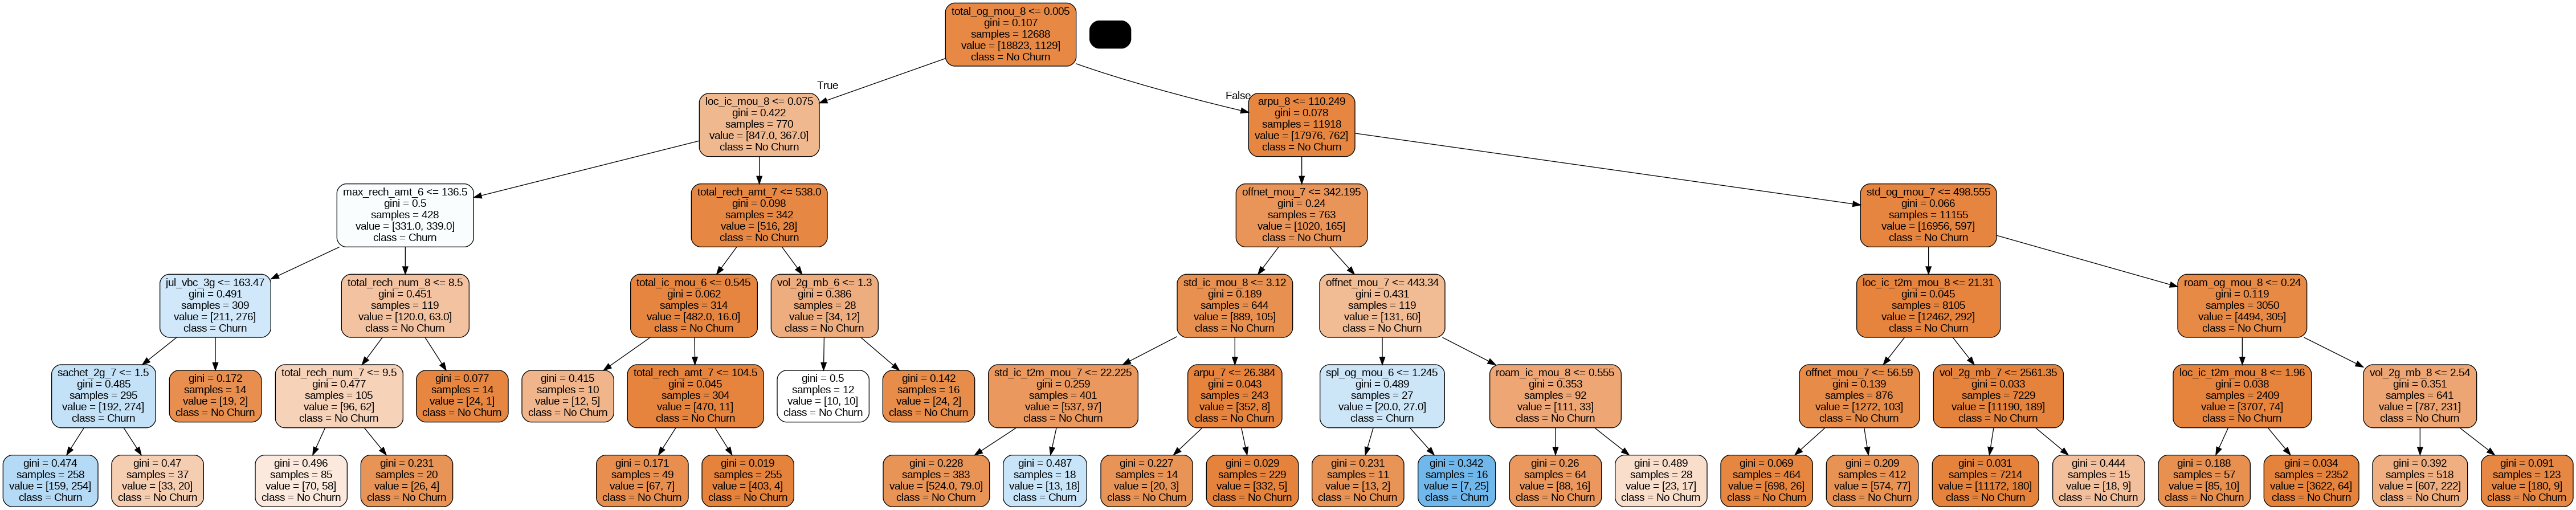

In [204]:
# To visualize a specific decision tree from the random forest.
dot_data = StringIO()
export_graphviz(sample_tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns,
                class_names=['No Churn', "Churn"])

# Create the graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [205]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [206]:
print(confusion_matrix(y_train, rf.predict(X_train)))

[[18720   114]
 [  859   259]]


In [207]:
print(confusion_matrix(y_test, rf.predict(X_test)))

[[8024   50]
 [ 361  117]]


In [208]:
print(classification_report(y_train, rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18834
           1       0.69      0.23      0.35      1118

    accuracy                           0.95     19952
   macro avg       0.83      0.61      0.66     19952
weighted avg       0.94      0.95      0.94     19952



In [209]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8074
           1       0.70      0.24      0.36       478

    accuracy                           0.95      8552
   macro avg       0.83      0.62      0.67      8552
weighted avg       0.94      0.95      0.94      8552



In [210]:
print("Accuracy Score of Train data:",accuracy_score(y_train, rf.predict(X_train)))

Accuracy Score of Train data: 0.9512329591018445


In [211]:
print("Accuracy Score of Test data:",accuracy_score(y_test, rf.predict(X_test)))

Accuracy Score of Test data: 0.9519410664172123


# **Ensembling**

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [213]:
# Initialize models
m1 = LogisticRegression()
m2 = KNeighborsClassifier(5)
m3 = DecisionTreeClassifier(random_state=42, max_depth=4)

In [214]:
# Fit models
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [215]:
# Make predictions
y_train_pred_m1 = m1.predict(X_train)
y_train_pred_m2 = m2.predict(X_train)
y_train_pred_m3 = m3.predict(X_train)

In [216]:
# Use majority voting for training predictions
y_train_pred = np.round((y_train_pred_m1 + y_train_pred_m2 + y_train_pred_m3) / 3).astype(int)

In [217]:
# Make predictions for test set
y_test_pred_m1 = m1.predict(X_test)
y_test_pred_m2 = m2.predict(X_test)
y_test_pred_m3 = m3.predict(X_test)

In [218]:
# Use majority voting for test predictions
y_test_pred = np.round((y_test_pred_m1 + y_test_pred_m2 + y_test_pred_m3) / 3).astype(int)

In [219]:
# Print confusion matrix
print("Confusion Matrix of Train data:\n", confusion_matrix(y_train, y_train_pred))
print('-'*50)
print("Confusion Matrix of Test data:\n", confusion_matrix(y_test, y_test_pred))

Confusion Matrix of Train data:
 [[18763    71]
 [  945   173]]
--------------------------------------------------
Confusion Matrix of Test data:
 [[8036   38]
 [ 418   60]]


In [220]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18834
           1       0.71      0.15      0.25      1118

    accuracy                           0.95     19952
   macro avg       0.83      0.58      0.61     19952
weighted avg       0.94      0.95      0.93     19952



In [221]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8074
           1       0.61      0.13      0.21       478

    accuracy                           0.95      8552
   macro avg       0.78      0.56      0.59      8552
weighted avg       0.93      0.95      0.93      8552



In [222]:
print("Accuracy Score of Train data:",accuracy_score(y_train, y_train_pred))

Accuracy Score of Train data: 0.9490777866880513


In [223]:
print("Accuracy Score of Test data:",accuracy_score(y_test, y_test_pred))

Accuracy Score of Test data: 0.9466791393826005


`Top 10 feature variables for business which will be very helpful in business making decision and give additional benefits/discount to customers who are likely to churn`

- total_ic_mou_8 (Total incoming minutes of usage for 8th month)
- roam_og_mou_8 (Roaming outgoing minutes of usage for 8th month)
- loc_og_mou_8 (local outgoing minutes of usage for 8th month)
- vol_2g_mb_8 (Mobile 2g internet usage volume (in MB) for 8th month)
- arpu_8 (average revenue per user for 8th month)
- vol_2g_mb_7 (Mobile 2g internet usage volume (in MB) for 7th month)
- spl_ic_mou_7 (special incoming minutes of usage for 7th month)
- spl_ic_mou_8	( special incoming minutes of usage for 8th month)
- isd_ic_mou_6 ( ISD incoming minutes of usage for 6th month)


` From the final logistic regression using 20 feature variables we got:`
- Recall Score= 71%
- Accuracy = 86%
- ROC AUC= 86%
- Specificity= 87%

### Both logistic regression and the random forest classifier yield almost similar predictor variables for identifying customers at risk of churning.  The telecom company should utilize the Top 10 parameters got through GridSearchCV to implement promotional offers targeted at these at-risk customers. We have applied all our models specifically to high-value customers, enabling business stakeholders to focus on the most significant predictor variables. Although we used various models and feature selection techniques, the resulting predictor variables are similar, with minor differences in their ranking. Therefore, we recommend that the telecom company prioritize these key feature variables, as they are strong indicators for effectively managing customer churn.

# **Thank you !!!**